# 1. Traitement des données

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base RSVERO

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print("Colonnes de la base RSVERO")
print(columns)

Colonnes e la base RSVERO
['Type', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
print("colonnes de Ademe:", data2.columns)

colonnes de Ademe: Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')


In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels              N  
count  39755.000000   39755.000000      39755.000000   39755.000000  
mean     112.186234     154.727231         74.127828     902.736184  
std       40.680494      29.675542          3.714219    2211.477666  
min       44.000000      31.824490         56.000000      21.000000  
25%       88.000000     142.388981         72.000000      67.000000  
50%      110.000000     155.821720         74.000000     192.000000  
75%      120.000000     168.940433         76.000000     692.000000  
max      478.000000     405.892593         96.000000  117339.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

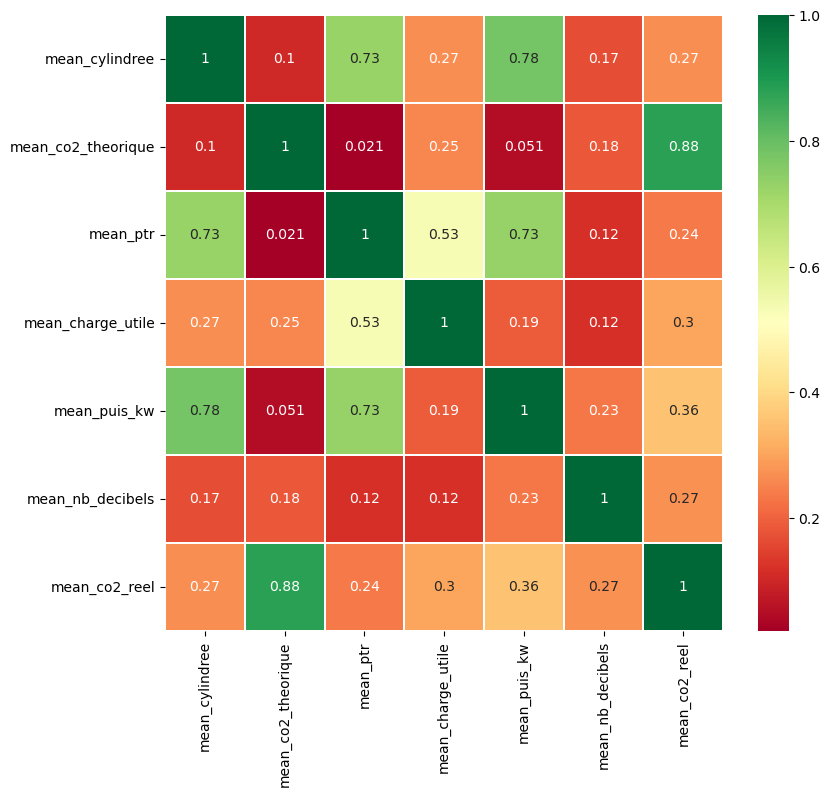

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

# 2. Estimation des émissions de CO2 par Machine Learning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# A. Régression linéaire

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.279
R2_score = 0.901


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.25
R2_score_model = 0.908


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.20472867e+00  2.49586223e+01  1.39213415e+00  1.13476404e+00
  1.02838668e+01  3.30581021e-01  4.76450931e-04  2.94835728e+00
 -1.70674378e+00  4.11615181e-01 -4.18012608e-01 -1.57728272e-01
 -1.79077604e+00 -1.83742975e-01  7.15290610e-01 -7.44273636e-01
  2.65876781e-01 -1.31647939e-01 -2.97729775e-01  4.07948295e-01
 -6.08567955e-01  1.86878742e-01 -2.37196725e-01  9.36647105e-01
  1.70530732e-01  7.62495821e-02  3.90871932e-02 -3.83795305e-01]
Le coefficient à l'origine est 154.3082052830484


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

27566    178.932000
9005     127.017805
6909     127.427411
930      170.290305
30432    234.805556
Name: mean_co2_reel, dtype: float64
[172.82812767 117.38942302 116.32128807 164.07597322 231.4097615 ]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 28.93
R2_score_th = 0.1


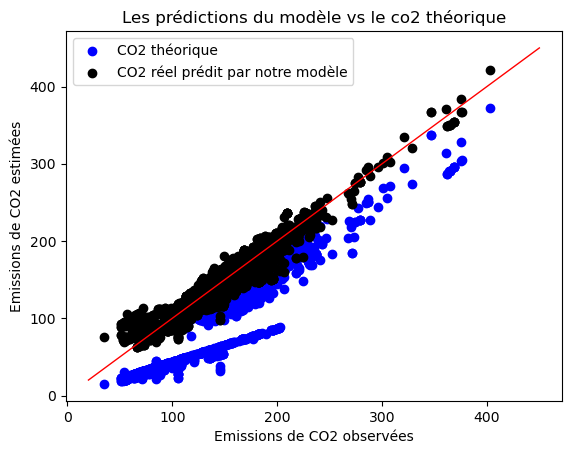

In [ ]:
plt.scatter(y_test, dataOG, color='blue', label = 'CO2 théorique')
plt.scatter(y_test, test_predictions, color='black', label='CO2 réel prédit par notre modèle')
plt.title("Les prédictions du modèle de régression linéaire vs le co2 théorique")
plt.xlabel("Emissions de CO2 observées")
plt.ylabel("Emissions de CO2 estimées")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.legend()
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree         -1.204729
mean_co2_theorique     24.958622
mean_ptr                1.392134
mean_charge_utile       1.134764
mean_puis_kw           10.283867
mean_nb_decibels        0.330581
N                       0.000476
ES                      2.948357
GO                     -1.706744
FE                      0.411615
EE                     -0.418013
EH                     -0.157728
GH                     -1.790776
GN                     -0.183743
GL                      0.715291
EG                     -0.744274
FH                      0.265877
EN                     -0.131648
BERLINE                -0.297730
TS TERRAINS/CHEMINS     0.407948
BREAK                  -0.608568
MINIBUS                 0.186879
MONOSPACE COMPACT      -0.237197
COMBISPACE              0.936647
COUPE                   0.170531
MONOSPACE               0.076250
MINISPACE               0.039087
CABRIOLET              -0.383795
dtype: float64


## B. Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_cylindree         -0.042848
mean_co2_theorique     24.744910
mean_ptr                0.725703
mean_charge_utile       1.354130
mean_puis_kw            9.529319
mean_nb_decibels        0.256252
N                       0.000435
ES                      3.476877
GO                     -1.214472
FE                      0.290415
GH                     -1.273766
GN                     -0.020057
GL                      0.665177
EG                     -0.458226
FH                      0.211811
TS TERRAINS/CHEMINS     0.697134
BREAK                  -0.347881
MINIBUS                 0.004566
COMBISPACE              0.796919
COUPE                   0.015199
CABRIOLET              -0.111195
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS',
       'BREAK', 'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPA

21

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.284
R2_score_model = 0.907


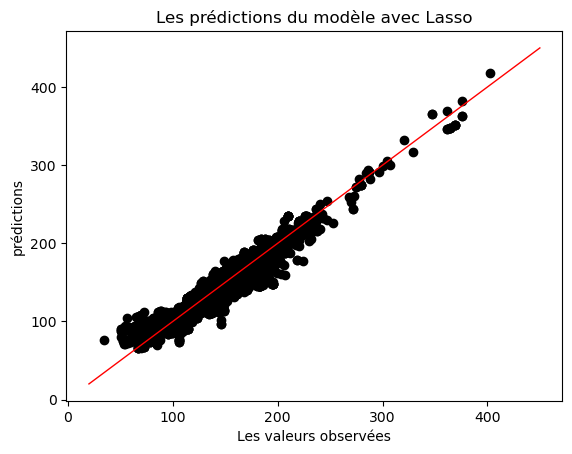

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

## C. KNN

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
14603          1499.0          130.418919    3145.0         555.000000   
40831          1968.0          154.363636    4140.0         596.000000   
30123          1498.0          147.883739    3370.0         591.000000   
5109            999.0          114.365120    2503.0         513.000000   
26805          1199.0          135.001387    2940.0         519.985437   
...               ...                 ...       ...                ...   
11334          1950.0          167.070539    5100.0         740.000000   
2512           1499.0          105.068966    2275.0         585.000000   
5174           1968.0          150.061584    3900.0         755.000000   
5407           1998.0          145.824635    3265.0         574.000000   
19404          1498.0          122.480392    3200.0         569.000000   

       mean_puis_kw  mean_nb_decibels     N  ES  GO  FE  ...  BERLINE  \
14603         100.0          75.00000    74   1   0   0  ...        1   
40831         110.0          77.00000   517   0   1   0  ...        0   
30123         110.0          80.00000  2589   1   0   0  ...        0   
5109           74.0          73.00000  3125   1   0   0  ...        1   
26805          96.0          76.00000  1442   1   0   0  ...        0   
...             ...               ...   ...  ..  ..  ..  ...      ...   
11334         143.0          76.00000   241   0   1   0  ...        0   
2512           75.0          74.00000  1566   0   1   0  ...        1   
5174           85.0          79.00000   341   0   1   0  ...        0   
5407          132.0          74.80167   479   0   0   0  ...        0   
19404          96.0          78.00000   102   1   0   0  ...        1   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
14603                    0      0        0                  0           0   
40831                    1      0        0                  0           0   
30123                    1      0        0                  0           0   
5109                     0      0        0                  0           0   
26805                    1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
11334                    1      0        0                  0           0   
2512                     0      0        0                  0           0   
5174                     0      0        0                  1           0   
5407                     1      0        0                  0           0   
19404                    0      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
14603      0          0          0          0  
40831      0          0          0          0  
30123      0          0          0          0  
5109       0          0          0          0  
26805      0          0          0          0  
...      ...        ...        ...        ...  
11334      0          0          0          0  
2512       0          0          0          0  
5174       0          0          0          0  
5407       0          0          0          0  
19404      0          0          0          0  

[31804 rows x 28 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 5.65
R2_score_model = 0.965


In [1]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle KNN vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

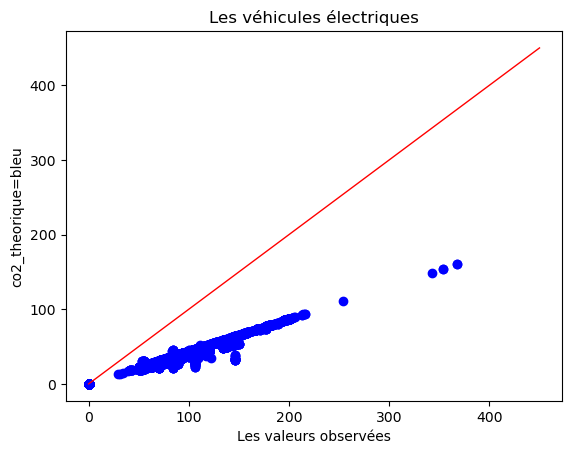

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

# 3.SELECTION DU MODELE
## Validation croisée

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-86.27911882979427

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.2280697006643

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-91.44779869887326

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### A. CHOIX DU PARAMETRE POUR LASSO

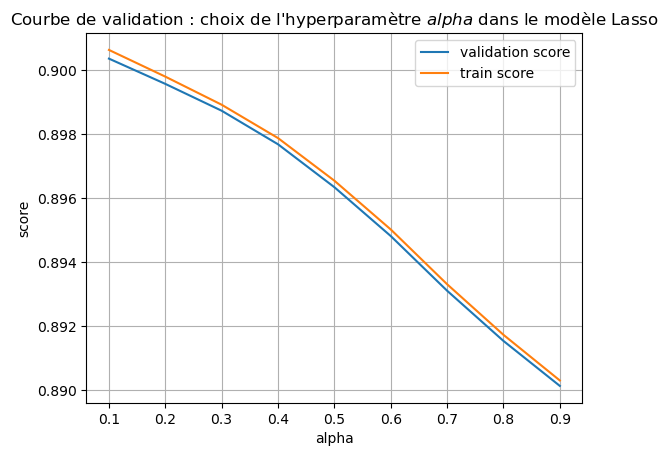

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation score')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('alpha')
plt.title('Courbe de validation : choix de l\'hyperparamètre $\t{alpha}$ dans le modèle Lasso')
plt.grid()
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9003533169927239
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.612095
mean_co2_theorique     24.977455
mean_ptr                1.028400
mean_charge_utile       1.246645
mean_puis_kw            9.862987
mean_nb_decibels        0.286573
N                       0.000457
ES                      3.333997
GO                     -1.323758
FE                      0.365775
GH                     -1.449686
GN                     -0.099120
GL                      0.754522
EG                     -0.581055
FH                      0.252985
EN                     -0.048709
TS TERRAINS/CHEMINS     0.697397
BREAK                  -0.381756
MINIBUS                 0.117264
MONOSPACE COMPACT      -0.046311
COMBISPACE              0.906369
COUPE                   0.126836
MONOSPACE               0.008508
CABRIOLET              -0.226072
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH'

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


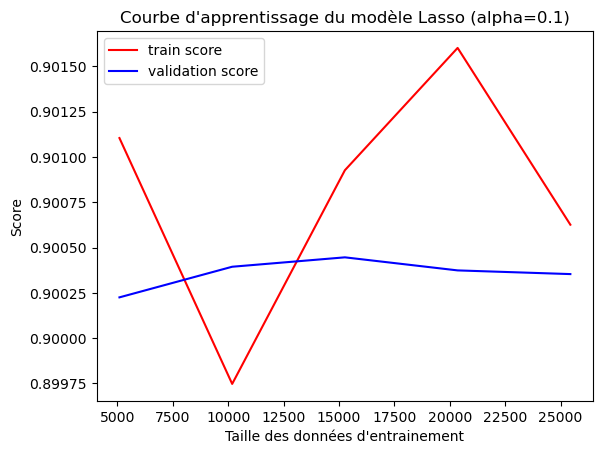

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du modèle Lasso (alpha=0.1)')
plt.legend()

## B. choix du parametre pour KNeighbors et courbe de validation pour KNeighbors

## validation curve

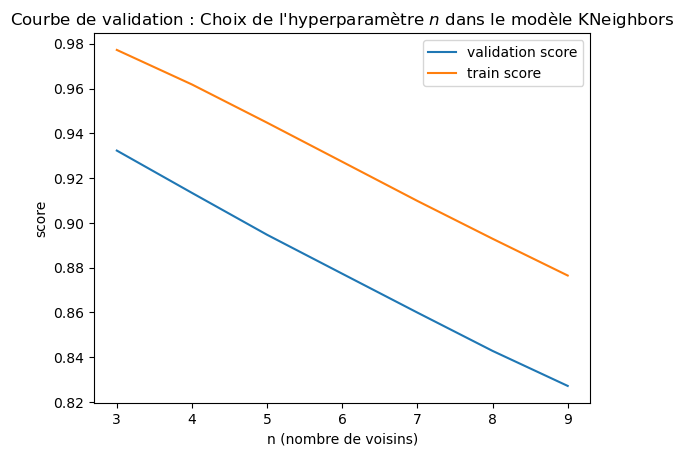

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation score')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('n (nombre de voisins)')
plt.title('Courbe de validation : Choix de l\'hyperparamètre $\t n$ dans le modèle KNeighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.86037971 0.85699044 0.85699044 0.85699044 0.85699044]
 [0.92429272 0.92706257 0.92759356 0.92759356 0.92759356]
 [0.95457997 0.95689504 0.95396898 0.95294864 0.95294864]
 [0.9680447  0.96908012 0.96822308 0.96709508 0.96836349]
 [0.97691937 0.97835411 0.97744336 0.97627903 0.97722974]]
[[0.654713   0.64426468 0.65013769 0.63515611 0.63353993]
 [0.79168495 0.80857926 0.80300246 0.79327236 0.78180878]
 [0.87336193 0.87681221 0.87730763 0.86568522 0.85928914]
 [0.90706058 0.91139858 0.91616786 0.89897444 0.89294444]
 [0.92506173 0.93393259 0.93670103 0.93736545 0.92833253]]


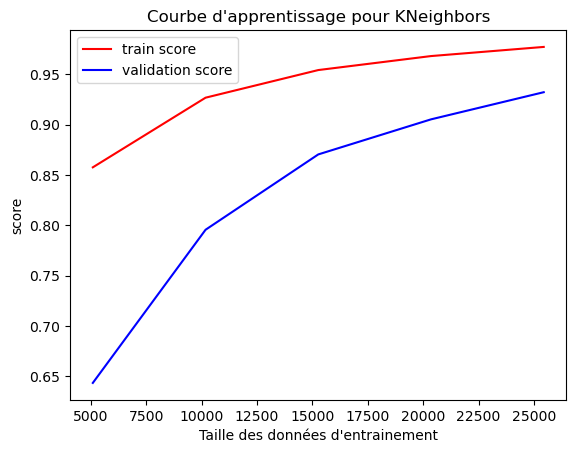

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(n_neighbors=3), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour KNeighbors')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


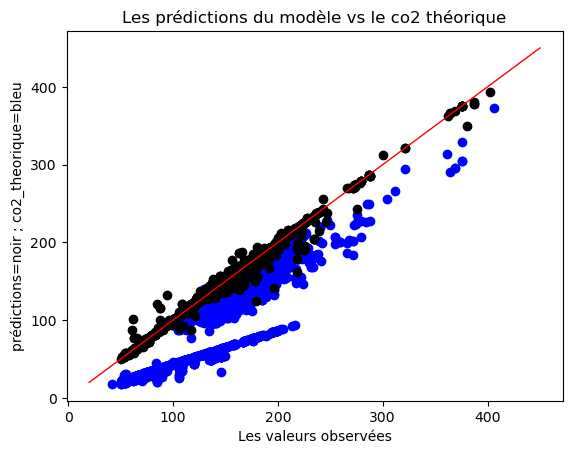

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

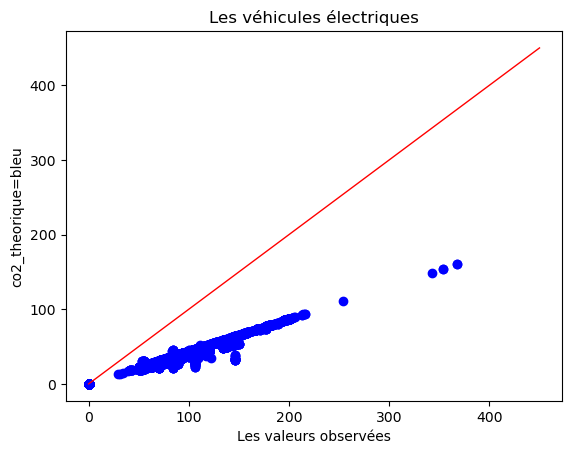

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

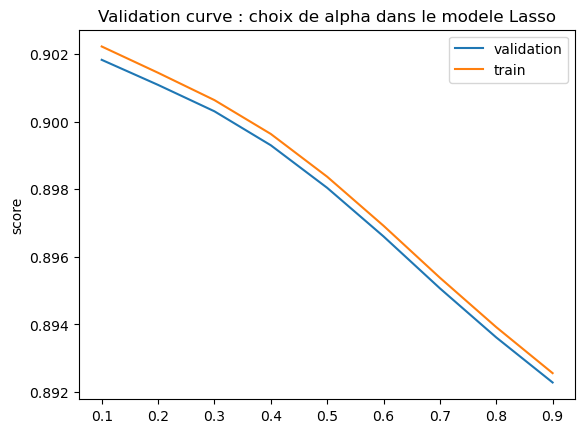

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


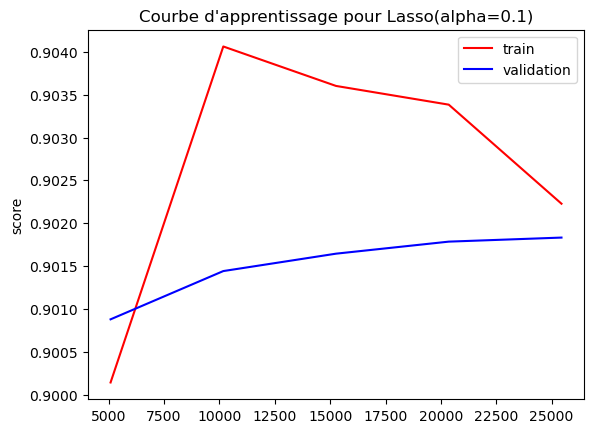

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

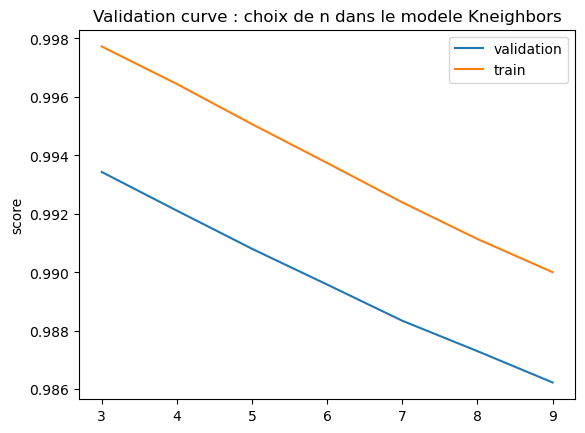

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


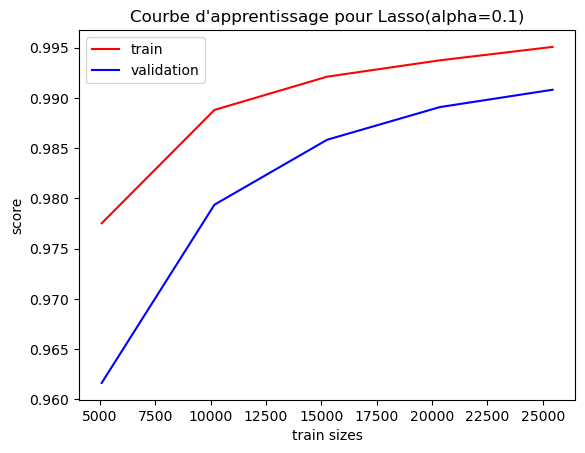

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels              N  
count  39755.000000   39755.000000      39755.000000   39755.000000  
mean     112.186234     154.727231         74.127828     902.736184  
std       40.680494      29.675542          3.714219    2211.477666  
min       44.000000      31.824490         56.000000      21.000000  
25%       88.000000     142.388981         72.000000      67.000000  
50%      110.000000     155.821720         74.000000     192.000000  
75%      120.000000     168.940433         76.000000     692.000000  
max      478.000000     405.892593         96.000000  117339.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

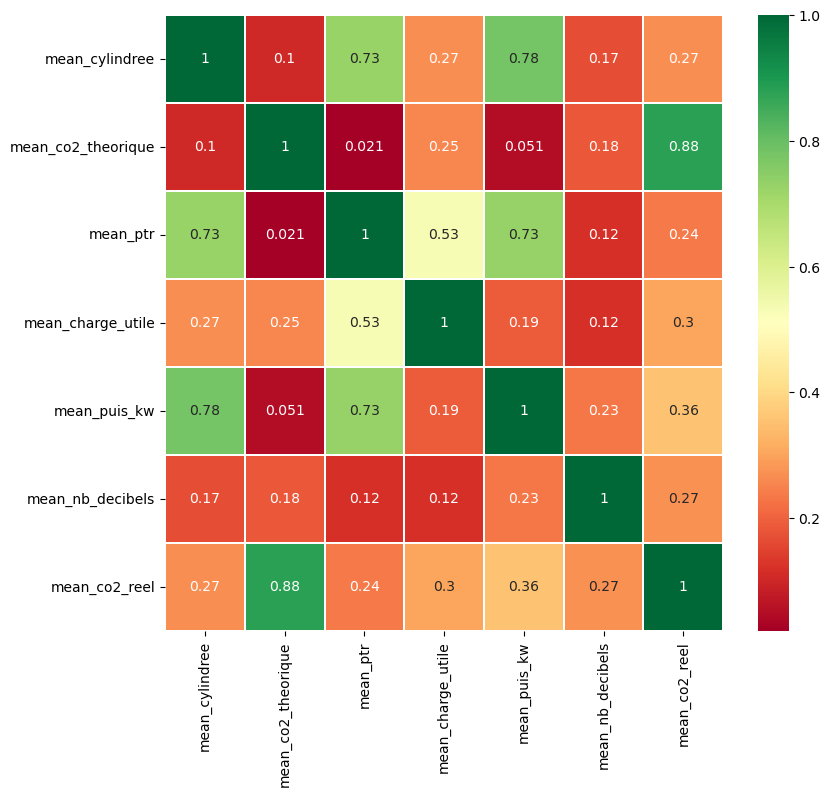

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.279
R2_score = 0.901


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.25
R2_score_model = 0.908


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.20472867e+00  2.49586223e+01  1.39213415e+00  1.13476404e+00
  1.02838668e+01  3.30581021e-01  4.76450931e-04  2.94835728e+00
 -1.70674378e+00  4.11615181e-01 -4.18012608e-01 -1.57728272e-01
 -1.79077604e+00 -1.83742975e-01  7.15290610e-01 -7.44273636e-01
  2.65876781e-01 -1.31647939e-01 -2.97729775e-01  4.07948295e-01
 -6.08567955e-01  1.86878742e-01 -2.37196725e-01  9.36647105e-01
  1.70530732e-01  7.62495821e-02  3.90871932e-02 -3.83795305e-01]
Le coefficient à l'origine est 154.3082052830484


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

27566    178.932000
9005     127.017805
6909     127.427411
930      170.290305
30432    234.805556
Name: mean_co2_reel, dtype: float64
[172.82812767 117.38942302 116.32128807 164.07597322 231.4097615 ]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 28.93
R2_score_th = 0.1


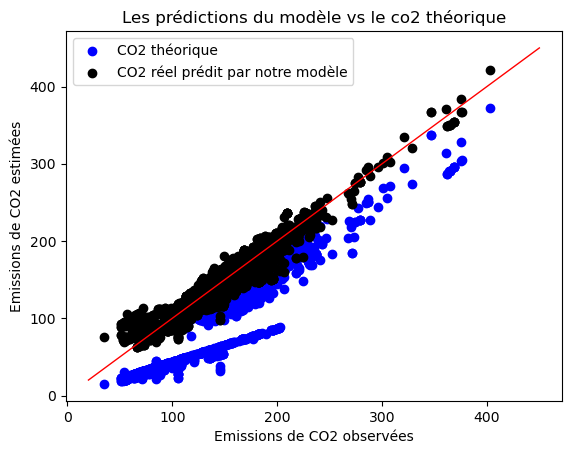

In [ ]:
plt.scatter(y_test, dataOG, color='blue', label = 'CO2 théorique')
plt.scatter(y_test, test_predictions, color='black', label='CO2 réel prédit par notre modèle')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Emissions de CO2 observées")
plt.ylabel("Emissions de CO2 estimées")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.legend()
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree         -1.204729
mean_co2_theorique     24.958622
mean_ptr                1.392134
mean_charge_utile       1.134764
mean_puis_kw           10.283867
mean_nb_decibels        0.330581
N                       0.000476
ES                      2.948357
GO                     -1.706744
FE                      0.411615
EE                     -0.418013
EH                     -0.157728
GH                     -1.790776
GN                     -0.183743
GL                      0.715291
EG                     -0.744274
FH                      0.265877
EN                     -0.131648
BERLINE                -0.297730
TS TERRAINS/CHEMINS     0.407948
BREAK                  -0.608568
MINIBUS                 0.186879
MONOSPACE COMPACT      -0.237197
COMBISPACE              0.936647
COUPE                   0.170531
MONOSPACE               0.076250
MINISPACE               0.039087
CABRIOLET              -0.383795
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_cylindree         -0.042848
mean_co2_theorique     24.744910
mean_ptr                0.725703
mean_charge_utile       1.354130
mean_puis_kw            9.529319
mean_nb_decibels        0.256252
N                       0.000435
ES                      3.476877
GO                     -1.214472
FE                      0.290415
GH                     -1.273766
GN                     -0.020057
GL                      0.665177
EG                     -0.458226
FH                      0.211811
TS TERRAINS/CHEMINS     0.697134
BREAK                  -0.347881
MINIBUS                 0.004566
COMBISPACE              0.796919
COUPE                   0.015199
CABRIOLET              -0.111195
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS',
       'BREAK', 'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPA

21

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.284
R2_score_model = 0.907


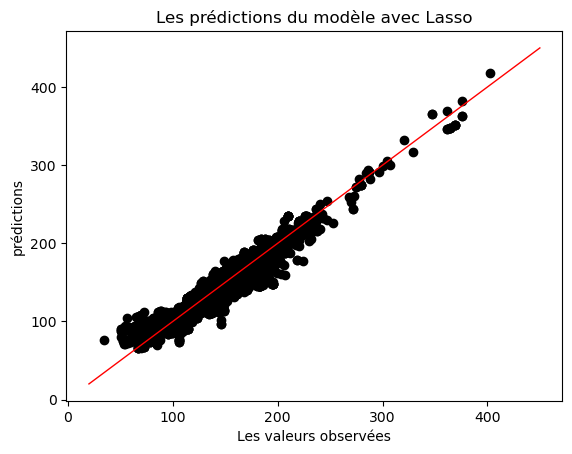

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
14603          1499.0          130.418919    3145.0         555.000000   
40831          1968.0          154.363636    4140.0         596.000000   
30123          1498.0          147.883739    3370.0         591.000000   
5109            999.0          114.365120    2503.0         513.000000   
26805          1199.0          135.001387    2940.0         519.985437   
...               ...                 ...       ...                ...   
11334          1950.0          167.070539    5100.0         740.000000   
2512           1499.0          105.068966    2275.0         585.000000   
5174           1968.0          150.061584    3900.0         755.000000   
5407           1998.0          145.824635    3265.0         574.000000   
19404          1498.0          122.480392    3200.0         569.000000   

       mean_puis_kw  mean_nb_decibels     N  ES  GO  FE  ...  BERLINE  \
14603         100.0          75.00000    74   1   0   0  ...        1   
40831         110.0          77.00000   517   0   1   0  ...        0   
30123         110.0          80.00000  2589   1   0   0  ...        0   
5109           74.0          73.00000  3125   1   0   0  ...        1   
26805          96.0          76.00000  1442   1   0   0  ...        0   
...             ...               ...   ...  ..  ..  ..  ...      ...   
11334         143.0          76.00000   241   0   1   0  ...        0   
2512           75.0          74.00000  1566   0   1   0  ...        1   
5174           85.0          79.00000   341   0   1   0  ...        0   
5407          132.0          74.80167   479   0   0   0  ...        0   
19404          96.0          78.00000   102   1   0   0  ...        1   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
14603                    0      0        0                  0           0   
40831                    1      0        0                  0           0   
30123                    1      0        0                  0           0   
5109                     0      0        0                  0           0   
26805                    1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
11334                    1      0        0                  0           0   
2512                     0      0        0                  0           0   
5174                     0      0        0                  1           0   
5407                     1      0        0                  0           0   
19404                    0      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
14603      0          0          0          0  
40831      0          0          0          0  
30123      0          0          0          0  
5109       0          0          0          0  
26805      0          0          0          0  
...      ...        ...        ...        ...  
11334      0          0          0          0  
2512       0          0          0          0  
5174       0          0          0          0  
5407       0          0          0          0  
19404      0          0          0          0  

[31804 rows x 28 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 5.65
R2_score_model = 0.965


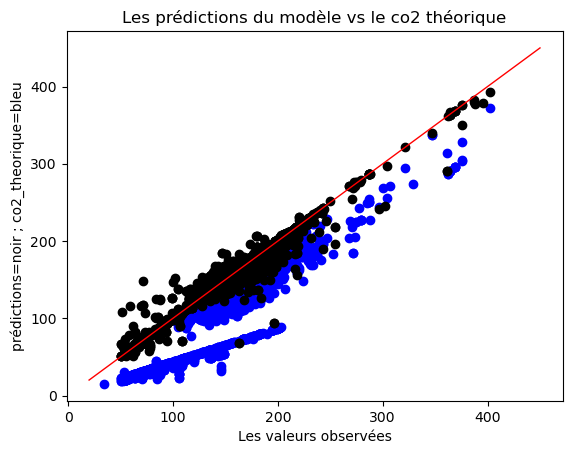

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

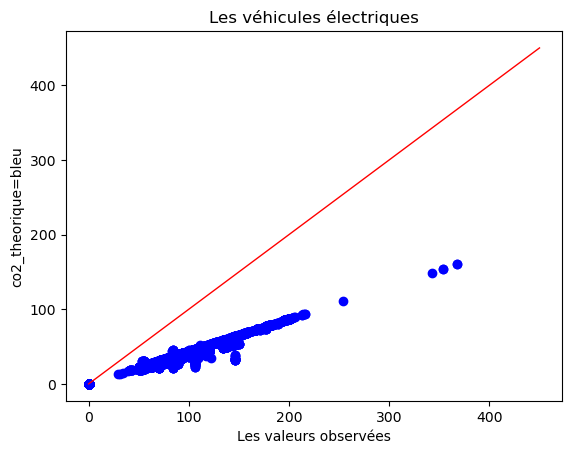

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51260200 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-86.27911882979427

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.2280697006643

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-91.44779869887326

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

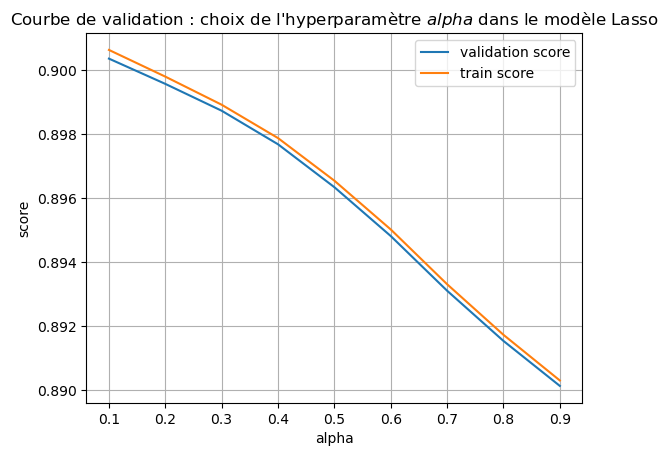

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation score')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('alpha')
plt.title('Courbe de validation : choix de l\'hyperparamètre $\t{alpha}$ dans le modèle Lasso')
plt.grid()
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9003533169927239
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.612095
mean_co2_theorique     24.977455
mean_ptr                1.028400
mean_charge_utile       1.246645
mean_puis_kw            9.862987
mean_nb_decibels        0.286573
N                       0.000457
ES                      3.333997
GO                     -1.323758
FE                      0.365775
GH                     -1.449686
GN                     -0.099120
GL                      0.754522
EG                     -0.581055
FH                      0.252985
EN                     -0.048709
TS TERRAINS/CHEMINS     0.697397
BREAK                  -0.381756
MINIBUS                 0.117264
MONOSPACE COMPACT      -0.046311
COMBISPACE              0.906369
COUPE                   0.126836
MONOSPACE               0.008508
CABRIOLET              -0.226072
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH'

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


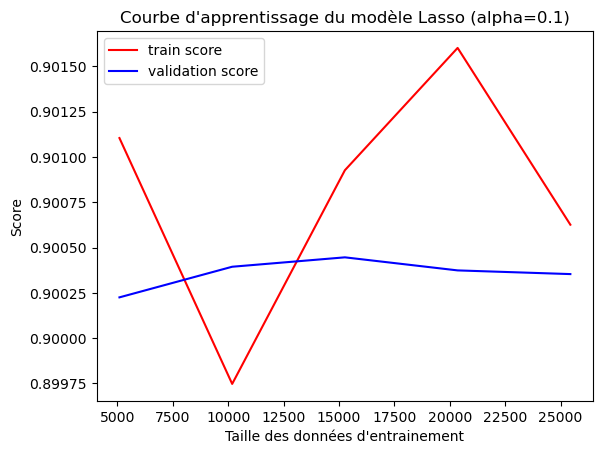

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du modèle Lasso (alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

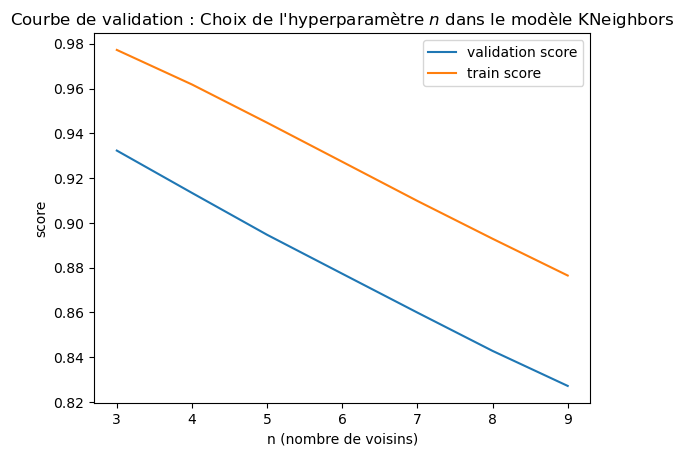

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation score')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('n (nombre de voisins)')
plt.title('Courbe de validation : Choix de l\'hyperparamètre $\t n$ dans le modèle KNeighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.86037971 0.85699044 0.85699044 0.85699044 0.85699044]
 [0.92429272 0.92706257 0.92759356 0.92759356 0.92759356]
 [0.95457997 0.95689504 0.95396898 0.95294864 0.95294864]
 [0.9680447  0.96908012 0.96822308 0.96709508 0.96836349]
 [0.97691937 0.97835411 0.97744336 0.97627903 0.97722974]]
[[0.654713   0.64426468 0.65013769 0.63515611 0.63353993]
 [0.79168495 0.80857926 0.80300246 0.79327236 0.78180878]
 [0.87336193 0.87681221 0.87730763 0.86568522 0.85928914]
 [0.90706058 0.91139858 0.91616786 0.89897444 0.89294444]
 [0.92506173 0.93393259 0.93670103 0.93736545 0.92833253]]


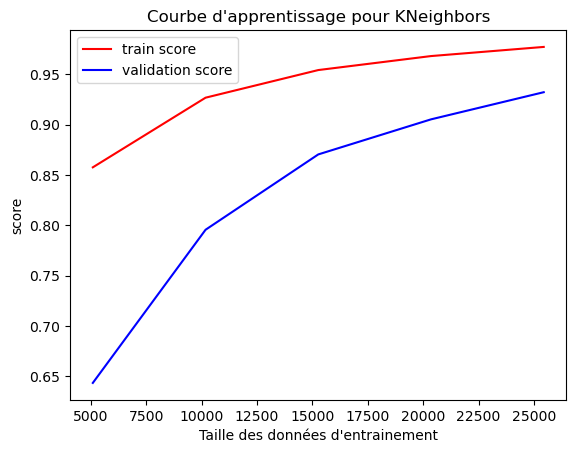

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(n_neighbors=3), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour KNeighbors')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

NameError: name 'data2' is not defined

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

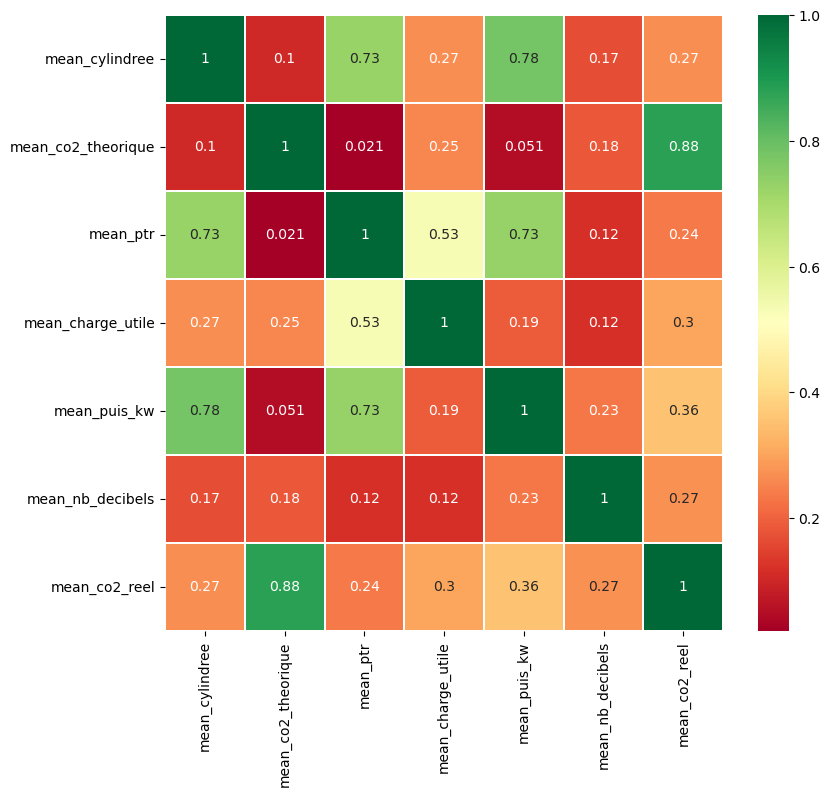

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


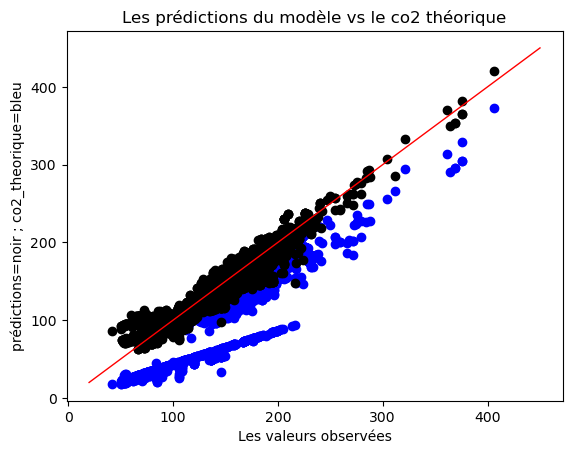

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


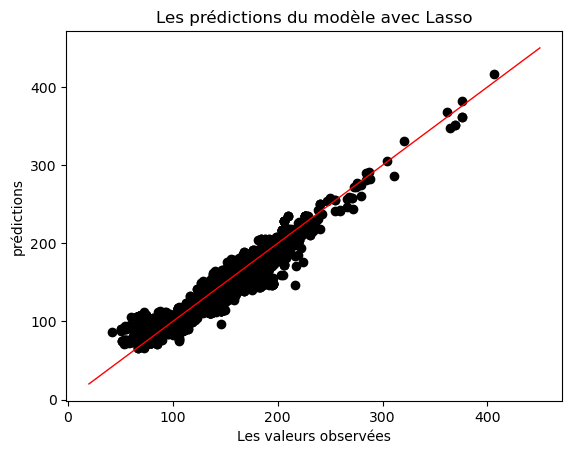

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


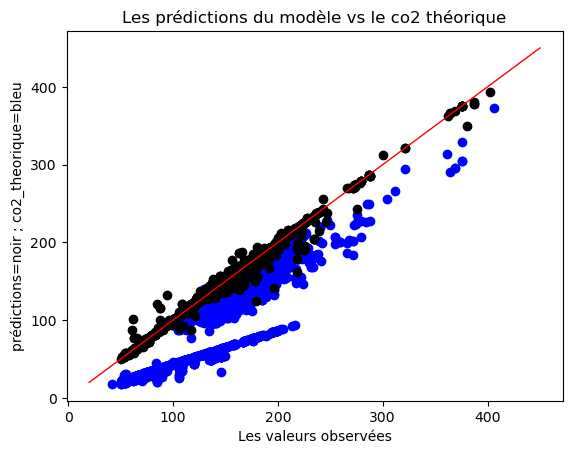

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

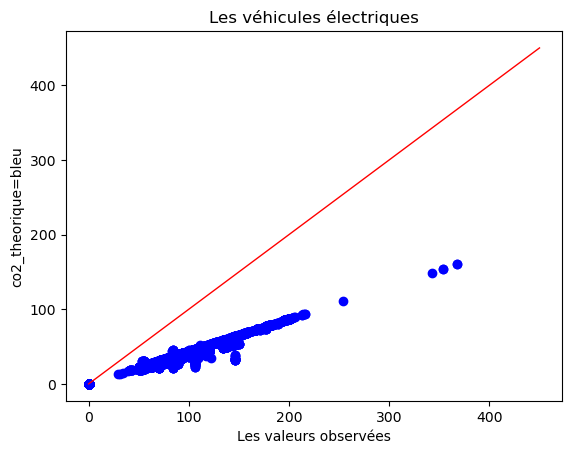

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

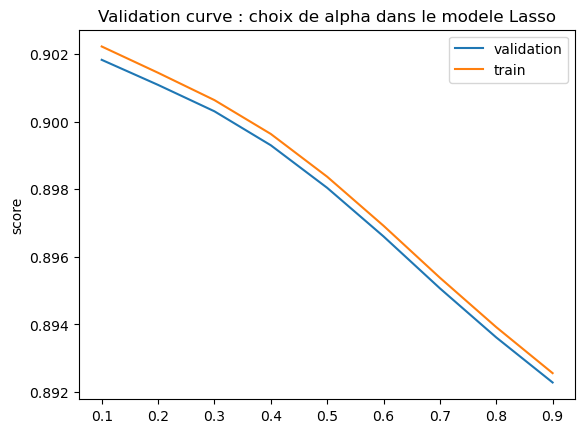

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


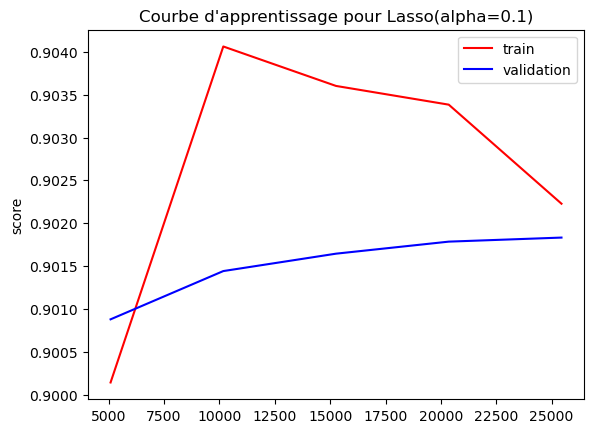

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

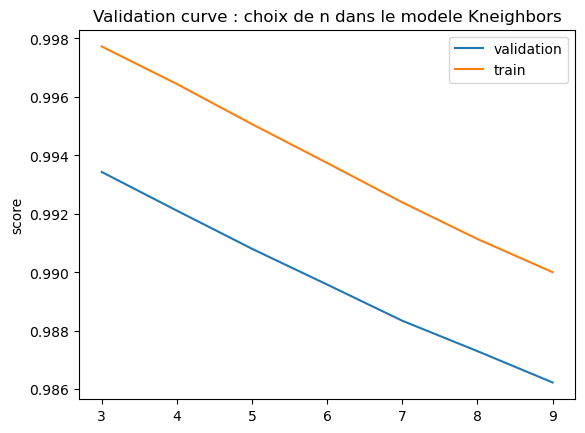

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


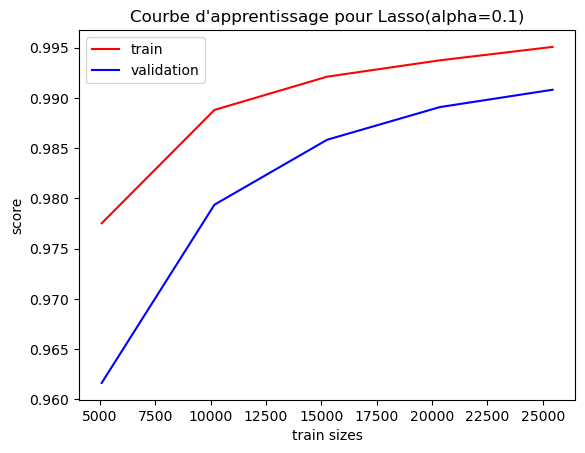

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

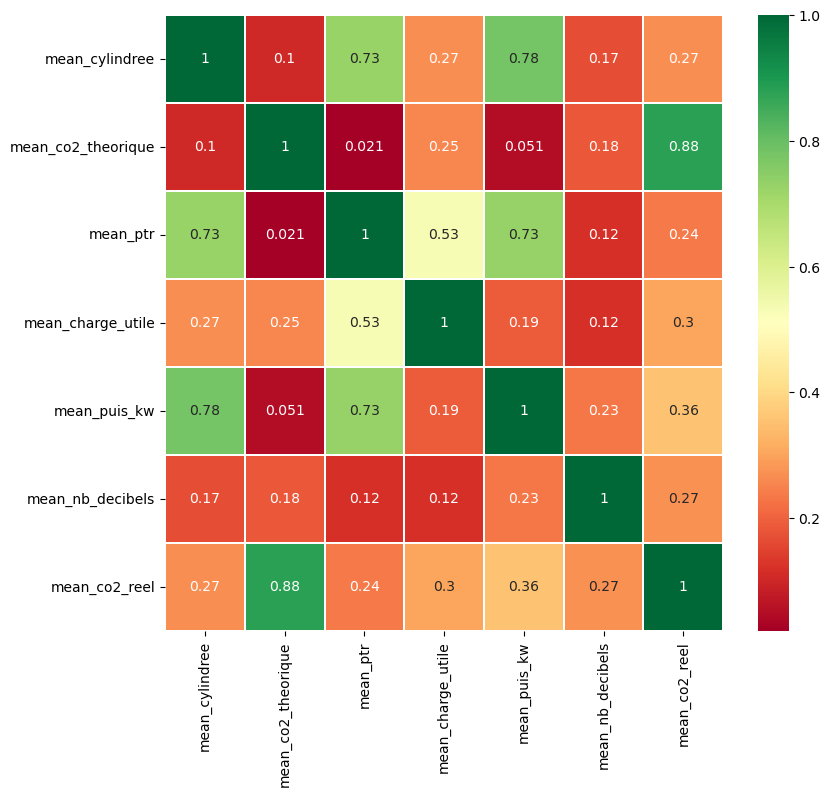

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


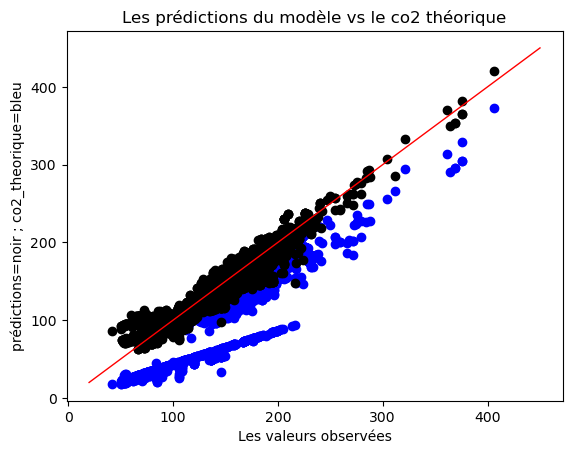

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


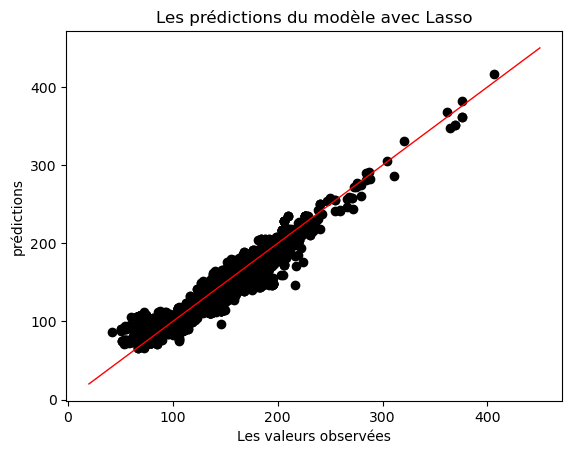

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


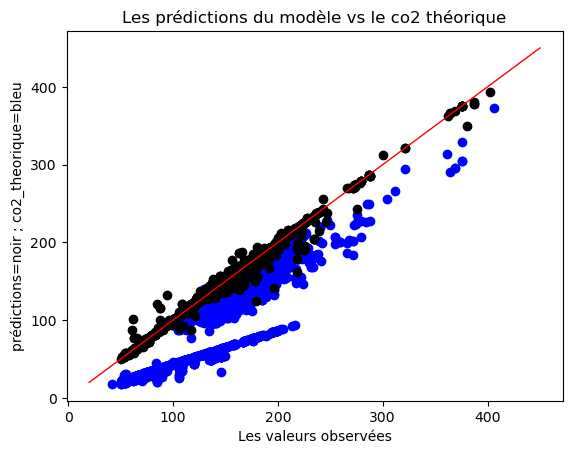

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

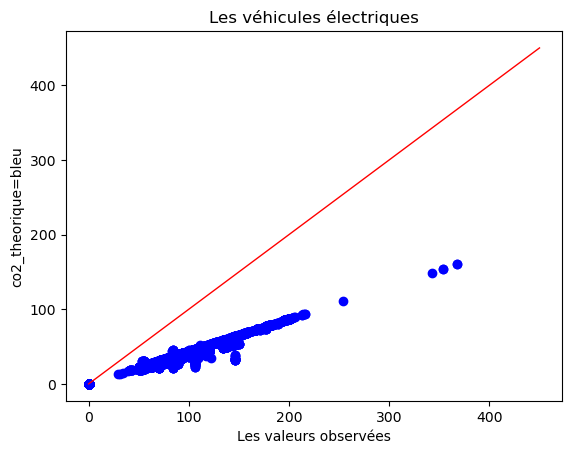

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

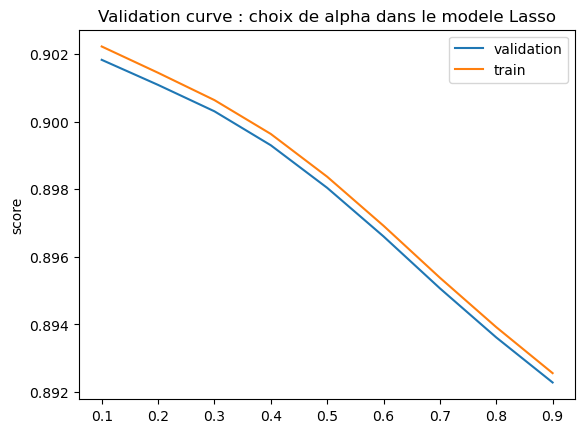

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


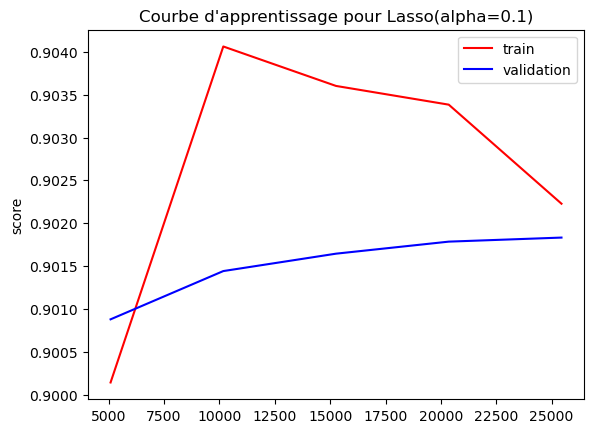

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

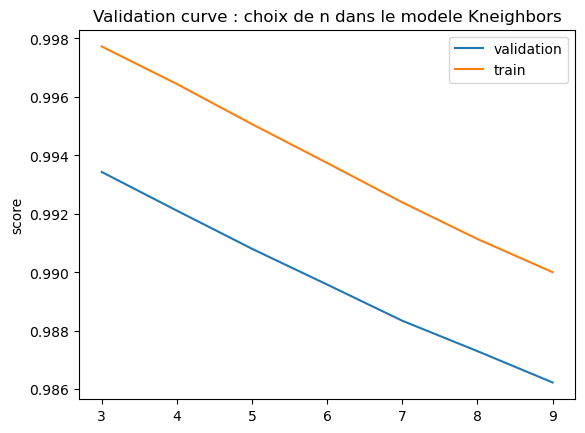

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


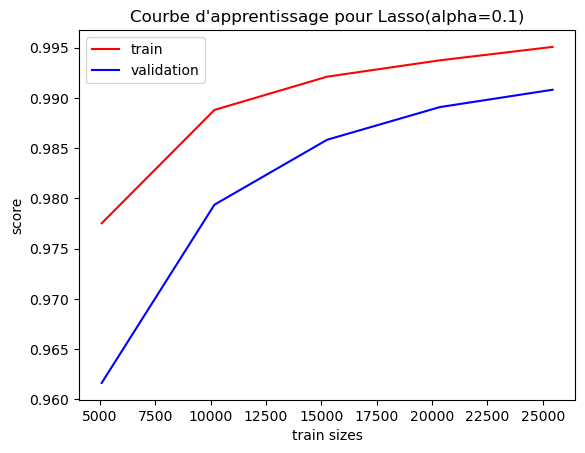

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels              N  
count  39755.000000   39755.000000      39755.000000   39755.000000  
mean     112.186234     154.727231         74.127828     902.736184  
std       40.680494      29.675542          3.714219    2211.477666  
min       44.000000      31.824490         56.000000      21.000000  
25%       88.000000     142.388981         72.000000      67.000000  
50%      110.000000     155.821720         74.000000     192.000000  
75%      120.000000     168.940433         76.000000     692.000000  
max      478.000000     405.892593         96.000000  117339.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

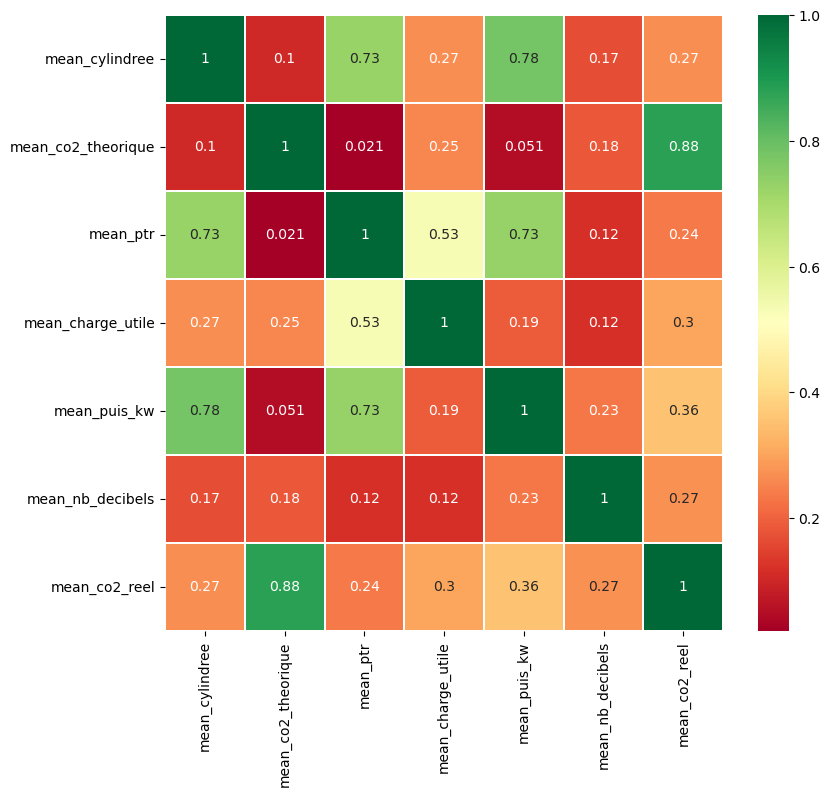

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.279
R2_score = 0.901


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.25
R2_score_model = 0.908


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.20472867e+00  2.49586223e+01  1.39213415e+00  1.13476404e+00
  1.02838668e+01  3.30581021e-01  4.76450931e-04  2.94835728e+00
 -1.70674378e+00  4.11615181e-01 -4.18012608e-01 -1.57728272e-01
 -1.79077604e+00 -1.83742975e-01  7.15290610e-01 -7.44273636e-01
  2.65876781e-01 -1.31647939e-01 -2.97729775e-01  4.07948295e-01
 -6.08567955e-01  1.86878742e-01 -2.37196725e-01  9.36647105e-01
  1.70530732e-01  7.62495821e-02  3.90871932e-02 -3.83795305e-01]
Le coefficient à l'origine est 154.3082052830484


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

27566    178.932000
9005     127.017805
6909     127.427411
930      170.290305
30432    234.805556
Name: mean_co2_reel, dtype: float64
[172.82812767 117.38942302 116.32128807 164.07597322 231.4097615 ]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 28.93
R2_score_th = 0.1


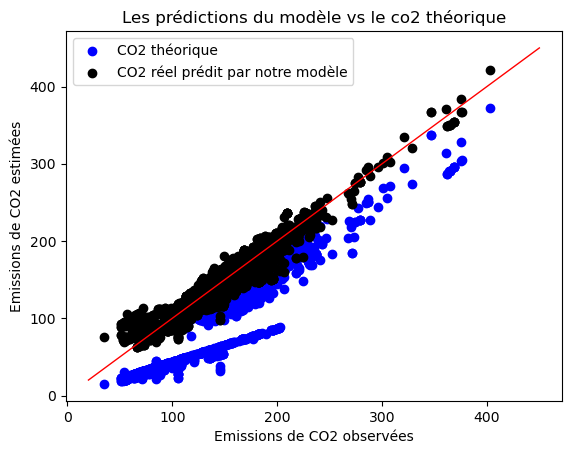

In [ ]:
plt.scatter(y_test, dataOG, color='blue', label = 'CO2 théorique')
plt.scatter(y_test, test_predictions, color='black', label='CO2 réel prédit par notre modèle')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Emissions de CO2 observées")
plt.ylabel("Emissions de CO2 estimées")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.legend()
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree         -1.204729
mean_co2_theorique     24.958622
mean_ptr                1.392134
mean_charge_utile       1.134764
mean_puis_kw           10.283867
mean_nb_decibels        0.330581
N                       0.000476
ES                      2.948357
GO                     -1.706744
FE                      0.411615
EE                     -0.418013
EH                     -0.157728
GH                     -1.790776
GN                     -0.183743
GL                      0.715291
EG                     -0.744274
FH                      0.265877
EN                     -0.131648
BERLINE                -0.297730
TS TERRAINS/CHEMINS     0.407948
BREAK                  -0.608568
MINIBUS                 0.186879
MONOSPACE COMPACT      -0.237197
COMBISPACE              0.936647
COUPE                   0.170531
MONOSPACE               0.076250
MINISPACE               0.039087
CABRIOLET              -0.383795
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_cylindree         -0.042848
mean_co2_theorique     24.744910
mean_ptr                0.725703
mean_charge_utile       1.354130
mean_puis_kw            9.529319
mean_nb_decibels        0.256252
N                       0.000435
ES                      3.476877
GO                     -1.214472
FE                      0.290415
GH                     -1.273766
GN                     -0.020057
GL                      0.665177
EG                     -0.458226
FH                      0.211811
TS TERRAINS/CHEMINS     0.697134
BREAK                  -0.347881
MINIBUS                 0.004566
COMBISPACE              0.796919
COUPE                   0.015199
CABRIOLET              -0.111195
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS',
       'BREAK', 'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPA

21

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.284
R2_score_model = 0.907


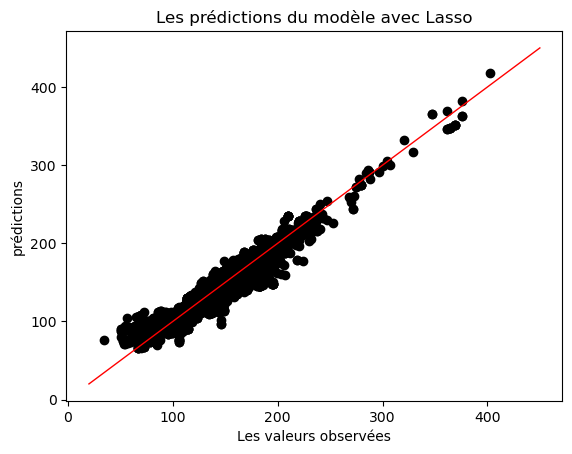

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
14603          1499.0          130.418919    3145.0         555.000000   
40831          1968.0          154.363636    4140.0         596.000000   
30123          1498.0          147.883739    3370.0         591.000000   
5109            999.0          114.365120    2503.0         513.000000   
26805          1199.0          135.001387    2940.0         519.985437   
...               ...                 ...       ...                ...   
11334          1950.0          167.070539    5100.0         740.000000   
2512           1499.0          105.068966    2275.0         585.000000   
5174           1968.0          150.061584    3900.0         755.000000   
5407           1998.0          145.824635    3265.0         574.000000   
19404          1498.0          122.480392    3200.0         569.000000   

       mean_puis_kw  mean_nb_decibels     N  ES  GO  FE  ...  BERLINE  \
14603         100.0          75.00000    74   1   0   0  ...        1   
40831         110.0          77.00000   517   0   1   0  ...        0   
30123         110.0          80.00000  2589   1   0   0  ...        0   
5109           74.0          73.00000  3125   1   0   0  ...        1   
26805          96.0          76.00000  1442   1   0   0  ...        0   
...             ...               ...   ...  ..  ..  ..  ...      ...   
11334         143.0          76.00000   241   0   1   0  ...        0   
2512           75.0          74.00000  1566   0   1   0  ...        1   
5174           85.0          79.00000   341   0   1   0  ...        0   
5407          132.0          74.80167   479   0   0   0  ...        0   
19404          96.0          78.00000   102   1   0   0  ...        1   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
14603                    0      0        0                  0           0   
40831                    1      0        0                  0           0   
30123                    1      0        0                  0           0   
5109                     0      0        0                  0           0   
26805                    1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
11334                    1      0        0                  0           0   
2512                     0      0        0                  0           0   
5174                     0      0        0                  1           0   
5407                     1      0        0                  0           0   
19404                    0      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
14603      0          0          0          0  
40831      0          0          0          0  
30123      0          0          0          0  
5109       0          0          0          0  
26805      0          0          0          0  
...      ...        ...        ...        ...  
11334      0          0          0          0  
2512       0          0          0          0  
5174       0          0          0          0  
5407       0          0          0          0  
19404      0          0          0          0  

[31804 rows x 28 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 5.65
R2_score_model = 0.965


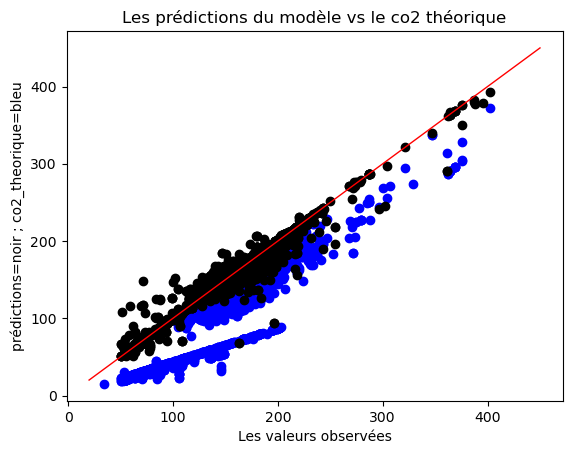

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

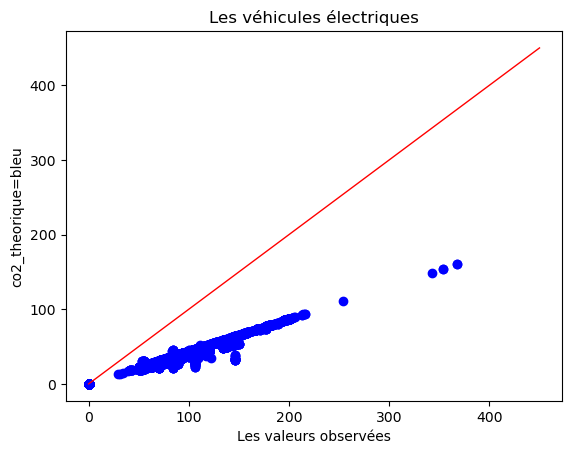

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51260200 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-86.27911882979427

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.2280697006643

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-91.44779869887326

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

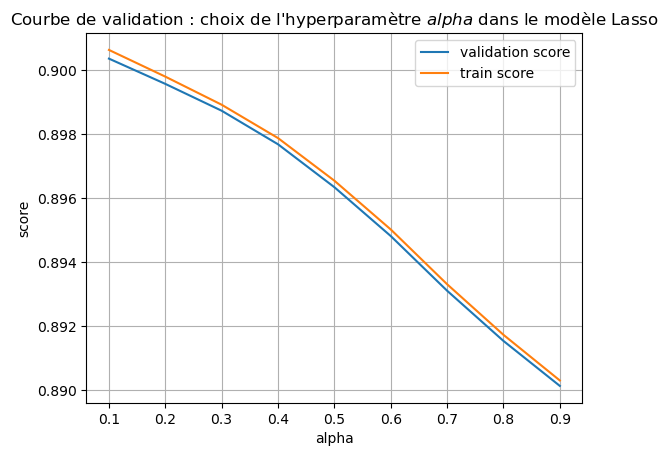

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation score')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('alpha')
plt.title('Courbe de validation : choix de l\'hyperparamètre $\t{alpha}$ dans le modèle Lasso')
plt.grid()
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9003533169927239
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.612095
mean_co2_theorique     24.977455
mean_ptr                1.028400
mean_charge_utile       1.246645
mean_puis_kw            9.862987
mean_nb_decibels        0.286573
N                       0.000457
ES                      3.333997
GO                     -1.323758
FE                      0.365775
GH                     -1.449686
GN                     -0.099120
GL                      0.754522
EG                     -0.581055
FH                      0.252985
EN                     -0.048709
TS TERRAINS/CHEMINS     0.697397
BREAK                  -0.381756
MINIBUS                 0.117264
MONOSPACE COMPACT      -0.046311
COMBISPACE              0.906369
COUPE                   0.126836
MONOSPACE               0.008508
CABRIOLET              -0.226072
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH'

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


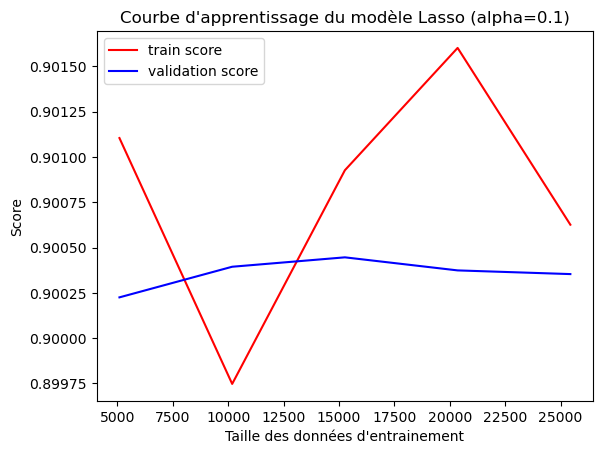

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du modèle Lasso (alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

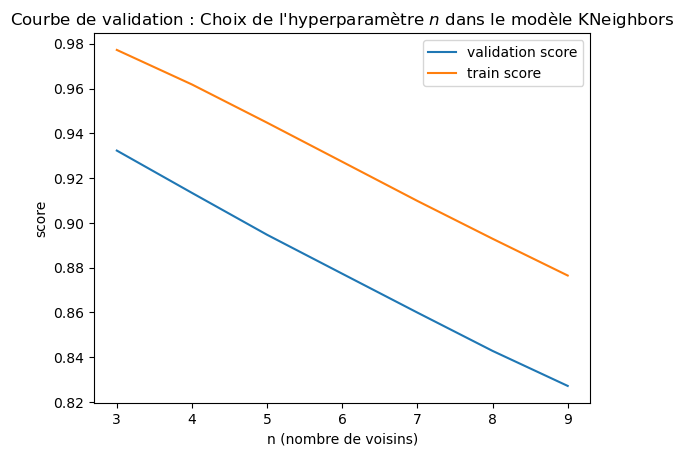

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation score')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('n (nombre de voisins)')
plt.title('Courbe de validation : Choix de l\'hyperparamètre $\t n$ dans le modèle KNeighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.86037971 0.85699044 0.85699044 0.85699044 0.85699044]
 [0.92429272 0.92706257 0.92759356 0.92759356 0.92759356]
 [0.95457997 0.95689504 0.95396898 0.95294864 0.95294864]
 [0.9680447  0.96908012 0.96822308 0.96709508 0.96836349]
 [0.97691937 0.97835411 0.97744336 0.97627903 0.97722974]]
[[0.654713   0.64426468 0.65013769 0.63515611 0.63353993]
 [0.79168495 0.80857926 0.80300246 0.79327236 0.78180878]
 [0.87336193 0.87681221 0.87730763 0.86568522 0.85928914]
 [0.90706058 0.91139858 0.91616786 0.89897444 0.89294444]
 [0.92506173 0.93393259 0.93670103 0.93736545 0.92833253]]


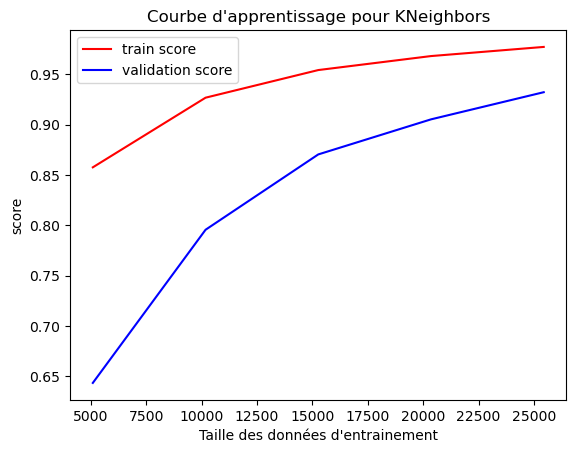

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(n_neighbors=3), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour KNeighbors')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

NameError: name 'data2' is not defined

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

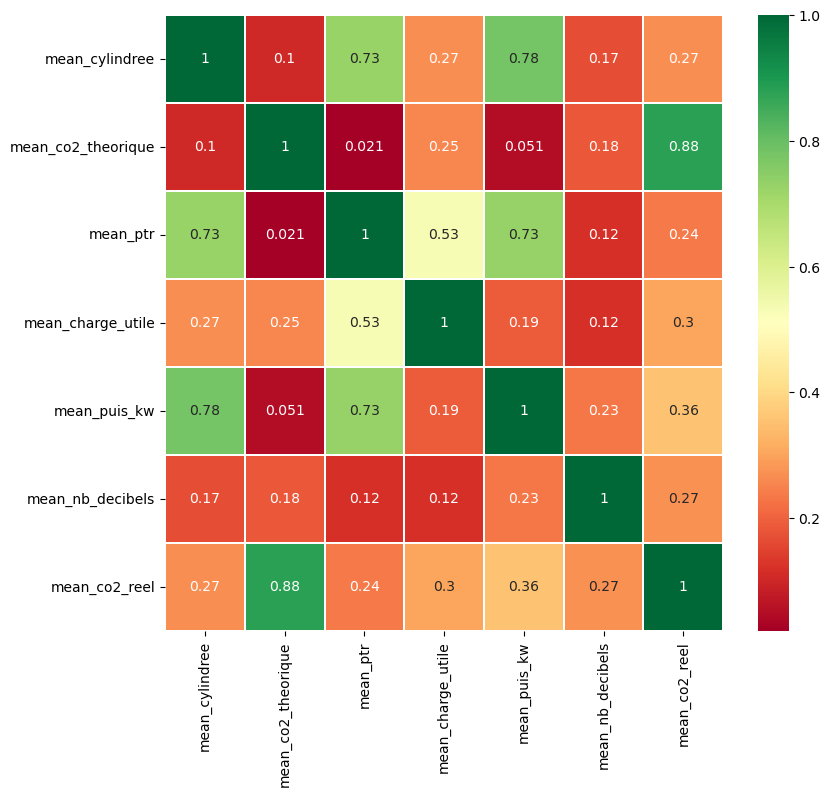

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


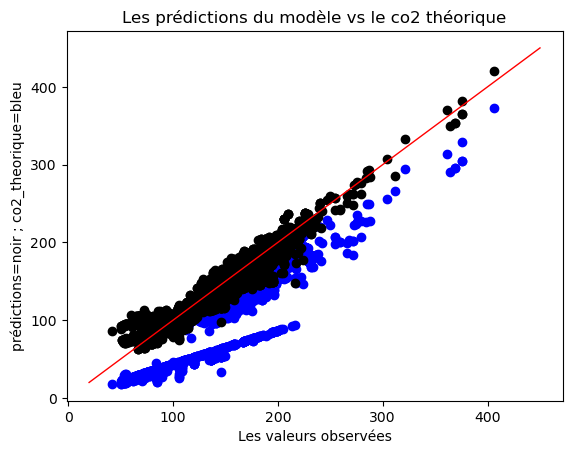

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


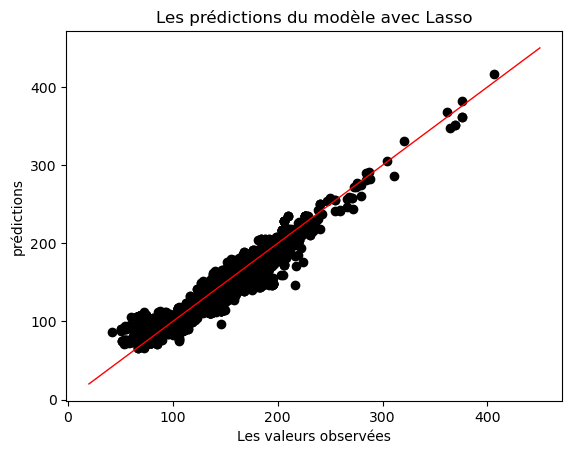

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


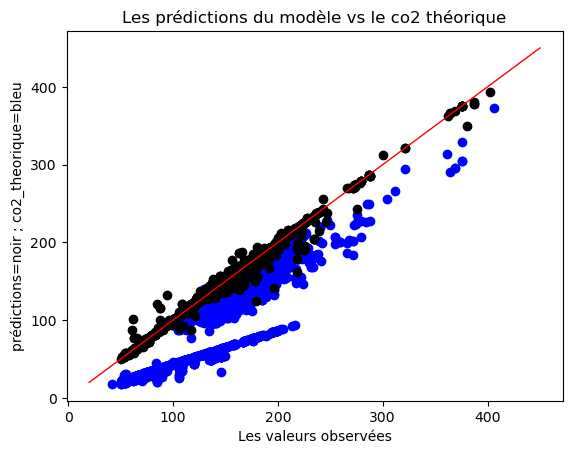

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

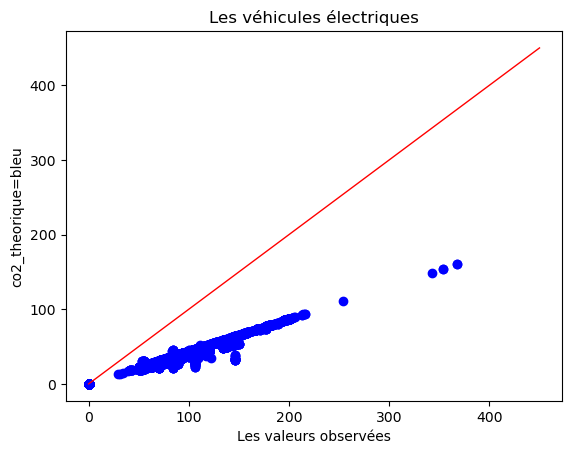

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

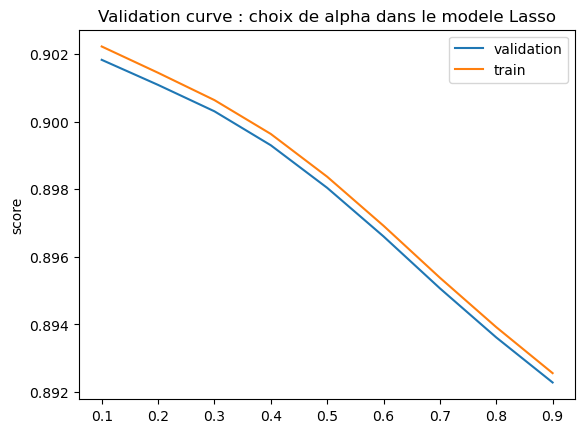

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


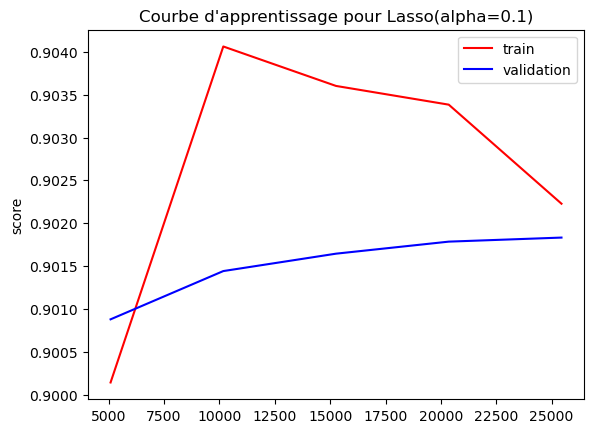

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

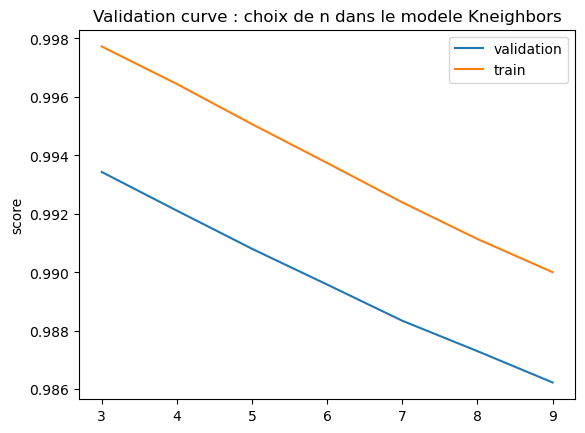

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


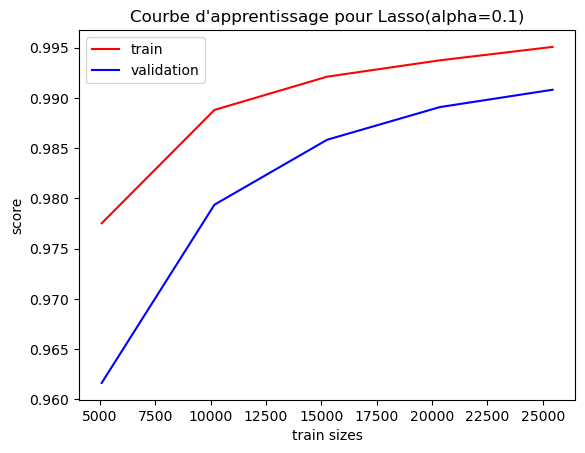

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

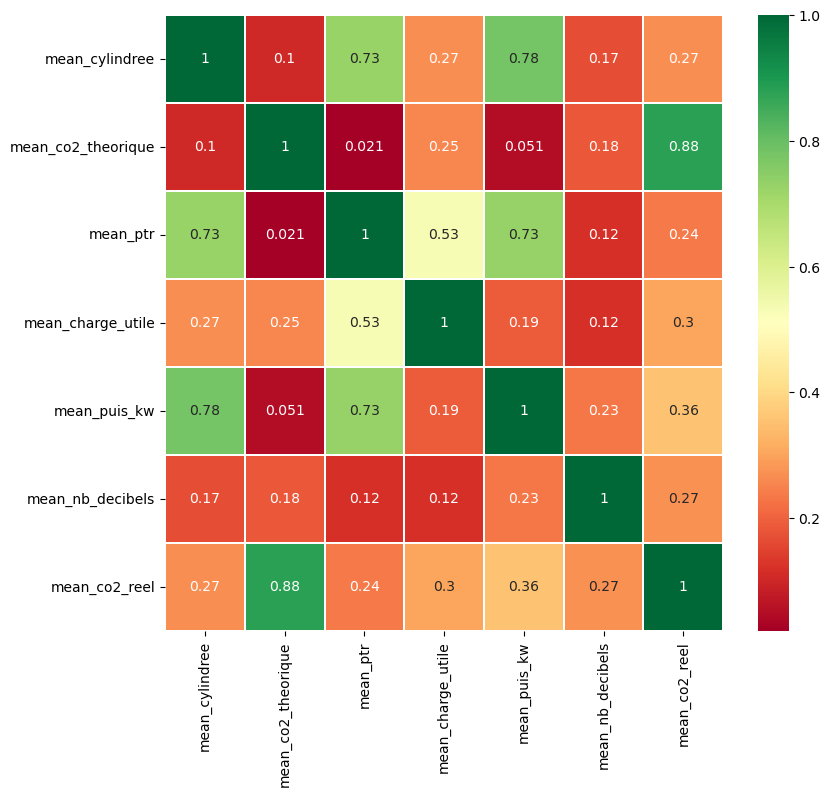

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


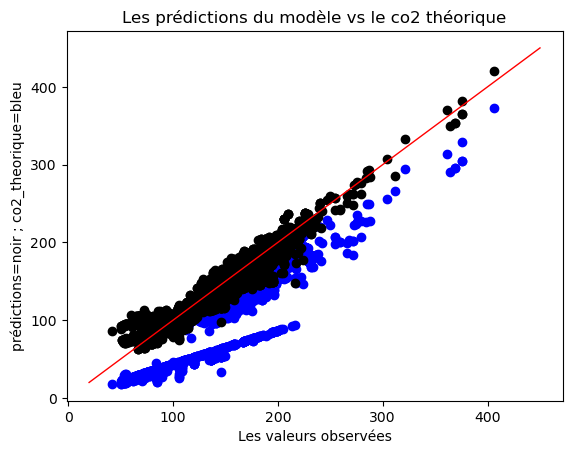

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


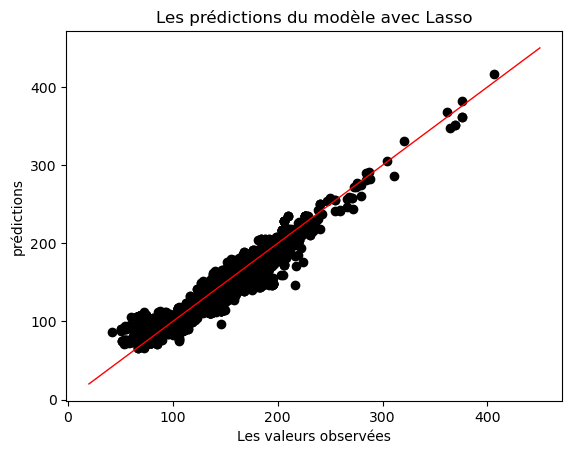

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


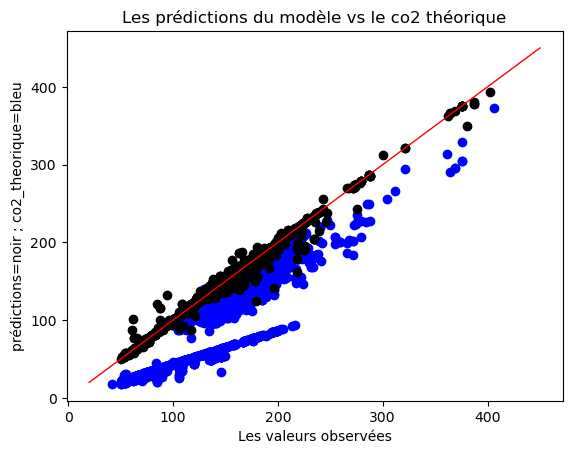

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

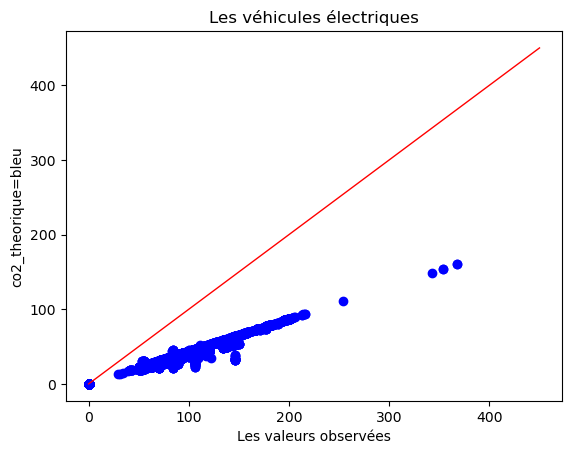

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

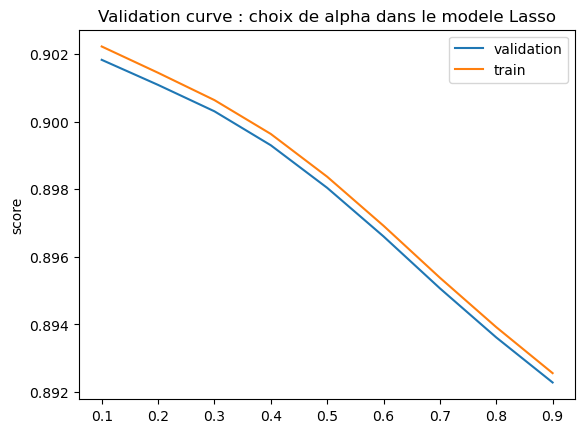

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


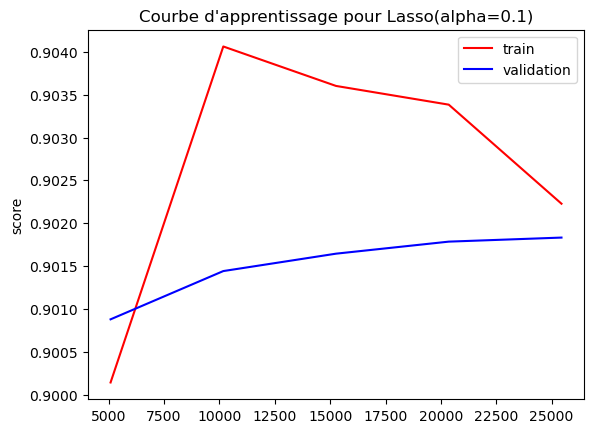

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

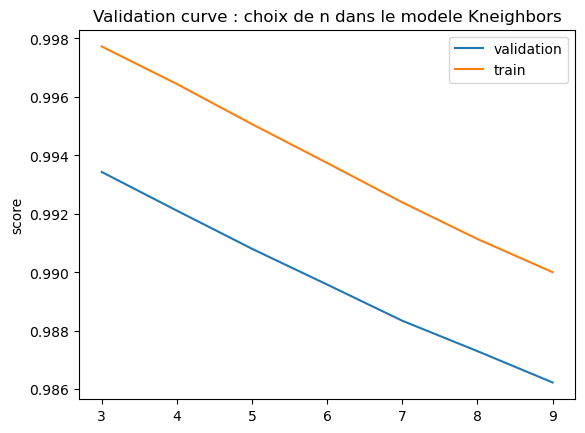

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


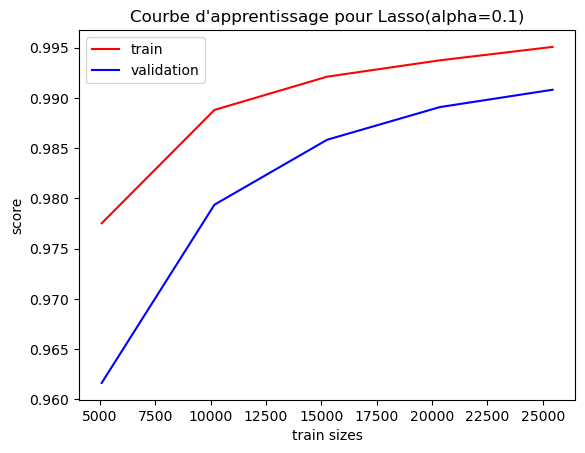

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels              N  
count  39755.000000   39755.000000      39755.000000   39755.000000  
mean     112.186234     154.727231         74.127828     902.736184  
std       40.680494      29.675542          3.714219    2211.477666  
min       44.000000      31.824490         56.000000      21.000000  
25%       88.000000     142.388981         72.000000      67.000000  
50%      110.000000     155.821720         74.000000     192.000000  
75%      120.000000     168.940433         76.000000     692.000000  
max      478.000000     405.892593         96.000000  117339.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

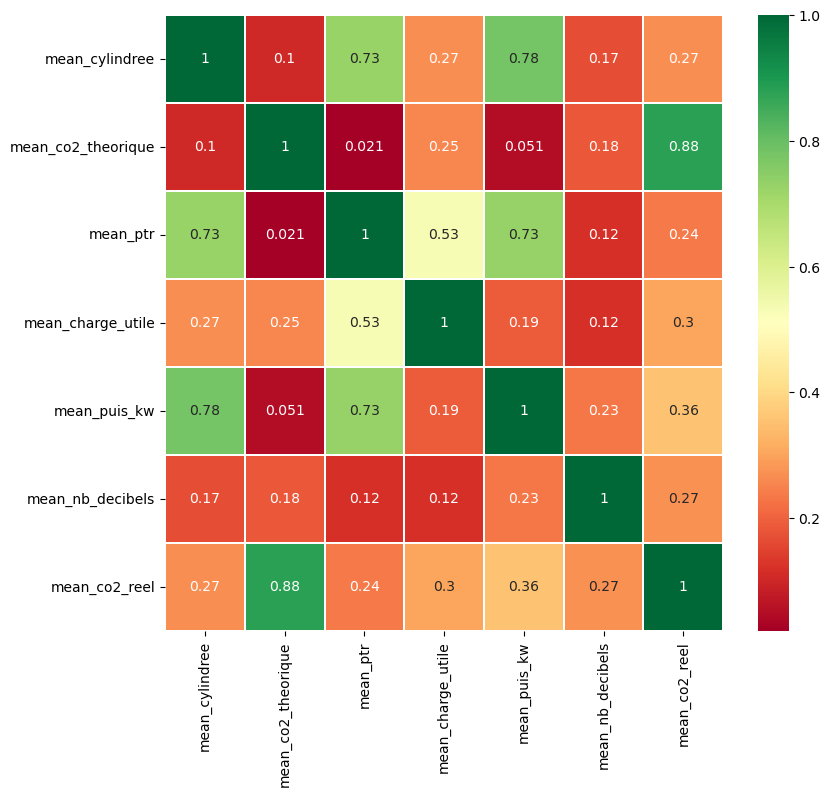

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.279
R2_score = 0.901


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.25
R2_score_model = 0.908


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.20472867e+00  2.49586223e+01  1.39213415e+00  1.13476404e+00
  1.02838668e+01  3.30581021e-01  4.76450931e-04  2.94835728e+00
 -1.70674378e+00  4.11615181e-01 -4.18012608e-01 -1.57728272e-01
 -1.79077604e+00 -1.83742975e-01  7.15290610e-01 -7.44273636e-01
  2.65876781e-01 -1.31647939e-01 -2.97729775e-01  4.07948295e-01
 -6.08567955e-01  1.86878742e-01 -2.37196725e-01  9.36647105e-01
  1.70530732e-01  7.62495821e-02  3.90871932e-02 -3.83795305e-01]
Le coefficient à l'origine est 154.3082052830484


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

27566    178.932000
9005     127.017805
6909     127.427411
930      170.290305
30432    234.805556
Name: mean_co2_reel, dtype: float64
[172.82812767 117.38942302 116.32128807 164.07597322 231.4097615 ]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 28.93
R2_score_th = 0.1


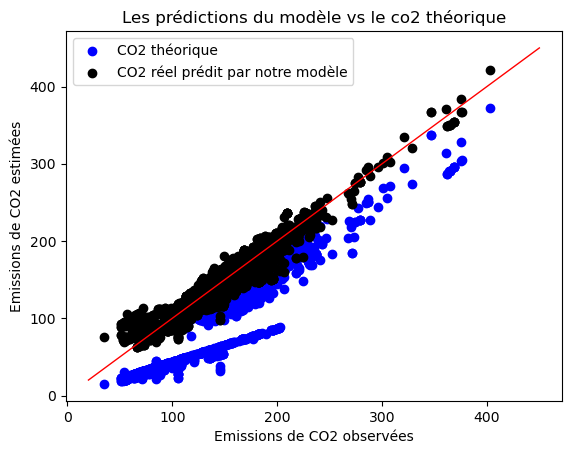

In [ ]:
plt.scatter(y_test, dataOG, color='blue', label = 'CO2 théorique')
plt.scatter(y_test, test_predictions, color='black', label='CO2 réel prédit par notre modèle')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Emissions de CO2 observées")
plt.ylabel("Emissions de CO2 estimées")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.legend()
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree         -1.204729
mean_co2_theorique     24.958622
mean_ptr                1.392134
mean_charge_utile       1.134764
mean_puis_kw           10.283867
mean_nb_decibels        0.330581
N                       0.000476
ES                      2.948357
GO                     -1.706744
FE                      0.411615
EE                     -0.418013
EH                     -0.157728
GH                     -1.790776
GN                     -0.183743
GL                      0.715291
EG                     -0.744274
FH                      0.265877
EN                     -0.131648
BERLINE                -0.297730
TS TERRAINS/CHEMINS     0.407948
BREAK                  -0.608568
MINIBUS                 0.186879
MONOSPACE COMPACT      -0.237197
COMBISPACE              0.936647
COUPE                   0.170531
MONOSPACE               0.076250
MINISPACE               0.039087
CABRIOLET              -0.383795
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_cylindree         -0.042848
mean_co2_theorique     24.744910
mean_ptr                0.725703
mean_charge_utile       1.354130
mean_puis_kw            9.529319
mean_nb_decibels        0.256252
N                       0.000435
ES                      3.476877
GO                     -1.214472
FE                      0.290415
GH                     -1.273766
GN                     -0.020057
GL                      0.665177
EG                     -0.458226
FH                      0.211811
TS TERRAINS/CHEMINS     0.697134
BREAK                  -0.347881
MINIBUS                 0.004566
COMBISPACE              0.796919
COUPE                   0.015199
CABRIOLET              -0.111195
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS',
       'BREAK', 'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPA

21

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.284
R2_score_model = 0.907


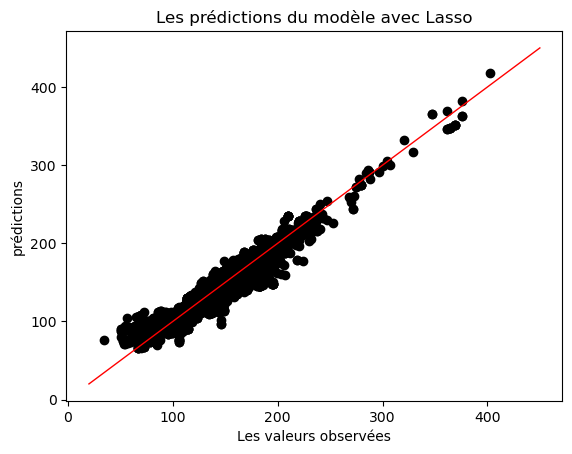

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
14603          1499.0          130.418919    3145.0         555.000000   
40831          1968.0          154.363636    4140.0         596.000000   
30123          1498.0          147.883739    3370.0         591.000000   
5109            999.0          114.365120    2503.0         513.000000   
26805          1199.0          135.001387    2940.0         519.985437   
...               ...                 ...       ...                ...   
11334          1950.0          167.070539    5100.0         740.000000   
2512           1499.0          105.068966    2275.0         585.000000   
5174           1968.0          150.061584    3900.0         755.000000   
5407           1998.0          145.824635    3265.0         574.000000   
19404          1498.0          122.480392    3200.0         569.000000   

       mean_puis_kw  mean_nb_decibels     N  ES  GO  FE  ...  BERLINE  \
14603         100.0          75.00000    74   1   0   0  ...        1   
40831         110.0          77.00000   517   0   1   0  ...        0   
30123         110.0          80.00000  2589   1   0   0  ...        0   
5109           74.0          73.00000  3125   1   0   0  ...        1   
26805          96.0          76.00000  1442   1   0   0  ...        0   
...             ...               ...   ...  ..  ..  ..  ...      ...   
11334         143.0          76.00000   241   0   1   0  ...        0   
2512           75.0          74.00000  1566   0   1   0  ...        1   
5174           85.0          79.00000   341   0   1   0  ...        0   
5407          132.0          74.80167   479   0   0   0  ...        0   
19404          96.0          78.00000   102   1   0   0  ...        1   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
14603                    0      0        0                  0           0   
40831                    1      0        0                  0           0   
30123                    1      0        0                  0           0   
5109                     0      0        0                  0           0   
26805                    1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
11334                    1      0        0                  0           0   
2512                     0      0        0                  0           0   
5174                     0      0        0                  1           0   
5407                     1      0        0                  0           0   
19404                    0      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
14603      0          0          0          0  
40831      0          0          0          0  
30123      0          0          0          0  
5109       0          0          0          0  
26805      0          0          0          0  
...      ...        ...        ...        ...  
11334      0          0          0          0  
2512       0          0          0          0  
5174       0          0          0          0  
5407       0          0          0          0  
19404      0          0          0          0  

[31804 rows x 28 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 5.65
R2_score_model = 0.965


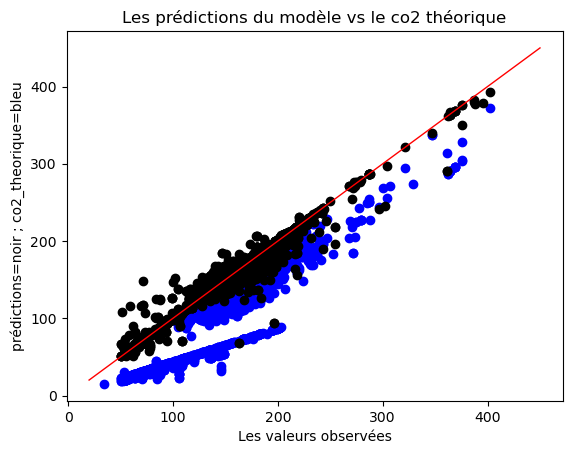

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

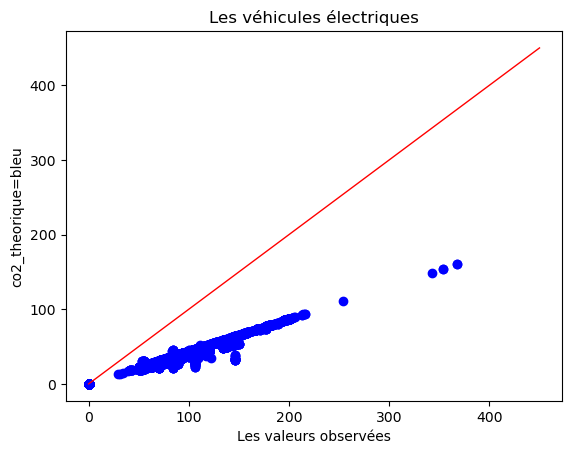

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51260200 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-86.27911882979427

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.2280697006643

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-91.44779869887326

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

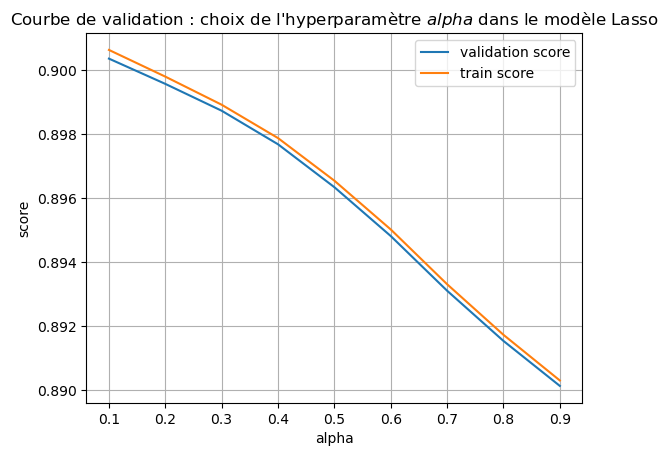

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation score')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('alpha')
plt.title('Courbe de validation : choix de l\'hyperparamètre $\t{alpha}$ dans le modèle Lasso')
plt.grid()
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9003533169927239
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.612095
mean_co2_theorique     24.977455
mean_ptr                1.028400
mean_charge_utile       1.246645
mean_puis_kw            9.862987
mean_nb_decibels        0.286573
N                       0.000457
ES                      3.333997
GO                     -1.323758
FE                      0.365775
GH                     -1.449686
GN                     -0.099120
GL                      0.754522
EG                     -0.581055
FH                      0.252985
EN                     -0.048709
TS TERRAINS/CHEMINS     0.697397
BREAK                  -0.381756
MINIBUS                 0.117264
MONOSPACE COMPACT      -0.046311
COMBISPACE              0.906369
COUPE                   0.126836
MONOSPACE               0.008508
CABRIOLET              -0.226072
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH'

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


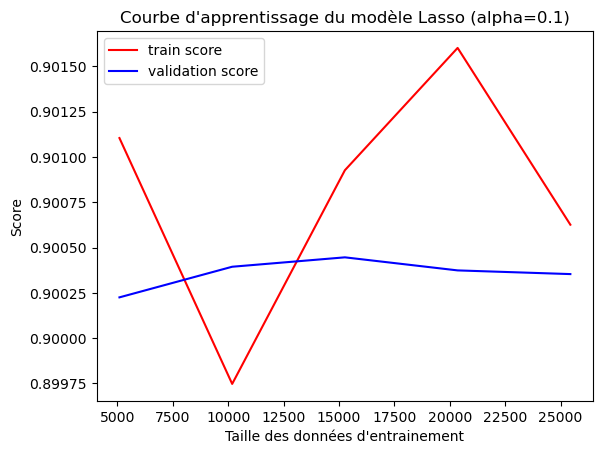

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du modèle Lasso (alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

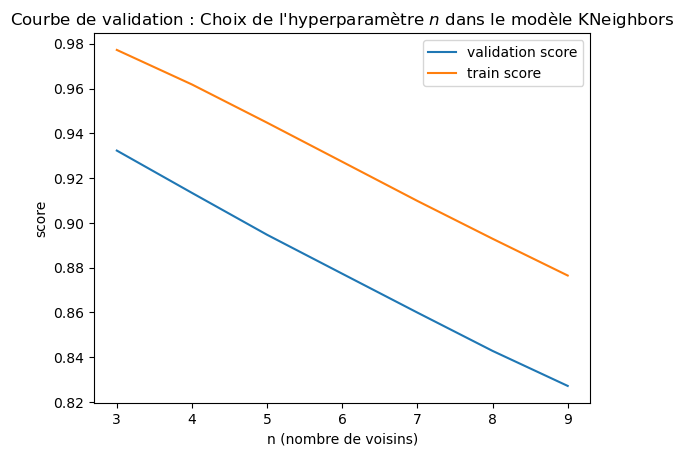

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation score')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('n (nombre de voisins)')
plt.title('Courbe de validation : Choix de l\'hyperparamètre $\t n$ dans le modèle KNeighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.86037971 0.85699044 0.85699044 0.85699044 0.85699044]
 [0.92429272 0.92706257 0.92759356 0.92759356 0.92759356]
 [0.95457997 0.95689504 0.95396898 0.95294864 0.95294864]
 [0.9680447  0.96908012 0.96822308 0.96709508 0.96836349]
 [0.97691937 0.97835411 0.97744336 0.97627903 0.97722974]]
[[0.654713   0.64426468 0.65013769 0.63515611 0.63353993]
 [0.79168495 0.80857926 0.80300246 0.79327236 0.78180878]
 [0.87336193 0.87681221 0.87730763 0.86568522 0.85928914]
 [0.90706058 0.91139858 0.91616786 0.89897444 0.89294444]
 [0.92506173 0.93393259 0.93670103 0.93736545 0.92833253]]


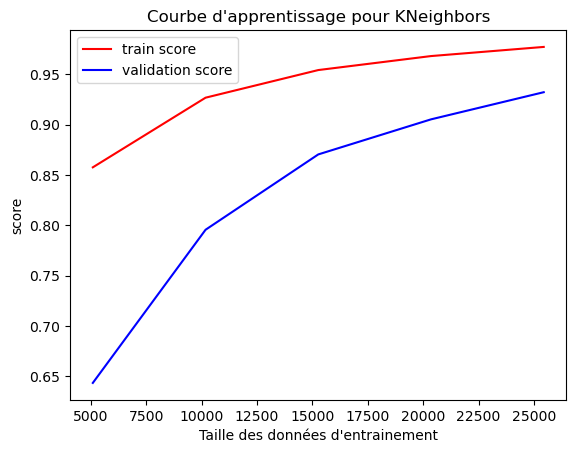

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(n_neighbors=3), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour KNeighbors')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

NameError: name 'data2' is not defined

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

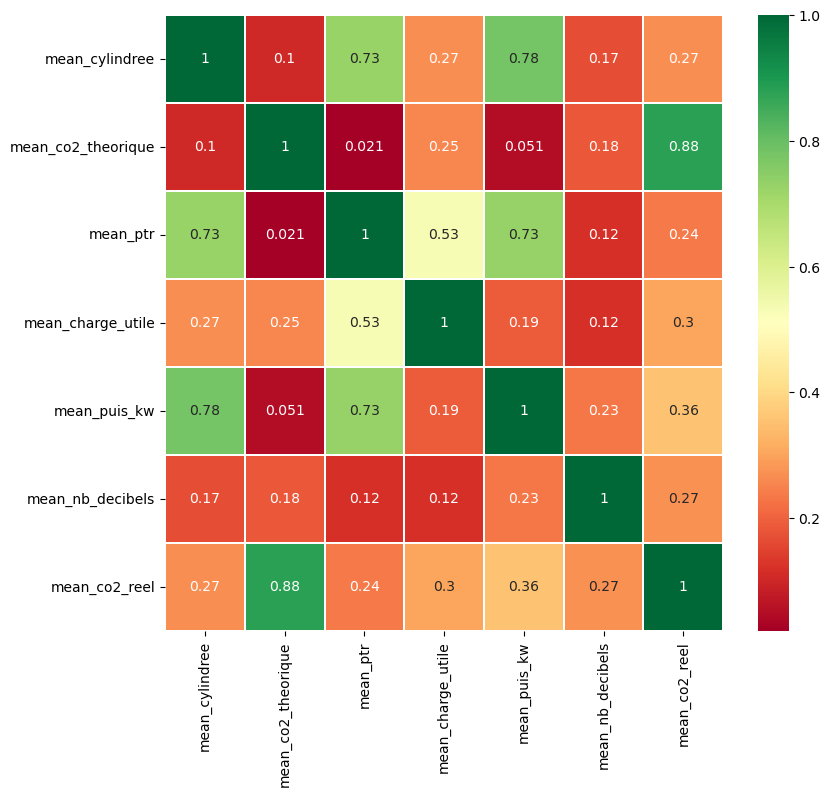

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


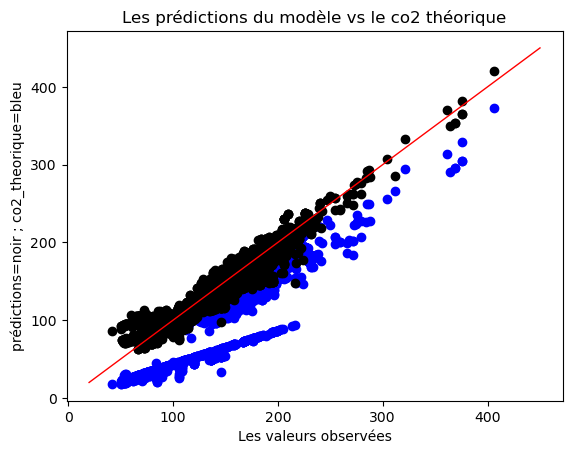

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


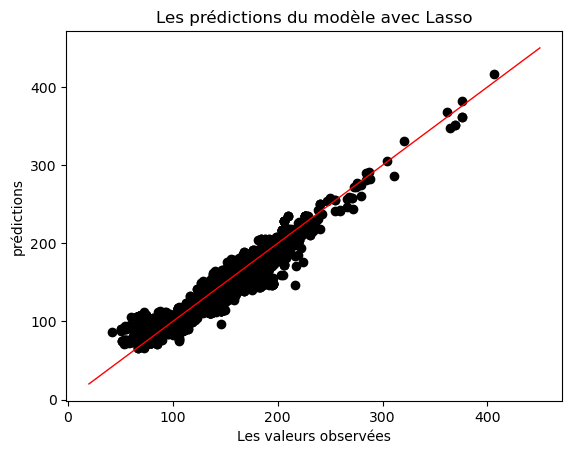

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


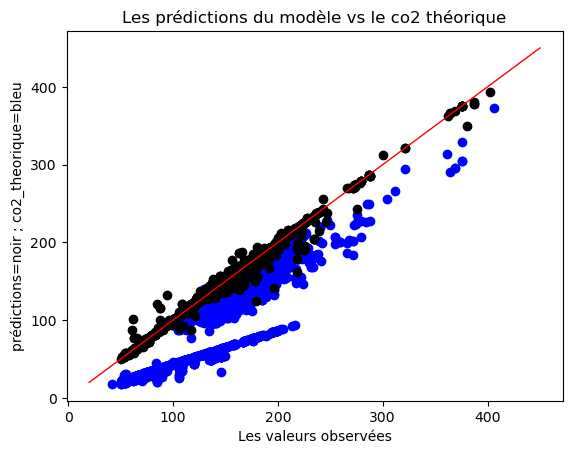

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

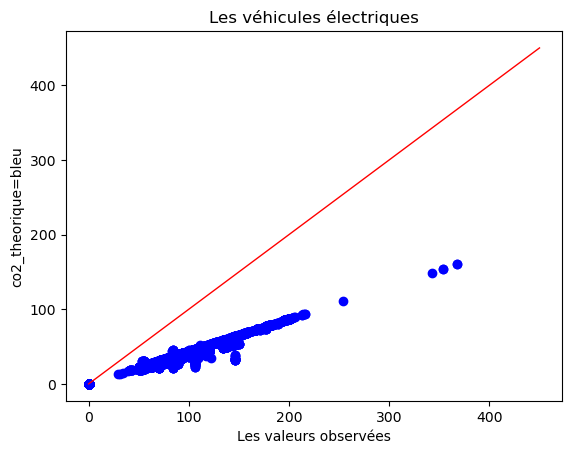

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

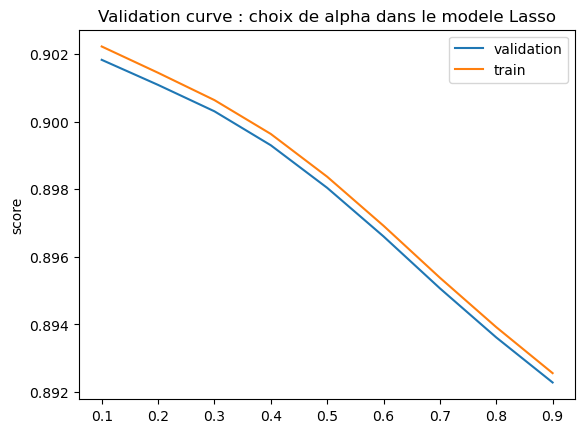

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


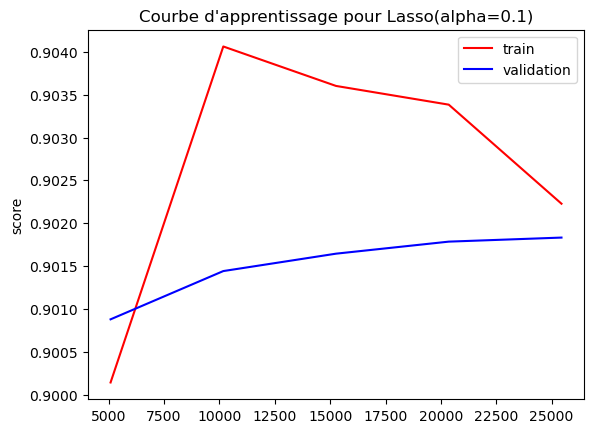

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

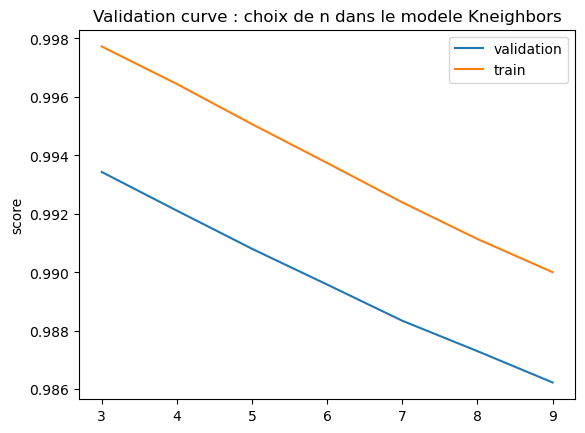

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


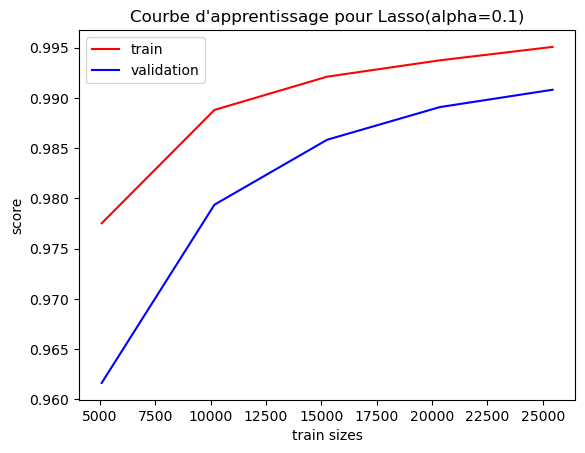

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

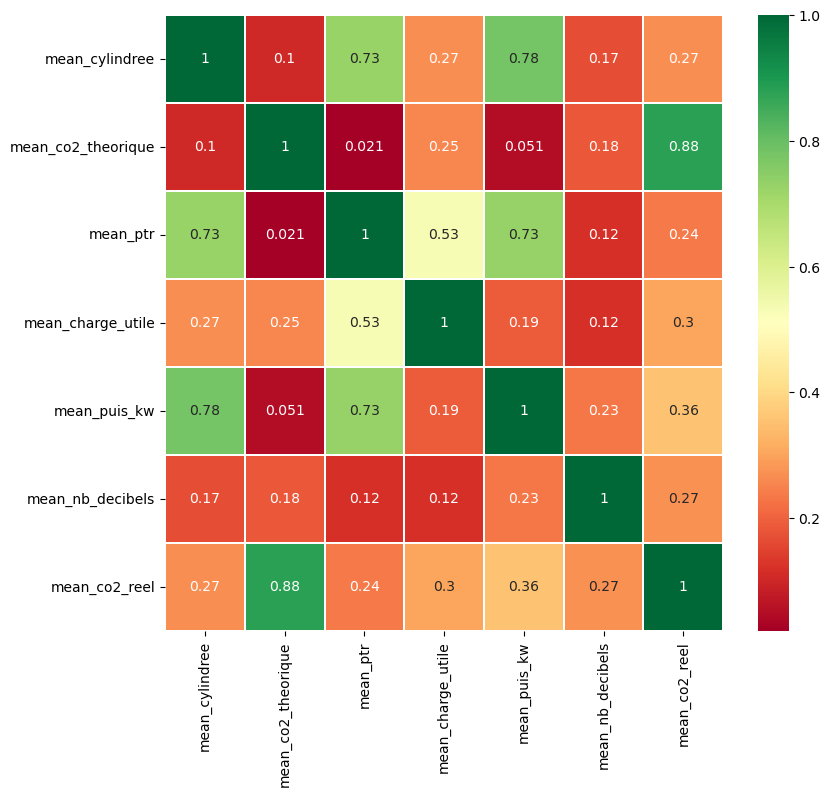

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


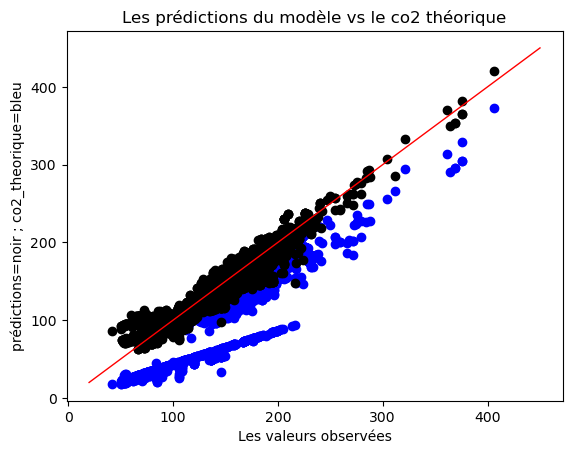

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


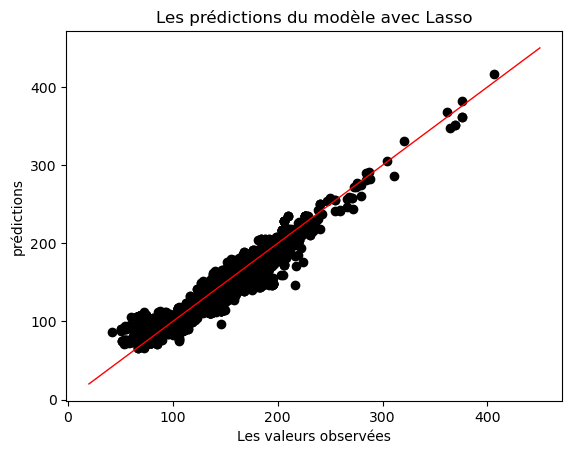

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


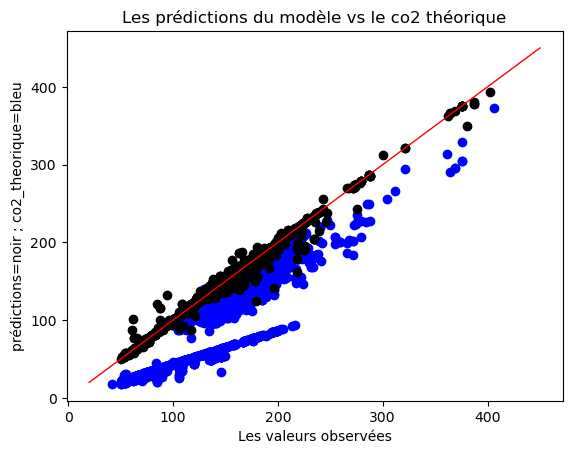

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

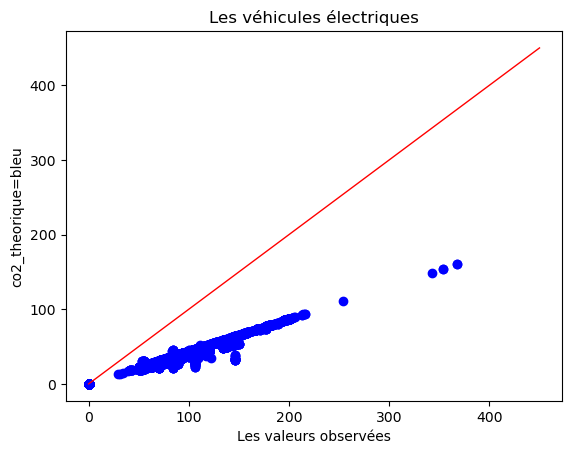

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

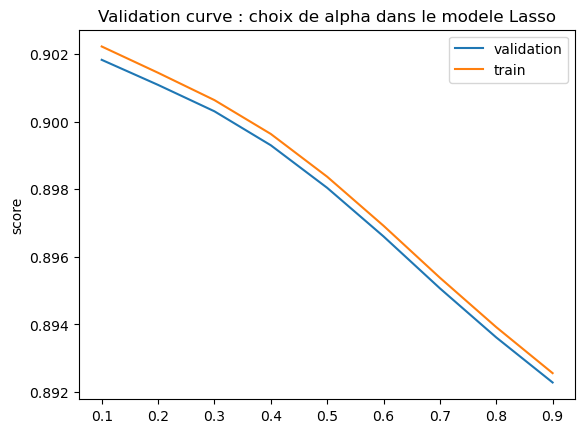

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


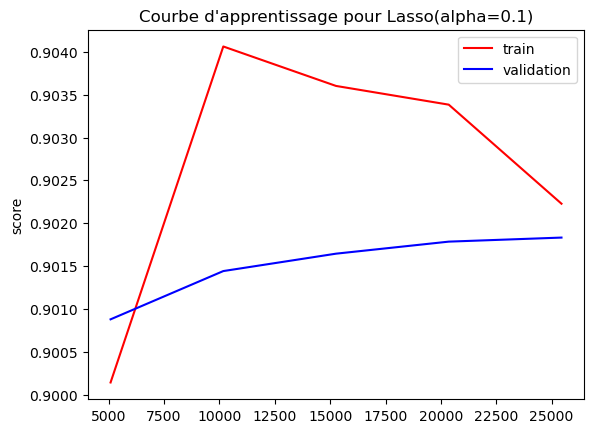

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

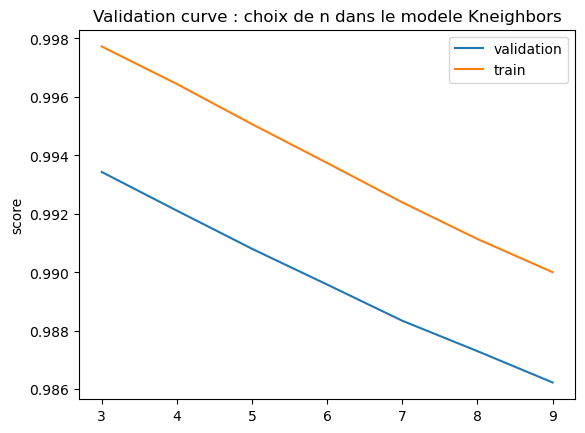

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


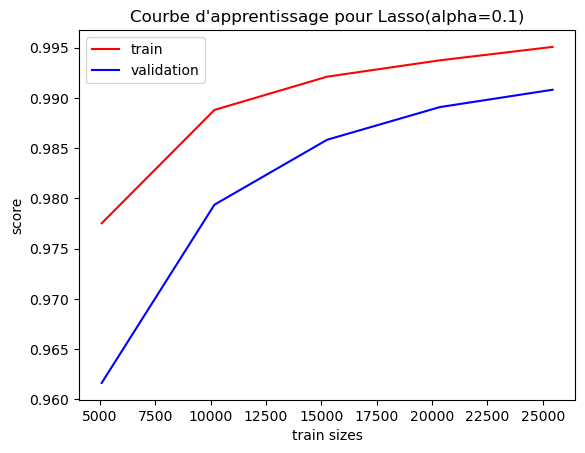

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [1]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [2]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [3]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [4]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [5]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [6]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [7]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [8]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [9]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [10]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [11]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels              N  
count  39755.000000   39755.000000      39755.000000   39755.000000  
mean     112.186234     154.727231         74.127828     902.736184  
std       40.680494      29.675542          3.714219    2211.477666  
min       44.000000      31.824490         56.000000      21.000000  
25%       88.000000     142.388981         72.000000      67.000000  
50%      110.000000     155.821720         74.000000     192.000000  
75%      120.000000     168.940433         76.000000     692.000000  
max      478.000000     405.892593         96.000000  117339.000000

In [12]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [13]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [14]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [15]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [16]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [17]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

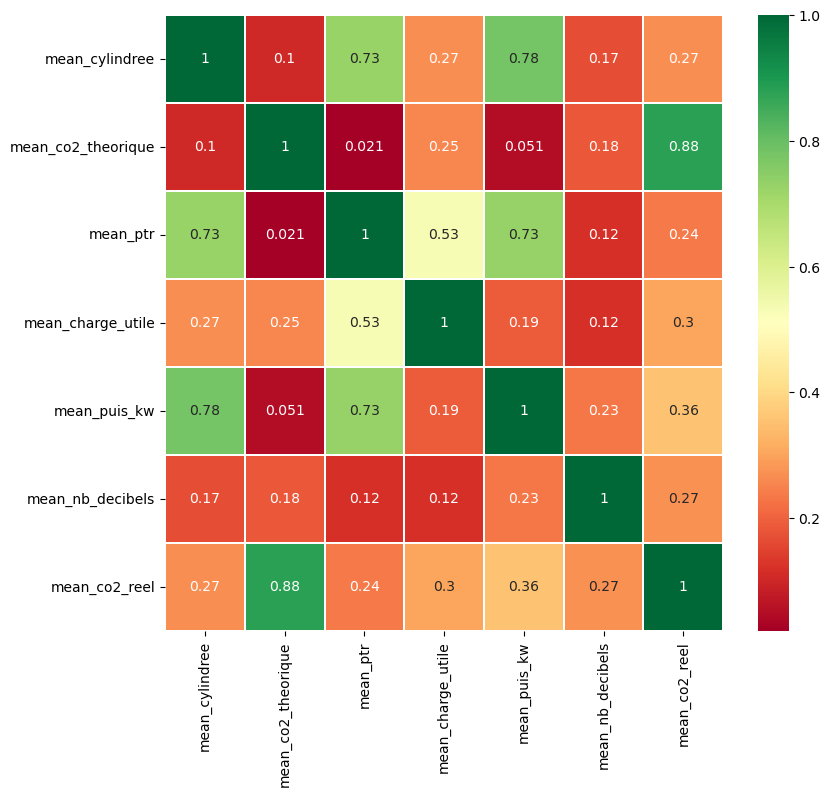

In [18]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [20]:
regression_alg=LinearRegression()

In [21]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [22]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.279
R2_score = 0.901


In [23]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.25
R2_score_model = 0.908


In [24]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.20472867e+00  2.49586223e+01  1.39213415e+00  1.13476404e+00
  1.02838668e+01  3.30581021e-01  4.76450931e-04  2.94835728e+00
 -1.70674378e+00  4.11615181e-01 -4.18012608e-01 -1.57728272e-01
 -1.79077604e+00 -1.83742975e-01  7.15290610e-01 -7.44273636e-01
  2.65876781e-01 -1.31647939e-01 -2.97729775e-01  4.07948295e-01
 -6.08567955e-01  1.86878742e-01 -2.37196725e-01  9.36647105e-01
  1.70530732e-01  7.62495821e-02  3.90871932e-02 -3.83795305e-01]
Le coefficient à l'origine est 154.3082052830484


In [25]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

27566    178.932000
9005     127.017805
6909     127.427411
930      170.290305
30432    234.805556
Name: mean_co2_reel, dtype: float64
[172.82812767 117.38942302 116.32128807 164.07597322 231.4097615 ]


In [26]:
dataOG = dataOG.iloc[list(y_test.index)]

In [27]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 28.93
R2_score_th = 0.1


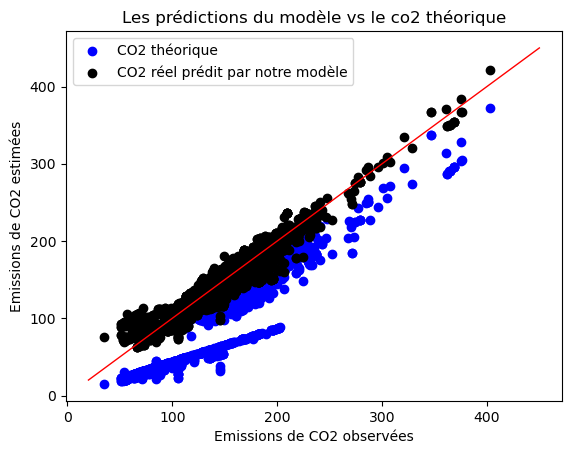

In [28]:
plt.scatter(y_test, dataOG, color='blue', label = 'CO2 théorique')
plt.scatter(y_test, test_predictions, color='black', label='CO2 réel prédit par notre modèle')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Emissions de CO2 observées")
plt.ylabel("Emissions de CO2 estimées")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.legend()
plt.show()

In [29]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree         -1.204729
mean_co2_theorique     24.958622
mean_ptr                1.392134
mean_charge_utile       1.134764
mean_puis_kw           10.283867
mean_nb_decibels        0.330581
N                       0.000476
ES                      2.948357
GO                     -1.706744
FE                      0.411615
EE                     -0.418013
EH                     -0.157728
GH                     -1.790776
GN                     -0.183743
GL                      0.715291
EG                     -0.744274
FH                      0.265877
EN                     -0.131648
BERLINE                -0.297730
TS TERRAINS/CHEMINS     0.407948
BREAK                  -0.608568
MINIBUS                 0.186879
MONOSPACE COMPACT      -0.237197
COMBISPACE              0.936647
COUPE                   0.170531
MONOSPACE               0.076250
MINISPACE               0.039087
CABRIOLET              -0.383795
dtype: float64


**Régularisation Lasso**

In [30]:
lasso_model = Lasso(alpha=0.2)

In [31]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [32]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_cylindree         -0.042848
mean_co2_theorique     24.744910
mean_ptr                0.725703
mean_charge_utile       1.354130
mean_puis_kw            9.529319
mean_nb_decibels        0.256252
N                       0.000435
ES                      3.476877
GO                     -1.214472
FE                      0.290415
GH                     -1.273766
GN                     -0.020057
GL                      0.665177
EG                     -0.458226
FH                      0.211811
TS TERRAINS/CHEMINS     0.697134
BREAK                  -0.347881
MINIBUS                 0.004566
COMBISPACE              0.796919
COUPE                   0.015199
CABRIOLET              -0.111195
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS',
       'BREAK', 'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPA

21

In [33]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.284
R2_score_model = 0.907


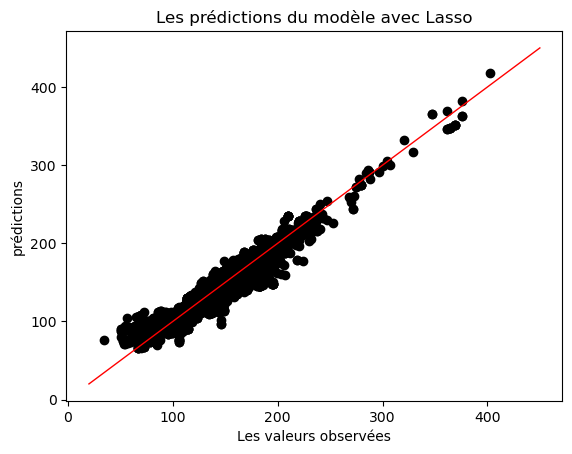

In [34]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [36]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
14603          1499.0          130.418919    3145.0         555.000000   
40831          1968.0          154.363636    4140.0         596.000000   
30123          1498.0          147.883739    3370.0         591.000000   
5109            999.0          114.365120    2503.0         513.000000   
26805          1199.0          135.001387    2940.0         519.985437   
...               ...                 ...       ...                ...   
11334          1950.0          167.070539    5100.0         740.000000   
2512           1499.0          105.068966    2275.0         585.000000   
5174           1968.0          150.061584    3900.0         755.000000   
5407           1998.0          145.824635    3265.0         574.000000   
19404          1498.0          122.480392    3200.0         569.000000   

       mean_puis_kw  mean_nb_decibels     N  ES  GO  FE  ...  BERLINE  \
14603         100.0          75.00000    74   1   0   0  ...        1   
40831         110.0          77.00000   517   0   1   0  ...        0   
30123         110.0          80.00000  2589   1   0   0  ...        0   
5109           74.0          73.00000  3125   1   0   0  ...        1   
26805          96.0          76.00000  1442   1   0   0  ...        0   
...             ...               ...   ...  ..  ..  ..  ...      ...   
11334         143.0          76.00000   241   0   1   0  ...        0   
2512           75.0          74.00000  1566   0   1   0  ...        1   
5174           85.0          79.00000   341   0   1   0  ...        0   
5407          132.0          74.80167   479   0   0   0  ...        0   
19404          96.0          78.00000   102   1   0   0  ...        1   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
14603                    0      0        0                  0           0   
40831                    1      0        0                  0           0   
30123                    1      0        0                  0           0   
5109                     0      0        0                  0           0   
26805                    1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
11334                    1      0        0                  0           0   
2512                     0      0        0                  0           0   
5174                     0      0        0                  1           0   
5407                     1      0        0                  0           0   
19404                    0      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
14603      0          0          0          0  
40831      0          0          0          0  
30123      0          0          0          0  
5109       0          0          0          0  
26805      0          0          0          0  
...      ...        ...        ...        ...  
11334      0          0          0          0  
2512       0          0          0          0  
5174       0          0          0          0  
5407       0          0          0          0  
19404      0          0          0          0  

[31804 rows x 28 columns]

In [37]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [38]:
y_pred = knn.predict(X_test)

In [39]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 5.65
R2_score_model = 0.965


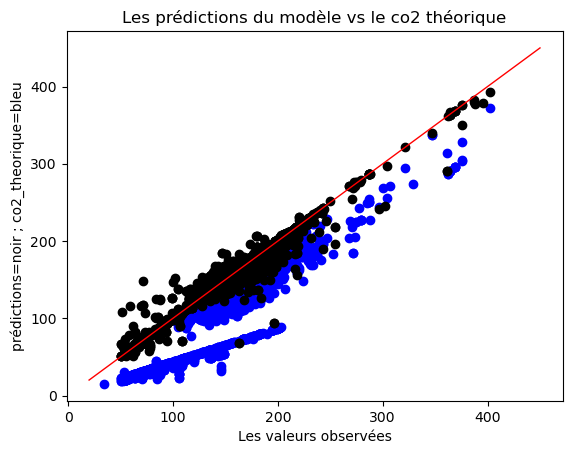

In [40]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [41]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

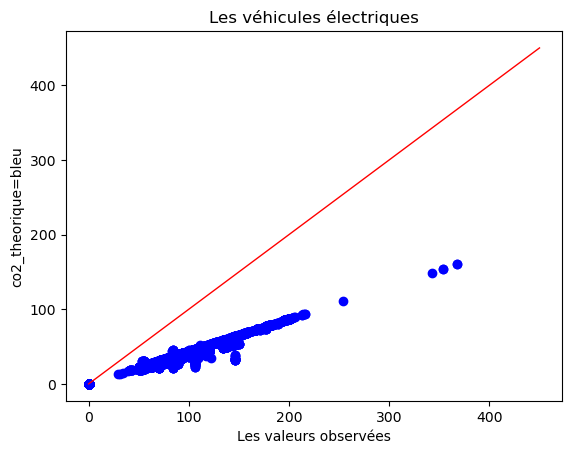

In [42]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [43]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [44]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [45]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [46]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51260200 euros


# MODELE SELECTION
## cross validation

In [47]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-86.27911882979427

In [48]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.2280697006643

In [49]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-91.44779869887326

## Validation curve
Permet de choisir le parametre optimal du modele

In [50]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

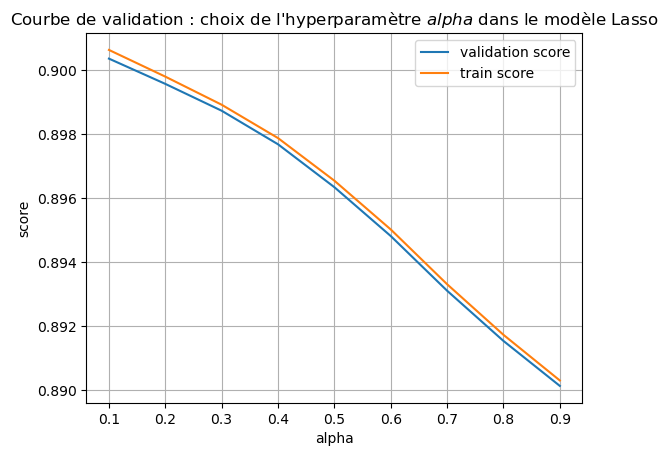

In [58]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation score')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('alpha')
plt.title('Courbe de validation : choix de l\'hyperparamètre $\t{alpha}$ dans le modèle Lasso')
plt.grid()
plt.legend()

In [59]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [60]:
score_lasso # alpha = 0.1 le best parameter

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [61]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9003533169927239
best parameter :  {'alpha': 0.1}


In [62]:
model_lasso=grid_lasso.best_estimator_

In [63]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.612095
mean_co2_theorique     24.977455
mean_ptr                1.028400
mean_charge_utile       1.246645
mean_puis_kw            9.862987
mean_nb_decibels        0.286573
N                       0.000457
ES                      3.333997
GO                     -1.323758
FE                      0.365775
GH                     -1.449686
GN                     -0.099120
GL                      0.754522
EG                     -0.581055
FH                      0.252985
EN                     -0.048709
TS TERRAINS/CHEMINS     0.697397
BREAK                  -0.381756
MINIBUS                 0.117264
MONOSPACE COMPACT      -0.046311
COMBISPACE              0.906369
COUPE                   0.126836
MONOSPACE               0.008508
CABRIOLET              -0.226072
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH'

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [65]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


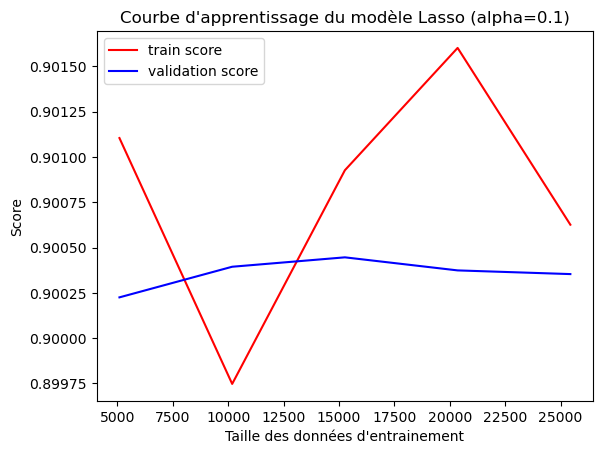

In [72]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du modèle Lasso (alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

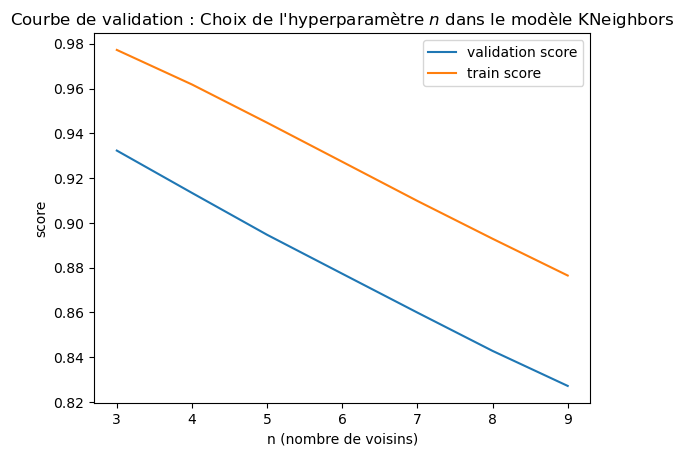

In [78]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation score')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('n (nombre de voisins)')
plt.title('Courbe de validation : Choix de l\'hyperparamètre $\t n$ dans le modèle KNeighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.86037971 0.85699044 0.85699044 0.85699044 0.85699044]
 [0.92429272 0.92706257 0.92759356 0.92759356 0.92759356]
 [0.95457997 0.95689504 0.95396898 0.95294864 0.95294864]
 [0.9680447  0.96908012 0.96822308 0.96709508 0.96836349]
 [0.97691937 0.97835411 0.97744336 0.97627903 0.97722974]]
[[0.654713   0.64426468 0.65013769 0.63515611 0.63353993]
 [0.79168495 0.80857926 0.80300246 0.79327236 0.78180878]
 [0.87336193 0.87681221 0.87730763 0.86568522 0.85928914]
 [0.90706058 0.91139858 0.91616786 0.89897444 0.89294444]
 [0.92506173 0.93393259 0.93670103 0.93736545 0.92833253]]


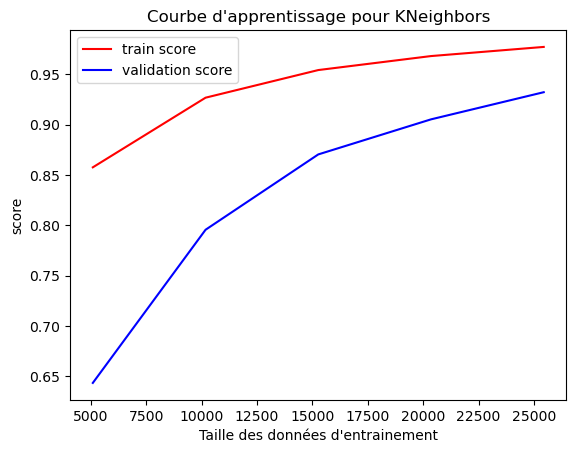

In [79]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(n_neighbors=3), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour KNeighbors')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [6]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [7]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [8]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [9]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [10]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

NameError: name 'data2' is not defined

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

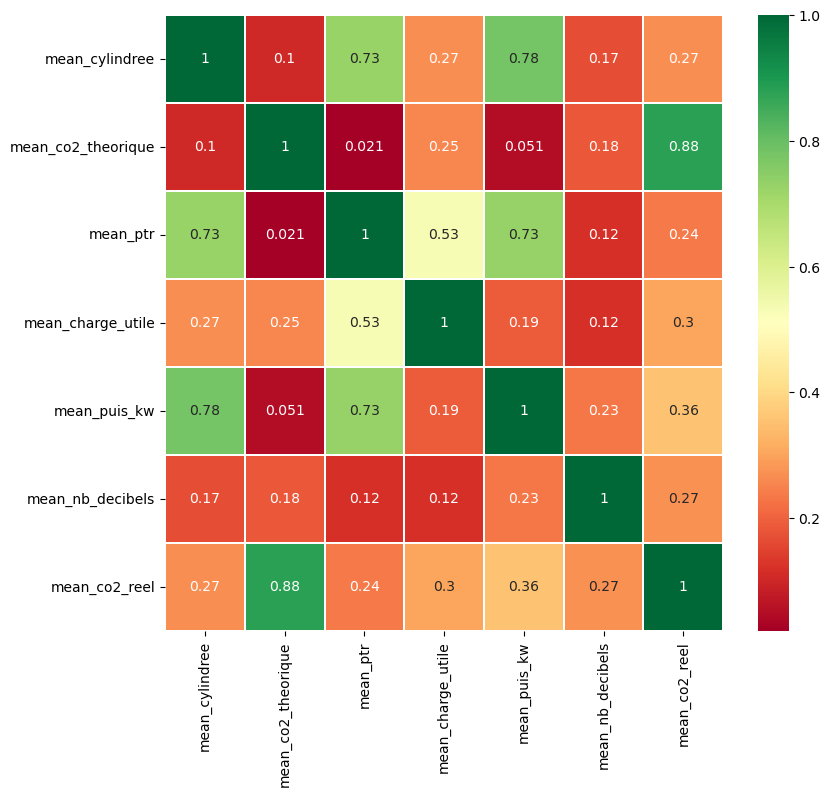

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


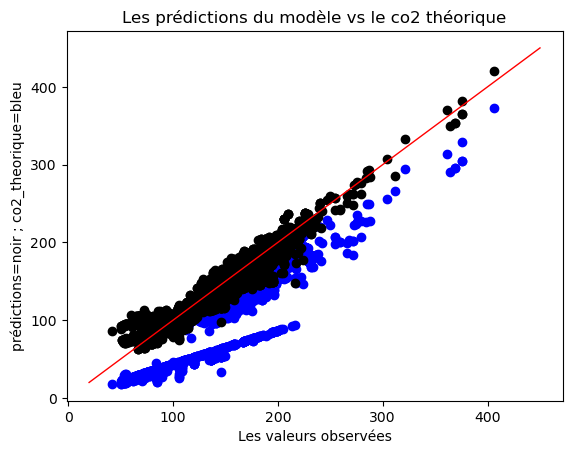

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


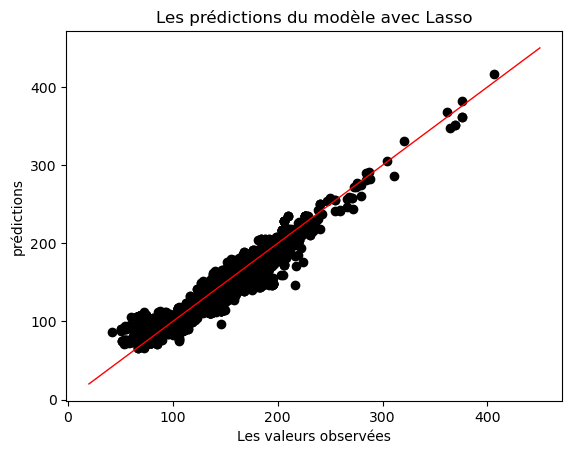

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


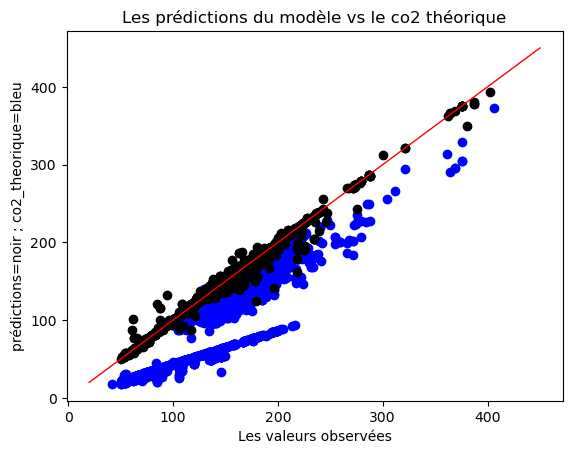

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

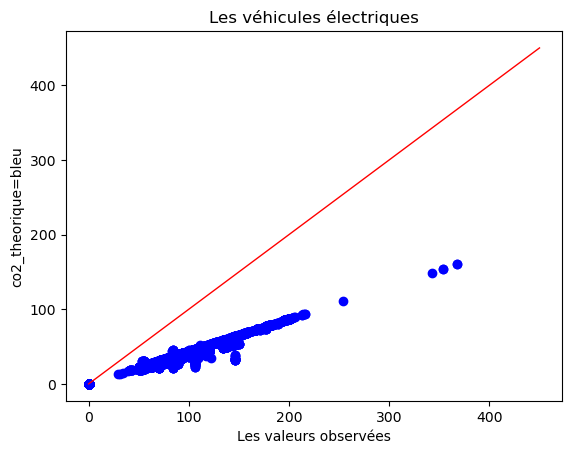

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

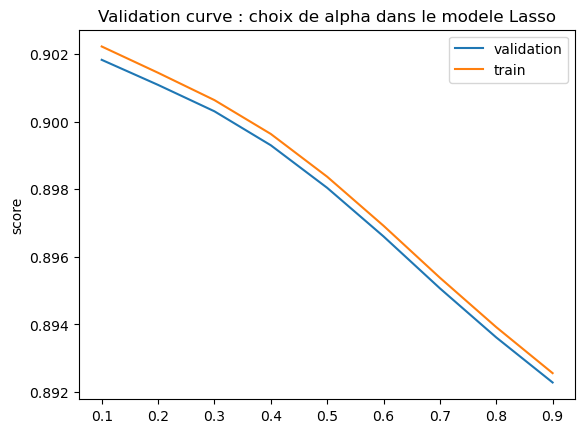

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


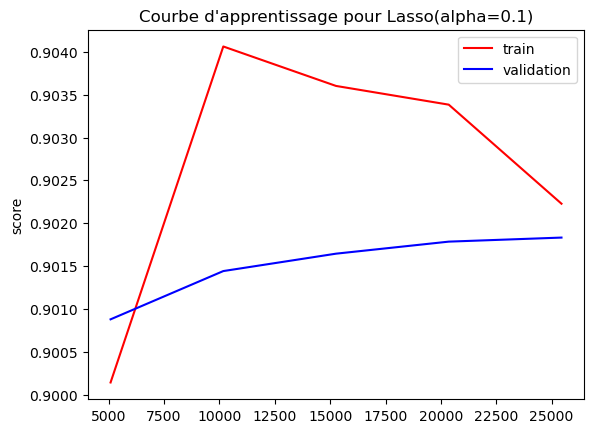

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

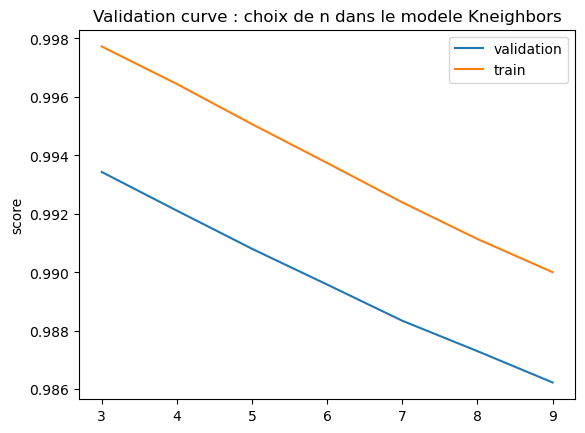

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


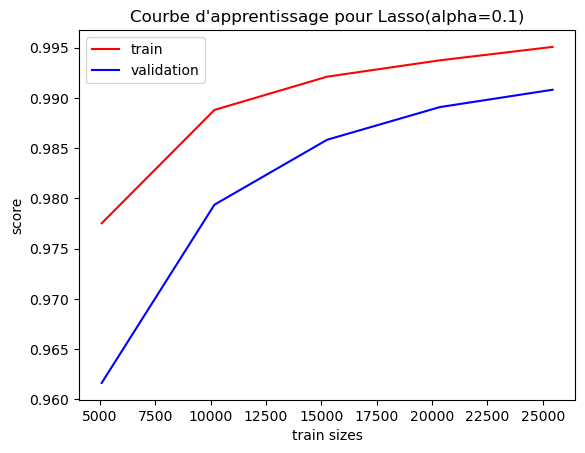

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

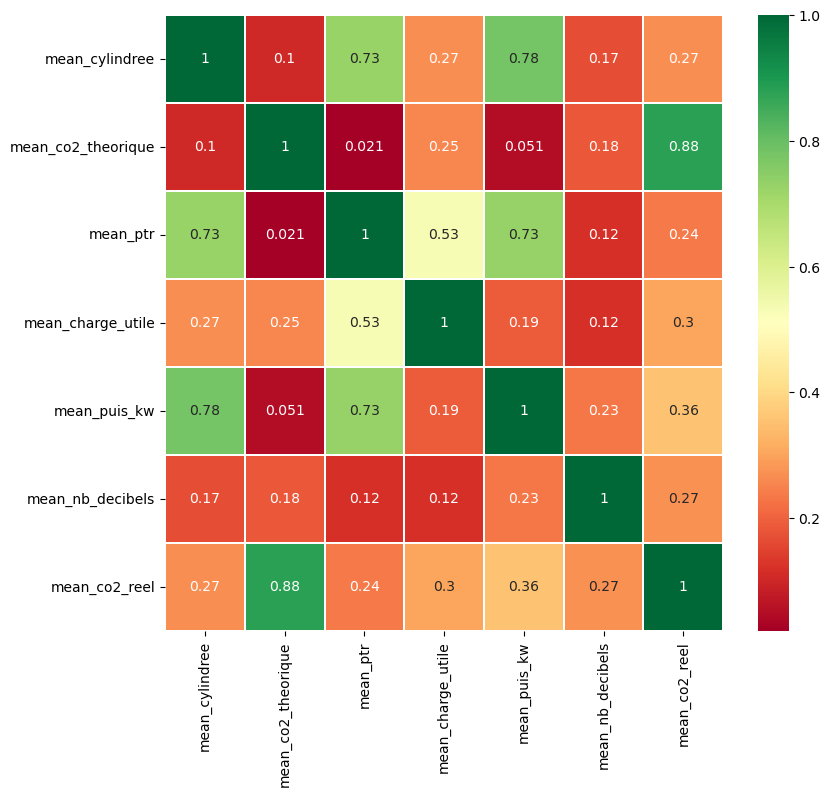

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


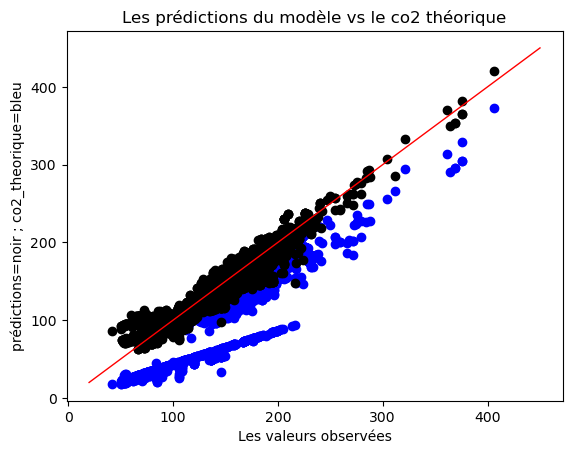

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


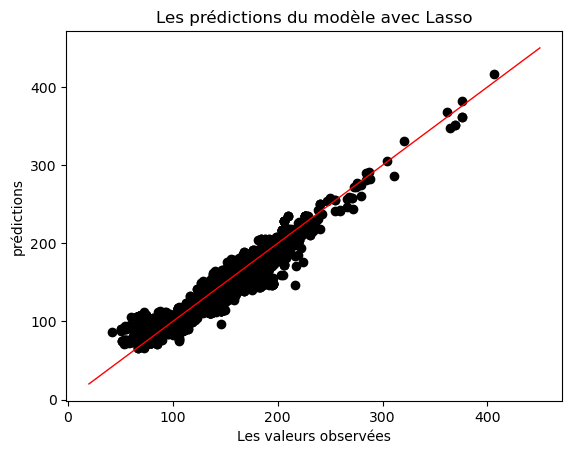

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


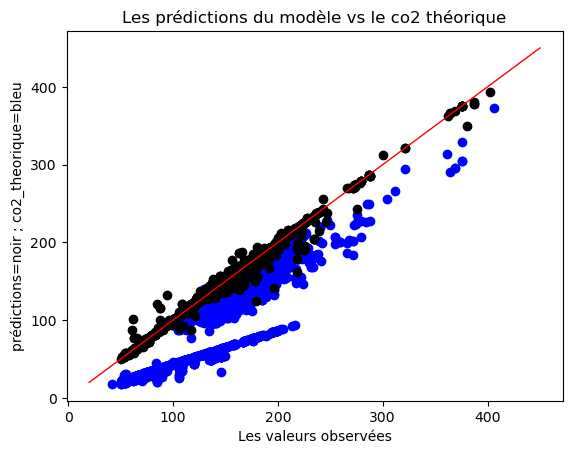

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

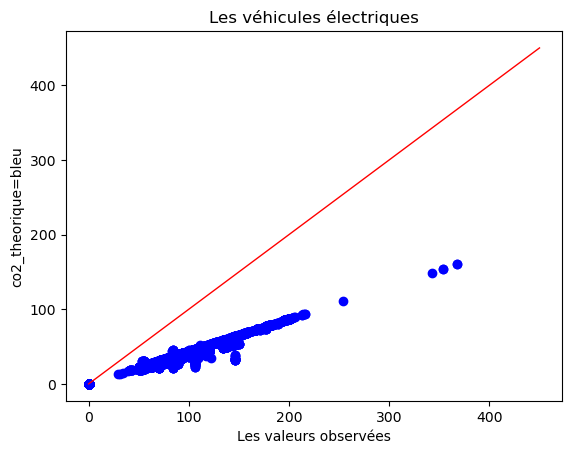

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

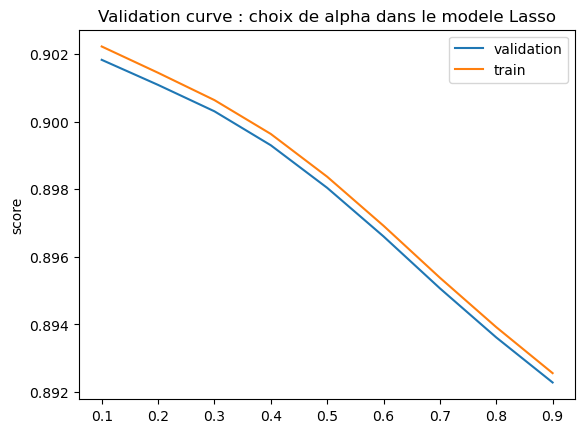

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


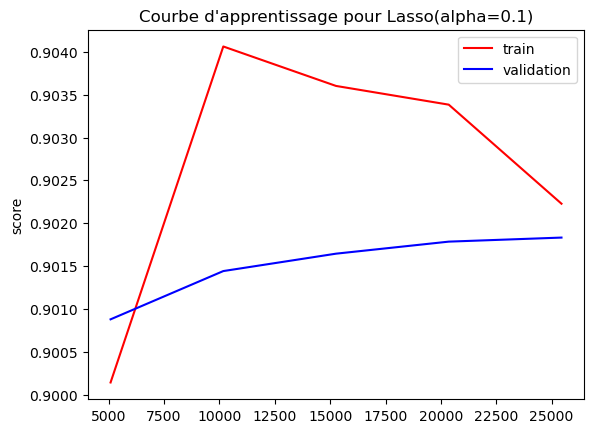

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

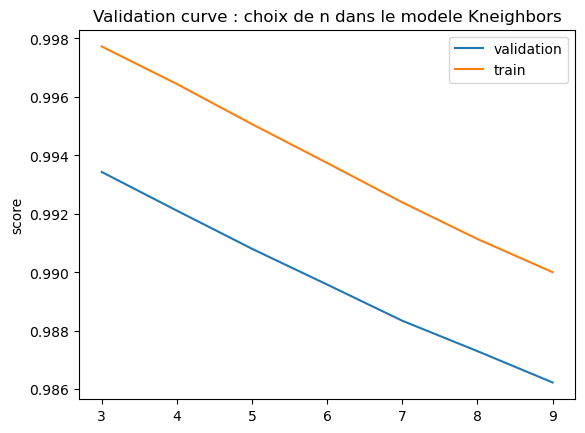

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


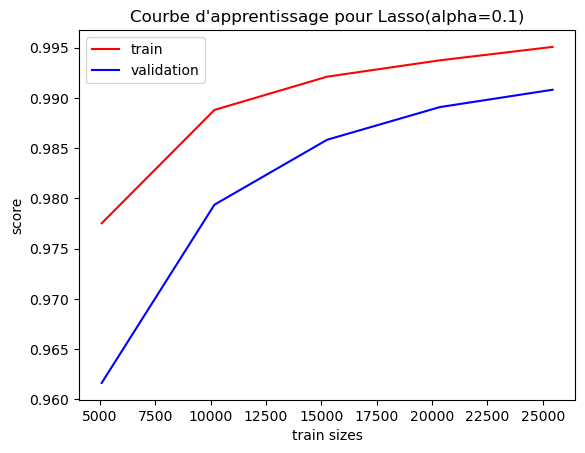

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>20]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0        368.000000     358.498030    ES         

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels              N  
count  39755.000000   39755.000000      39755.000000   39755.000000  
mean     112.186234     154.727231         74.127828     902.736184  
std       40.680494      29.675542          3.714219    2211.477666  
min       44.000000      31.824490         56.000000      21.000000  
25%       88.000000     142.388981         72.000000      67.000000  
50%      110.000000     155.821720         74.000000     192.000000  
75%      120.000000     168.940433         76.000000     692.000000  
max      478.000000     405.892593         96.000000  117339.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    3.975500e+04        3.975500e+04  39755.000000       3.975500e+04   
mean     1.315456e-16       -4.575498e-16      0.000000      -8.035719e-16   
std      1.000013e+00        1.000013e+00      1.000013       1.000013e+00   
min     -1.620963e+00       -3.451087e+00     -4.588311      -4.063646e+00   
25%     -6.370734e-01       -2.225849e-01     -0.732416      -5.687393e-01   
50%     -2.782389e-01        1.290973e-01     -0.108006      -1.938029e-01   
75%      7.295060e-01        5.063125e-01      0.503530       2.583263e-01   
max      7.244394e+00        7.175081e+00      4.230679       7.172594e+00   

       mean_puis_kw  mean_nb_decibels              N            ES  \
count  3.975500e+04      3.975500e+04   39755.000000  3.975500e+04   
mean  -1.086681e-16     -6.720263e-17     902.736184 -1.286859e-17   
std    1.000013e+00      1.000013e+00    2211.477666  1.000013e+00   
min   -1.676162e+00     -4.880718e+00      21.000000 -7.726806e-01   
25%   -5.945488e-01     -5.728943e-01      67.000000 -7.726806e-01   
50%   -5.374226e-02     -3.441635e-02     192.000000 -7.726806e-01   
75%    1.920789e-01      5.040616e-01     692.000000  1.294196e+00   
max    8.992476e+00      5.888841e+00  117339.000000  1.294196e+00   

                 GO            FE  ...       BERLINE  TS TERRAINS/CHEMINS  \
count  3.975500e+04  3.975500e+04  ...  3.975500e+04         3.975500e+04   
mean   1.143875e-17 -8.579060e-18  ... -1.215367e-17         4.289530e-18   
std    1.000013e+00  1.000013e+00  ...  1.000013e+00         1.000013e+00   
min   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
25%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01        -1.005777e+00   
50%   -7.025627e-01 -5.409631e-02  ... -6.593424e-01         9.942562e-01   
75%    1.423361e+00 -5.409631e-02  ...  1.516663e+00         9.942562e-01   
max    1.423361e+00  1.848555e+01  ...  1.516663e+00         9.942562e-01   

              BREAK       MINIBUS  MONOSPACE COMPACT    COMBISPACE  \
count  3.975500e+04  3.975500e+04       3.975500e+04  3.975500e+04   
mean   5.147436e-17 -1.072382e-17      -5.433404e-17  5.719373e-17   
std    1.000013e+00  1.000013e+00       1.000013e+00  1.000013e+00   
min   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
25%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
50%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
75%   -3.387802e-01 -1.225261e-01      -1.861177e-01 -1.569707e-01   
max    2.951766e+00  8.161528e+00       5.372943e+00  6.370614e+00   

              COUPE     MONOSPACE     MINISPACE     CABRIOLET  
count  3.975500e+04  3.975500e+04  3.975500e+04  3.975500e+04  
mean   2.287749e-17 -1.376224e-17 -1.000890e-17 -1.215367e-17  
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  
min   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
25%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
50%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
75%   -9.679262e-02 -6.215659e-02 -2.298945e-02 -7.217152e-02  
max    1.033137e+01  1.608840e+01  4.349822e+01  1.385588e+01  

[8 rows x 28 columns]

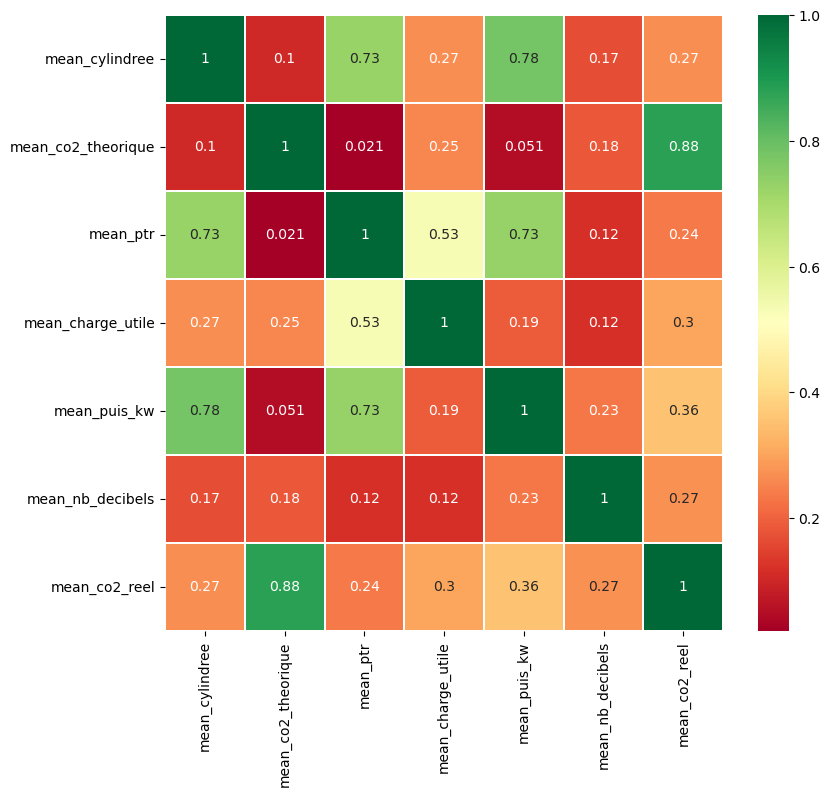

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.279
R2_score = 0.901


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.25
R2_score_model = 0.908


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.20472867e+00  2.49586223e+01  1.39213415e+00  1.13476404e+00
  1.02838668e+01  3.30581021e-01  4.76450931e-04  2.94835728e+00
 -1.70674378e+00  4.11615181e-01 -4.18012608e-01 -1.57728272e-01
 -1.79077604e+00 -1.83742975e-01  7.15290610e-01 -7.44273636e-01
  2.65876781e-01 -1.31647939e-01 -2.97729775e-01  4.07948295e-01
 -6.08567955e-01  1.86878742e-01 -2.37196725e-01  9.36647105e-01
  1.70530732e-01  7.62495821e-02  3.90871932e-02 -3.83795305e-01]
Le coefficient à l'origine est 154.3082052830484


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

27566    178.932000
9005     127.017805
6909     127.427411
930      170.290305
30432    234.805556
Name: mean_co2_reel, dtype: float64
[172.82812767 117.38942302 116.32128807 164.07597322 231.4097615 ]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 28.93
R2_score_th = 0.1


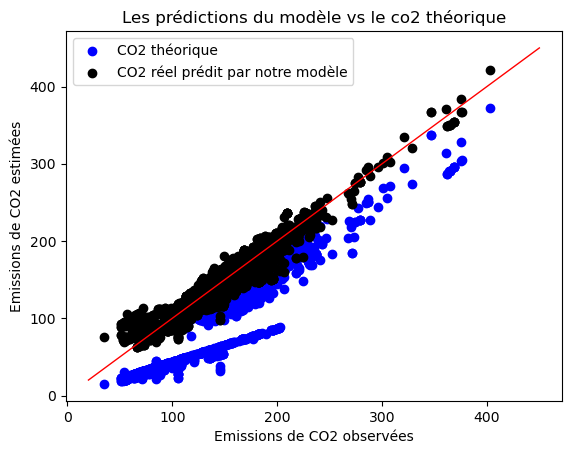

In [ ]:
plt.scatter(y_test, dataOG, color='blue', label = 'CO2 théorique')
plt.scatter(y_test, test_predictions, color='black', label='CO2 réel prédit par notre modèle')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Emissions de CO2 observées")
plt.ylabel("Emissions de CO2 estimées")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.legend()
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree         -1.204729
mean_co2_theorique     24.958622
mean_ptr                1.392134
mean_charge_utile       1.134764
mean_puis_kw           10.283867
mean_nb_decibels        0.330581
N                       0.000476
ES                      2.948357
GO                     -1.706744
FE                      0.411615
EE                     -0.418013
EH                     -0.157728
GH                     -1.790776
GN                     -0.183743
GL                      0.715291
EG                     -0.744274
FH                      0.265877
EN                     -0.131648
BERLINE                -0.297730
TS TERRAINS/CHEMINS     0.407948
BREAK                  -0.608568
MINIBUS                 0.186879
MONOSPACE COMPACT      -0.237197
COMBISPACE              0.936647
COUPE                   0.170531
MONOSPACE               0.076250
MINISPACE               0.039087
CABRIOLET              -0.383795
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_cylindree         -0.042848
mean_co2_theorique     24.744910
mean_ptr                0.725703
mean_charge_utile       1.354130
mean_puis_kw            9.529319
mean_nb_decibels        0.256252
N                       0.000435
ES                      3.476877
GO                     -1.214472
FE                      0.290415
GH                     -1.273766
GN                     -0.020057
GL                      0.665177
EG                     -0.458226
FH                      0.211811
TS TERRAINS/CHEMINS     0.697134
BREAK                  -0.347881
MINIBUS                 0.004566
COMBISPACE              0.796919
COUPE                   0.015199
CABRIOLET              -0.111195
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS',
       'BREAK', 'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPA

21

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.284
R2_score_model = 0.907


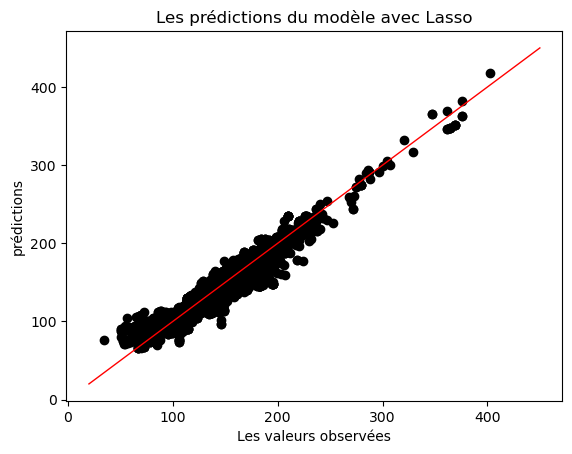

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
14603          1499.0          130.418919    3145.0         555.000000   
40831          1968.0          154.363636    4140.0         596.000000   
30123          1498.0          147.883739    3370.0         591.000000   
5109            999.0          114.365120    2503.0         513.000000   
26805          1199.0          135.001387    2940.0         519.985437   
...               ...                 ...       ...                ...   
11334          1950.0          167.070539    5100.0         740.000000   
2512           1499.0          105.068966    2275.0         585.000000   
5174           1968.0          150.061584    3900.0         755.000000   
5407           1998.0          145.824635    3265.0         574.000000   
19404          1498.0          122.480392    3200.0         569.000000   

       mean_puis_kw  mean_nb_decibels     N  ES  GO  FE  ...  BERLINE  \
14603         100.0          75.00000    74   1   0   0  ...        1   
40831         110.0          77.00000   517   0   1   0  ...        0   
30123         110.0          80.00000  2589   1   0   0  ...        0   
5109           74.0          73.00000  3125   1   0   0  ...        1   
26805          96.0          76.00000  1442   1   0   0  ...        0   
...             ...               ...   ...  ..  ..  ..  ...      ...   
11334         143.0          76.00000   241   0   1   0  ...        0   
2512           75.0          74.00000  1566   0   1   0  ...        1   
5174           85.0          79.00000   341   0   1   0  ...        0   
5407          132.0          74.80167   479   0   0   0  ...        0   
19404          96.0          78.00000   102   1   0   0  ...        1   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
14603                    0      0        0                  0           0   
40831                    1      0        0                  0           0   
30123                    1      0        0                  0           0   
5109                     0      0        0                  0           0   
26805                    1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
11334                    1      0        0                  0           0   
2512                     0      0        0                  0           0   
5174                     0      0        0                  1           0   
5407                     1      0        0                  0           0   
19404                    0      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
14603      0          0          0          0  
40831      0          0          0          0  
30123      0          0          0          0  
5109       0          0          0          0  
26805      0          0          0          0  
...      ...        ...        ...        ...  
11334      0          0          0          0  
2512       0          0          0          0  
5174       0          0          0          0  
5407       0          0          0          0  
19404      0          0          0          0  

[31804 rows x 28 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 5.65
R2_score_model = 0.965


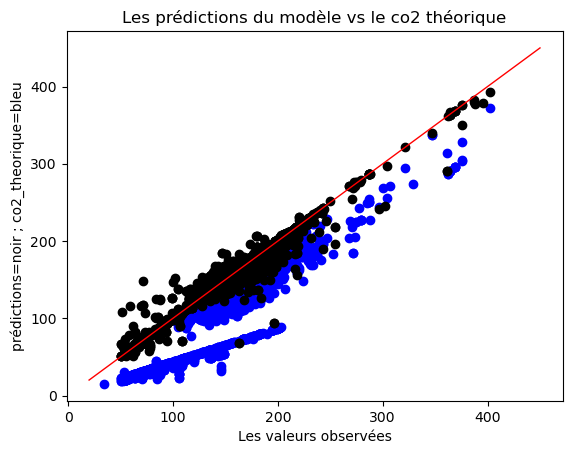

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

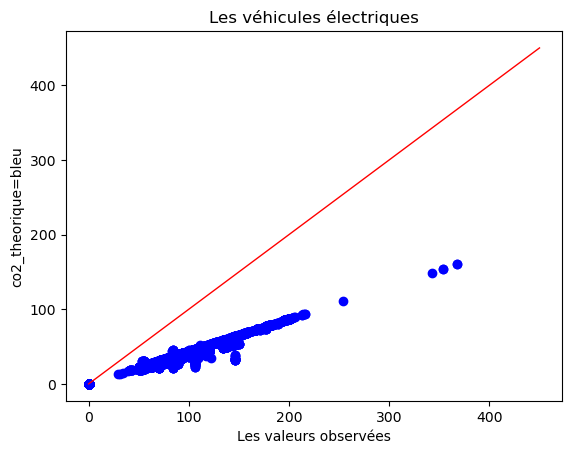

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51260200 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-86.27911882979427

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.2280697006643

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-91.44779869887326

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

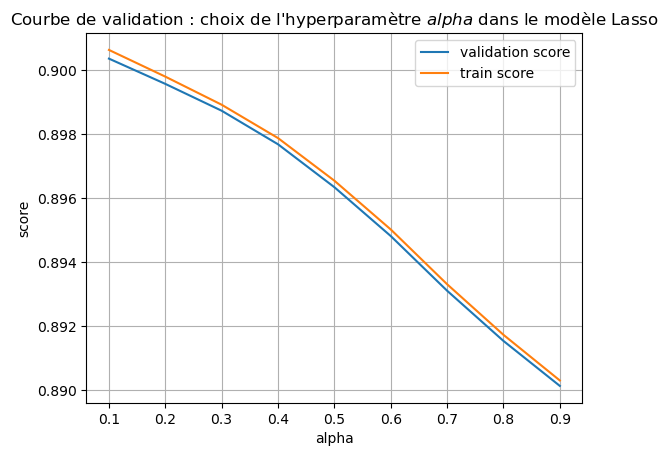

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation score')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('alpha')
plt.title('Courbe de validation : choix de l\'hyperparamètre $\t{alpha}$ dans le modèle Lasso')
plt.grid()
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90035332, 0.899564  , 0.89872492, 0.89767592, 0.89633477,
       0.89480835, 0.89309958, 0.89152996, 0.89012454])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9003533169927239
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.612095
mean_co2_theorique     24.977455
mean_ptr                1.028400
mean_charge_utile       1.246645
mean_puis_kw            9.862987
mean_nb_decibels        0.286573
N                       0.000457
ES                      3.333997
GO                     -1.323758
FE                      0.365775
GH                     -1.449686
GN                     -0.099120
GL                      0.754522
EG                     -0.581055
FH                      0.252985
EN                     -0.048709
TS TERRAINS/CHEMINS     0.697397
BREAK                  -0.381756
MINIBUS                 0.117264
MONOSPACE COMPACT      -0.046311
COMBISPACE              0.906369
COUPE                   0.126836
MONOSPACE               0.008508
CABRIOLET              -0.226072
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'N', 'ES', 'GO', 'FE', 'EE', 'EH',
       'GH', 'GN', 'GL', 'EG', 'FH'

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


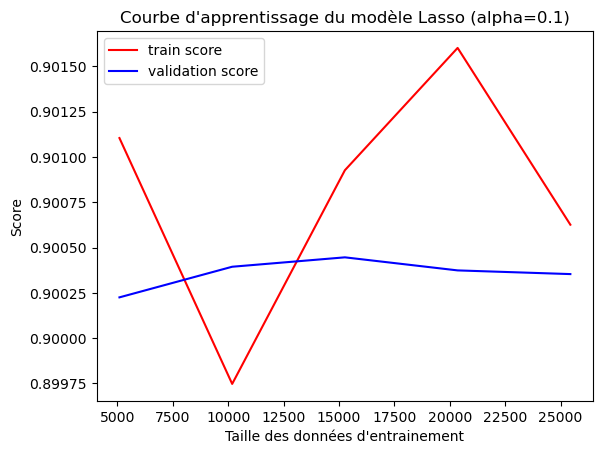

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du modèle Lasso (alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

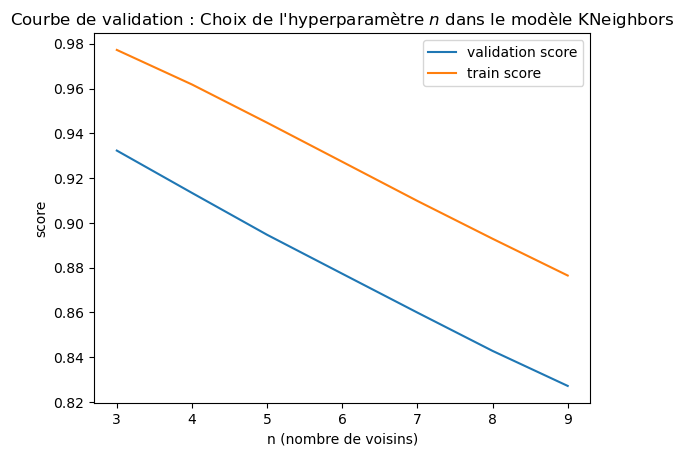

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation score')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train score')

plt.ylabel('score')
plt.xlabel('n (nombre de voisins)')
plt.title('Courbe de validation : Choix de l\'hyperparamètre $\t n$ dans le modèle KNeighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.86037971 0.85699044 0.85699044 0.85699044 0.85699044]
 [0.92429272 0.92706257 0.92759356 0.92759356 0.92759356]
 [0.95457997 0.95689504 0.95396898 0.95294864 0.95294864]
 [0.9680447  0.96908012 0.96822308 0.96709508 0.96836349]
 [0.97691937 0.97835411 0.97744336 0.97627903 0.97722974]]
[[0.654713   0.64426468 0.65013769 0.63515611 0.63353993]
 [0.79168495 0.80857926 0.80300246 0.79327236 0.78180878]
 [0.87336193 0.87681221 0.87730763 0.86568522 0.85928914]
 [0.90706058 0.91139858 0.91616786 0.89897444 0.89294444]
 [0.92506173 0.93393259 0.93670103 0.93736545 0.92833253]]


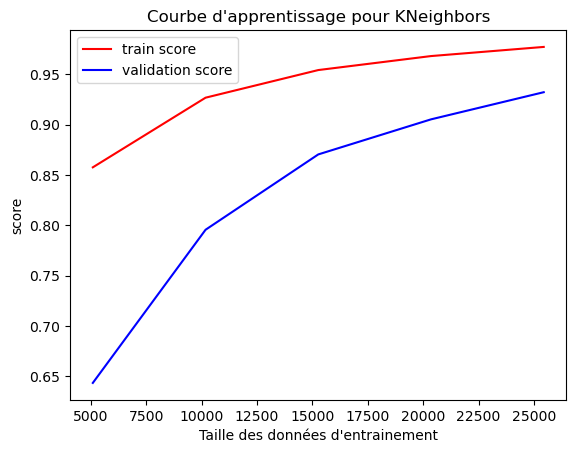

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(n_neighbors=3), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train score')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation score')
plt.xlabel('Taille des données d\'entrainement')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour KNeighbors')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.describe()

Puissance fiscale     Cylindrée  Poids à vide  Puissance KW  \
count       59836.000000  59836.000000  59836.000000  59836.000000   
mean            9.128351   3933.219734   1497.845797    140.368825   
std             6.248502  14616.825182    307.582046    141.592042   
min             1.000000    647.000000      0.132000     28.000000   
25%             6.000000   1353.000000   1289.000000     90.000000   
50%             8.000000   1598.000000   1450.000000    110.000000   
75%            10.000000   1988.000000   1655.000000    139.000000   
max            87.000000  99999.000000   2710.000000    999.000000   

       Rapport poid puissance  Consommation extra-urbaine  Consommation mixte  \
count             59836.00000                59836.000000        59836.000000   
mean               2261.24942                 9768.395433         9768.396001   
std               14866.20294                 1500.881968         1500.878273   
min                   0.02000                    0.000000            0.000000   
25%                   0.07000                 9999.000000         9999.000000   
50%                   0.07000                 9999.000000         9999.000000   
75%                   0.09000                 9999.000000         9999.000000   
max               99999.00000                 9999.000000         9999.000000   

       Consommation urbaine  Prix du véhicule       CO2_PRF        VOLUME  \
count          59836.000000      5.926100e+04  59836.000000  59836.000000   
mean            9768.396995      4.227245e+04    133.960609     27.725834   
std             1500.871811      2.547091e+04     44.099858    155.817561   
min                0.000000      8.890000e+03      0.000000      1.000000   
25%             9999.000000      2.930000e+04    124.000000      1.000000   
50%             9999.000000      3.772700e+04    138.000000      2.000000   
75%             9999.000000      4.808800e+04    153.000000      9.000000   
max             9999.000000      1.586530e+06    499.000000   8355.000000   

            JO  
count  59836.0  
mean     254.0  
std        0.0  
min      254.0  
25%      254.0  
50%      254.0  
75%      254.0  
max      254.0

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

NameError: name 'data2' is not defined

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

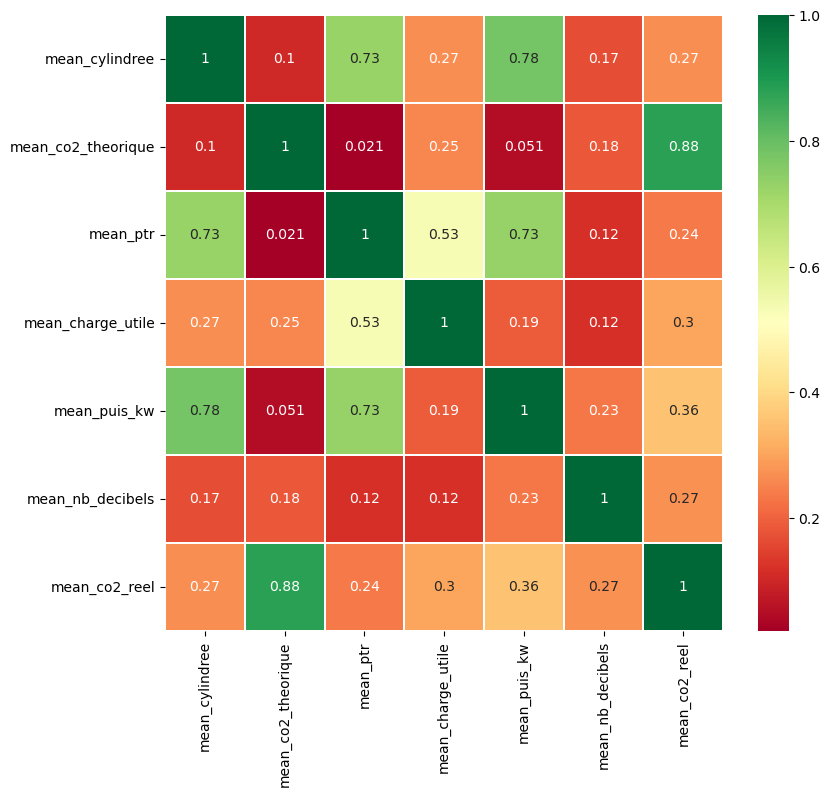

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


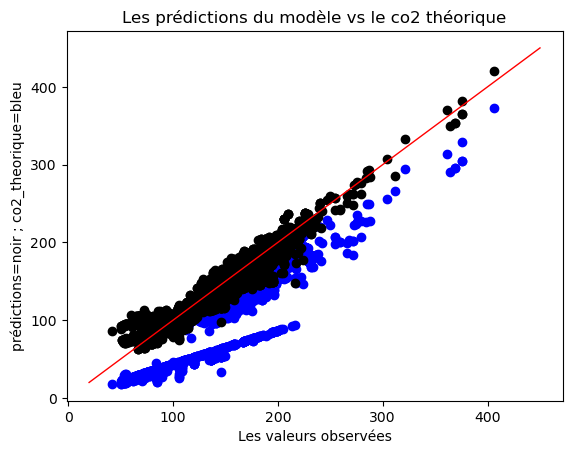

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


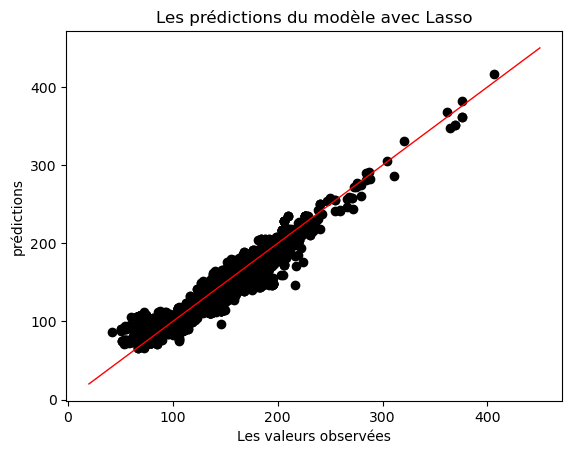

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


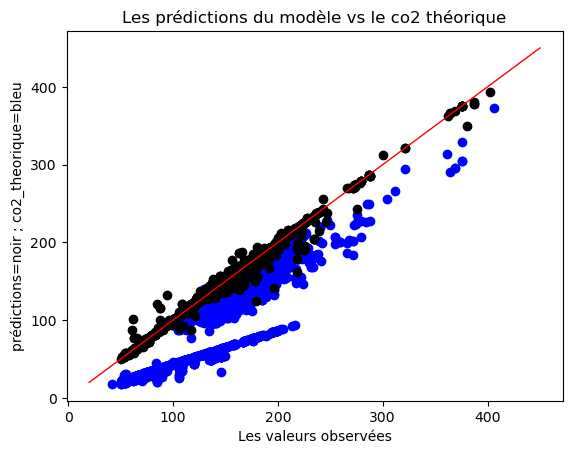

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

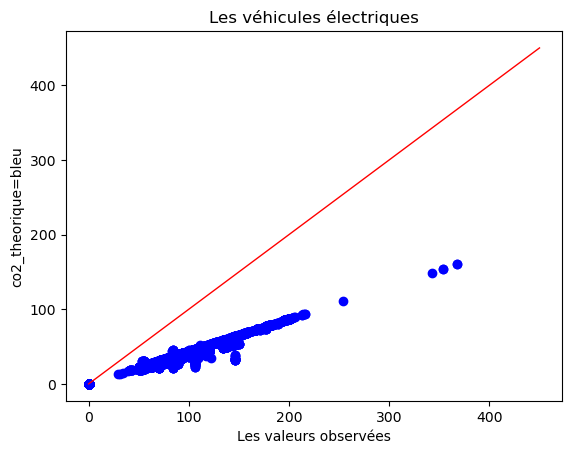

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

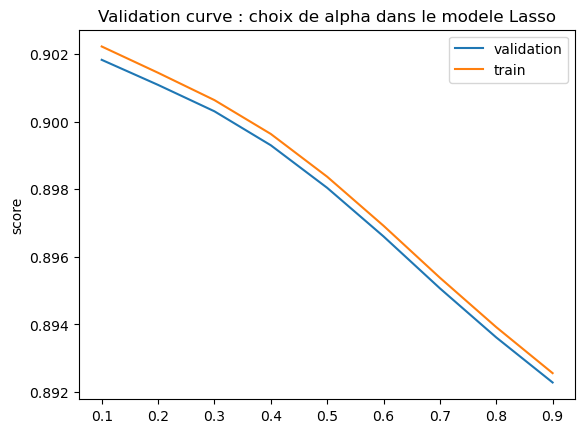

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


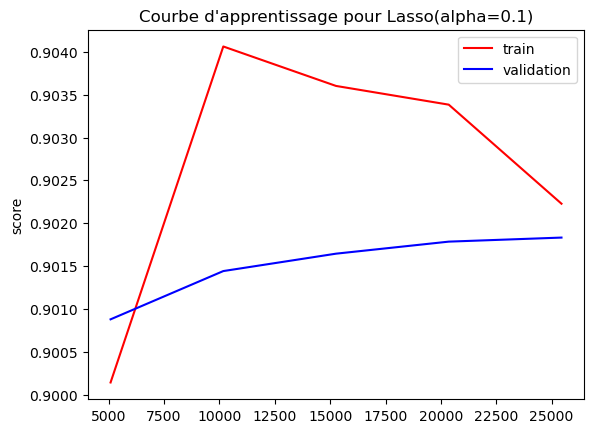

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

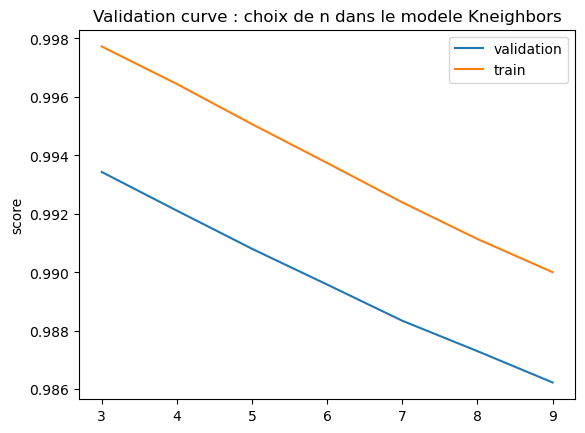

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


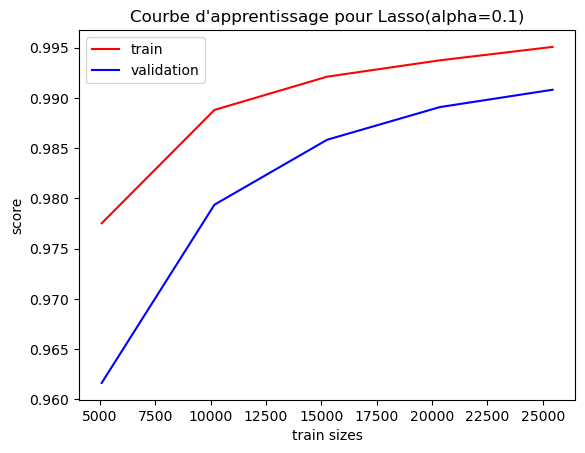

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]

In [ ]:
import numpy as np
np.float=float
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
np.bool = bool
from sklearn.linear_model import Lasso

Base rsvero 2021

In [ ]:
data = pd.read_excel('data_BLP_caracteristics_CO2_corr.xlsx')

In [ ]:
columns=list(data.columns.values)
print(columns)

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']


Base ADEME 2021

In [ ]:
data2=pd.read_excel('ventes 2021_IPP.xlsx')

In [ ]:
data2.columns

Index(['DATE', 'Genre', 'Marque', 'Type', 'Puissance fiscale', 'Modèle',
       'Version', 'Carrosserie', 'Energie', 'Cylindrée', 'Gamme',
       'Poids à vide', 'Puissance KW', 'Rapport poid puissance',
       'Type de boite', 'Groupe', 'MF/ME', 'Consommation extra-urbaine',
       'Consommation mixte', 'Consommation urbaine', 'BONUS_MALUS',
       'Prix du véhicule', 'CO2_PRF', 'DATE_ARRETE', 'VOLUME', 'JO'],
      dtype='object')

In [ ]:
data.rename(columns={'type_cnit': 'Type'}, inplace=True) #renomme le cnit

In [ ]:
new_data = pd.merge(data, data2, on='Type', how='inner') #fusionne les 2 par le cnit

In [ ]:
datap=new_data.loc[new_data['N']>50]
datap = datap[['mean_cylindree','mean_co2_theorique','mean_ptr', 'mean_charge_utile','mean_puis_kw', 'mean_co2_reel', 'energ', 'mean_nb_decibels','Carrosserie', 'N']]
print(datap)

NameError: name 'new_data' is not defined

In [ ]:
datap = datap.loc[-datap['energ'].isin(['EL'])]
print(datap)

       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
6              1560.0           79.000000    2045.0         555.000000   
7              1560.0          100.000000    3160.0         569.984985   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.0         530.000000   
54202           999.0          126.750000    2690.0         499.750000   
54203           999.0          126.750000    2690.0         499.750000   
54204           999.0          126.750000    2690.0         499.750000   
54529          2894.0           76.782609       NaN         595.000000   

       mean_puis_kw  mean_co2_reel energ  mean_nb_decibels  \
0             368.0     358.498030    ES         

In [ ]:
datap.dropna(inplace=True)
datap.describe()

mean_cylindree  mean_co2_theorique      mean_ptr  mean_charge_utile  \
count    39755.000000        39755.000000  39755.000000       39755.000000   
mean      1628.491150          130.483087   3563.892005         592.574447   
std        465.401438           33.800310    776.742709          90.683188   
min        874.102052           13.836735      0.000000         224.074713   
25%       1332.000000          122.959743   2995.000000         541.000000   
50%       1499.000000          134.846561   3480.000000         575.000000   
75%       1968.000000          147.596392   3955.000000         616.000000   
max       5000.000000          373.000000   6850.000000        1243.000000   

       mean_puis_kw  mean_co2_reel  mean_nb_decibels  
count  39755.000000   39755.000000      39755.000000  
mean     112.186234     154.727231         74.127828  
std       40.680494      29.675542          3.714219  
min       44.000000      31.824490         56.000000  
25%       88.000000     142.388981         72.000000  
50%      110.000000     155.821720         74.000000  
75%      120.000000     168.940433         76.000000  
max      478.000000     405.892593         96.000000

In [ ]:
y=datap['mean_co2_reel']
dataOG=new_data['mean_co2_theorique']
dataEtat=datap['mean_co2_theorique']

In [ ]:
datas = datap[['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile', 'mean_puis_kw', 'mean_nb_decibels','mean_co2_reel']]

In [ ]:
for col in list(datap['energ'].unique()): # quoi ??
    datap[col]=(datap['energ']==col)*1

In [ ]:
for col in list(datap['Carrosserie'].unique()):
    datap[col]=(datap['Carrosserie']==col)*1

In [ ]:
datap=datap.drop('energ', axis=1)
datap=datap.drop('Carrosserie', axis=1)
datap=datap.drop('mean_co2_reel', axis=1)
dataknn = datap.copy()

In [ ]:
def normalization(dataToNormalize):
    columns=list(dataToNormalize.columns) # liste colonnes
    scaler=preprocessing.StandardScaler()
    for col in columns:
        if col!='N':
            dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))

        
normalization(datap)
datap.describe()

NameError: name 'datap' is not defined

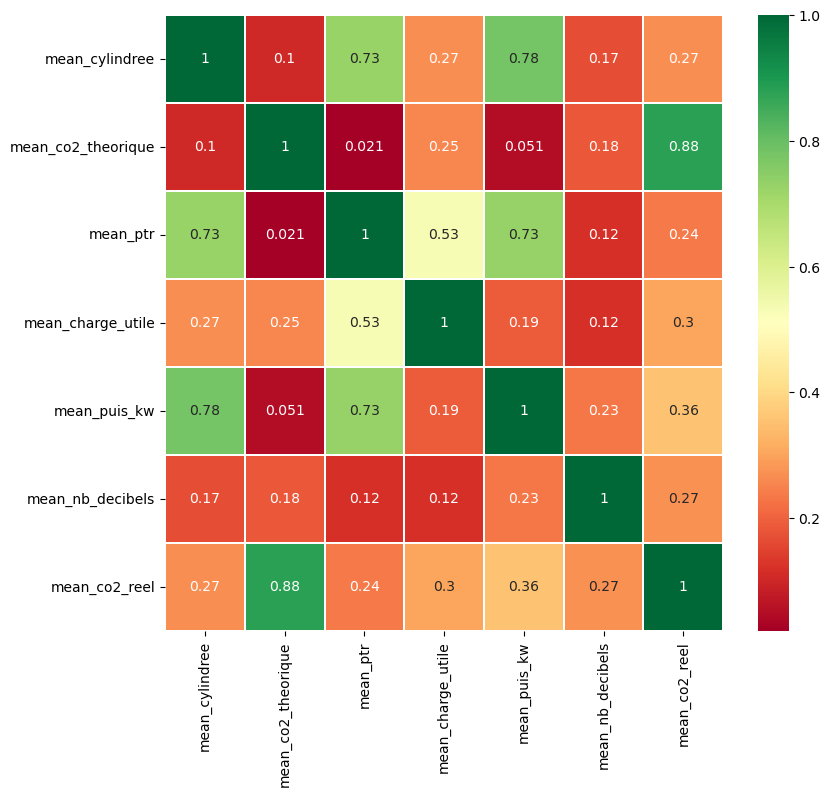

In [ ]:
sns.heatmap(datas.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datap, y, test_size=0.2)

# MODELE REGRESSION LINEAIRE

MODELE

In [ ]:
regression_alg=LinearRegression()

In [ ]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [ ]:
train_predictions=regression_alg.predict(x_train)

print(f"RMSE = {round(sqrt(mean_squared_error(y_train,train_predictions)),3)}")

print(f"R2_score = {round(r2_score(y_train, train_predictions),3)}")

RMSE = 9.285
R2_score = 0.903


In [ ]:
test_predictions = regression_alg.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions)),2)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions),3)}")

RMSE_model = 9.45
R2_score_model = 0.897


In [ ]:
print(f"Les coefficients sont {regression_alg.coef_}")
print(f"Le coefficient à l'origine est {regression_alg.intercept_}")

Les coefficients sont [-1.12878815e+00  2.45774621e+01  1.04468414e+00  1.16786928e+00
  1.03152963e+01  4.45831572e-01 -1.38036847e+12 -1.34202919e+12
 -1.53889193e+11 -7.93826451e+11 -8.57491888e+11 -8.12885945e+11
 -2.02356768e+10 -2.38169670e+11 -1.97280683e+11 -2.33892068e+11
 -1.43089643e+10 -1.25193589e+11 -1.36208682e+11 -8.27892509e+10
 -3.28850911e+10 -4.90050174e+10 -4.17339456e+10 -2.61236799e+10
 -1.68676472e+10 -6.25951989e+09 -1.95592229e+10]
Le coefficient à l'origine est 154.72184090216763


In [ ]:
print(y_test.head(5))
print(regression_alg.predict(x_test.head(5)))

39607    164.490205
41421    165.361328
50889    105.125000
42904    164.462069
28678    189.500000
Name: mean_co2_reel, dtype: float64
[166.50979762 156.63092188  95.67743067 163.04812769 184.01510577]


In [ ]:
dataOG = dataOG.iloc[list(y_test.index)]

In [ ]:
print(f"RMSE_th = {round(sqrt(mean_squared_error(y_test,dataOG)),2)}")

print(f"R2_score_th = {round(r2_score(y_test, dataOG),2)}")

RMSE_th = 29.32
R2_score_th = 0.01


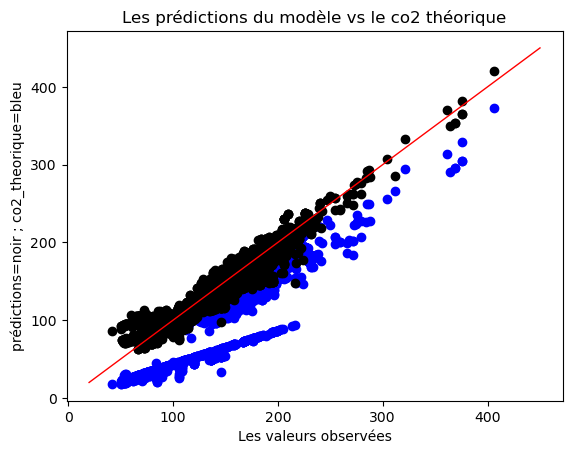

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(y_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
coefficients = pd.Series(regression_alg.coef_, index=x_train.columns) #recuperer les coefficients
print(coefficients)

mean_cylindree        -1.128788e+00
mean_co2_theorique     2.457746e+01
mean_ptr               1.044684e+00
mean_charge_utile      1.167869e+00
mean_puis_kw           1.031530e+01
mean_nb_decibels       4.458316e-01
ES                    -1.380368e+12
GO                    -1.342029e+12
FE                    -1.538892e+11
EE                    -7.938265e+11
EH                    -8.574919e+11
GH                    -8.128859e+11
GN                    -2.023568e+10
GL                    -2.381697e+11
EG                    -1.972807e+11
FH                    -2.338921e+11
EN                    -1.430896e+10
BERLINE               -1.251936e+11
TS TERRAINS/CHEMINS   -1.362087e+11
BREAK                 -8.278925e+10
MINIBUS               -3.288509e+10
MONOSPACE COMPACT     -4.900502e+10
COMBISPACE            -4.173395e+10
COUPE                 -2.612368e+10
MONOSPACE             -1.686765e+10
MINISPACE             -6.259520e+09
CABRIOLET             -1.955922e+10
dtype: float64


**Régularisation Lasso**

In [ ]:
lasso_model = Lasso(alpha=0.2)

In [ ]:
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.2)

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)
variables_retenues = coefficients[coefficients != 0]
print(variables_retenues)

print(x_train.columns)

len(variables_retenues)

mean_co2_theorique     24.584558
mean_ptr                0.362731
mean_charge_utile       1.396495
mean_puis_kw            9.523348
mean_nb_decibels        0.356249
ES                      3.552733
GO                     -1.124723
FE                      0.292534
GH                     -1.175129
GN                     -0.023670
GL                      0.682752
EG                     -0.427121
FH                      0.228830
TS TERRAINS/CHEMINS     0.825831
BREAK                  -0.336936
MINIBUS                 0.054411
COMBISPACE              0.788260
CABRIOLET              -0.103706
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMINS', 'BREAK',
       'MINIBUS', 'MONOSPACE COMPACT', 'COMBISPACE', 'COUPE', 'MONOSPACE',
       'MINISPACE', 'CABRIOLET'],
      dtype='object')


18

In [ ]:
test_predictions_lasso = lasso_model.predict(x_test)

print(f"RMSE_model = {round(sqrt(mean_squared_error(y_test,test_predictions_lasso)),3)}")

print(f"R2_score_model = {round(r2_score(y_test, test_predictions_lasso),3)}")

RMSE_model = 9.494
R2_score_model = 0.896


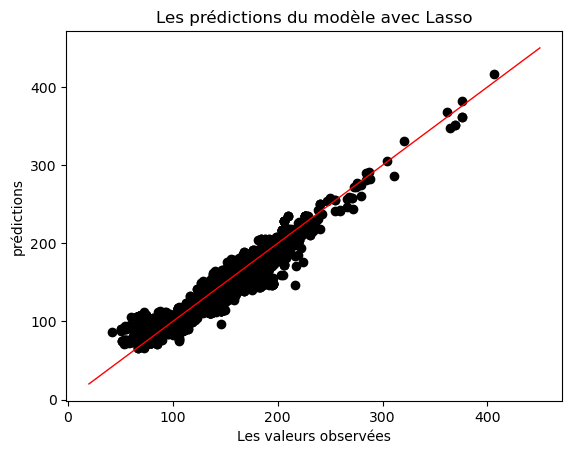

In [ ]:
plt.scatter(y_test, test_predictions_lasso, color='black')
plt.title("Les prédictions du modèle avec Lasso")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

**Avec KNN**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dataknn, y, test_size=0.2)

In [ ]:
X_train

mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
34457          1969.0          171.633333    4700.0         606.000000   
44140          1798.0           99.000000    2515.0         415.000000   
2526            999.0          147.168731    2840.0         520.000000   
993            1950.0          160.174254    5130.0         730.047096   
6051           1499.0          134.317333    3585.0         584.000000   
...               ...                 ...       ...                ...   
43920          1995.0          146.622222    3990.0         580.000000   
23715          1499.0          117.732494    2930.0         525.000000   
34864          1997.0          161.114286    3965.0         580.000000   
49463          1968.0          139.103448    3875.0         625.000000   
19849          1598.0          164.557895    3600.0         622.000000   

       mean_puis_kw  mean_nb_decibels  ES  GO  FE  EE  ...  BERLINE  \
34457         145.0         72.000000   0   0   0   0  ...        0   
44140          72.0         70.983051   0   0   0   0  ...        1   
2526           88.0         69.000000   1   0   0   0  ...        0   
993           180.0         79.000000   0   1   0   0  ...        0   
6051           88.0         72.000000   0   1   0   0  ...        0   
...             ...               ...  ..  ..  ..  ..  ...      ...   
43920         110.0         74.000000   0   1   0   0  ...        0   
23715          81.0         76.000000   0   1   0   0  ...        0   
34864         130.0         75.000000   0   1   0   0  ...        0   
49463         150.0         72.000000   0   0   0   0  ...        0   
19849         133.0         76.000000   1   0   0   0  ...        0   

       TS TERRAINS/CHEMINS  BREAK  MINIBUS  MONOSPACE COMPACT  COMBISPACE  \
34457                    1      0        0                  0           0   
44140                    0      0        0                  0           0   
2526                     1      0        0                  0           0   
993                      1      0        0                  0           0   
6051                     1      0        0                  0           0   
...                    ...    ...      ...                ...         ...   
43920                    1      0        0                  0           0   
23715                    1      0        0                  0           0   
34864                    1      0        0                  0           0   
49463                    0      1        0                  0           0   
19849                    1      0        0                  0           0   

       COUPE  MONOSPACE  MINISPACE  CABRIOLET  
34457      0          0          0          0  
44140      0          0          0          0  
2526       0          0          0          0  
993        0          0          0          0  
6051       0          0          0          0  
...      ...        ...        ...        ...  
43920      0          0          0          0  
23715      0          0          0          0  
34864      0          0          0          0  
49463      0          0          0          0  
19849      0          0          0          0  

[31804 rows x 27 columns]

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(f"RMSE_model = {round(sqrt(mean_squared_error(Y_test,y_pred)),2)}")

print(f"R2_score_model = {round(r2_score(Y_test, y_pred),3)}")

RMSE_model = 2.8
R2_score_model = 0.991


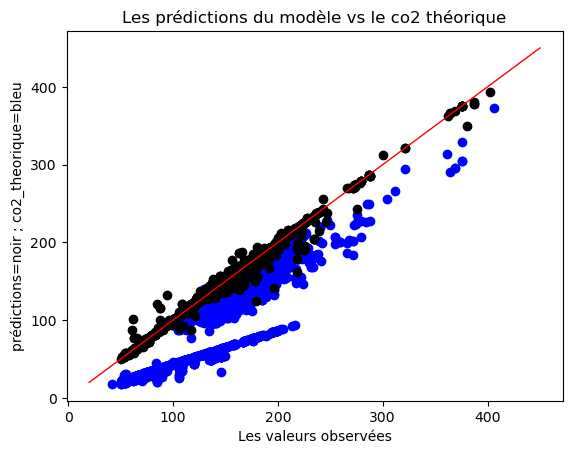

In [ ]:
plt.scatter(y_test, dataOG, color='blue')
plt.scatter(Y_test, y_pred, color='black')
plt.title("Les prédictions du modèle vs le co2 théorique")
plt.xlabel("Les valeurs observées")
plt.ylabel("prédictions=noir ; co2_theorique=bleu")
plt.plot([20.0,450.0],[20.0,450.0], color='red', lw=1)
plt.show()

In [ ]:
dataHyb = new_data.loc[new_data['N']>20]
dataHyb = dataHyb.loc[dataHyb['energ'].isin(['GL','EL','EE'])]

Les véhicules EE, EL et GL

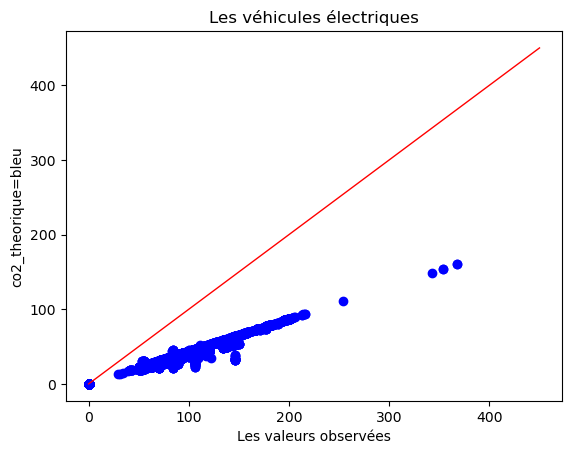

In [ ]:
plt.scatter(dataHyb['mean_co2_reel'], dataHyb['mean_co2_theorique'], color='blue')
plt.title('Les véhicules électriques')
plt.xlabel("Les valeurs observées")
plt.ylabel("co2_theorique=bleu")
plt.plot([0.0,450.0],[0.0,450.0], color='red', lw=1)
plt.show()

**Calcul du gain en taxe**

In [ ]:
def taxe(g):
    if g<=135.0:
        return 0
    elif g<=140.:
        return 100
    elif g<=145.:
        return 300
    elif g<=150.:
        return 400
    elif g<=155.:
        return 1000
    elif g<=175.:
        return 1500
    elif g<=180.:
        return 2000
    elif g<=185.:
        return 2600
    elif g<=190.:
        return 3000
    elif g<=200.:
        return 5000
    else:
        return 6000

In [ ]:
print(f"La taxe carbone perçue par l'État sur les nouveaux véhicules est de {dataEtat.apply(taxe).sum()} euros")

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros


In [ ]:
print(f"La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de {y.apply(taxe).sum()} euros")

La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros


In [ ]:
vf = np.vectorize(taxe)
print(f"La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de {vf(np.concatenate((train_predictions,test_predictions), axis=0)).sum()} euros")

La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51241900 euros


# MODELE SELECTION
## cross validation

In [ ]:
#cross validation avec KFold de linear regression
from sklearn.model_selection import cross_val_score

# on coupe le x_train en cv = 5, on entraine sur les donnees 4/5, on le valide sur le 1/5
# on fait la moyenne des 5 scores qu'on obtient
# on choisit le modele qui a en moyenne les meilleures perfs
cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-2.159706800010935e+20

In [ ]:
cross_val_score(Lasso(alpha=0.2), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-87.37185256211089

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

-8.157312326984592

## Validation curve
Permet de choisir le parametre optimal du modele

In [ ]:
from sklearn.model_selection import validation_curve

validation_curve(LinearRegression(), x_train, y_train, 'hyperparameter', valeurs, cv=5)

hyperparameter= nom du parametre a moduler


valeurs = liste des differentes valeurs a tester


cv = nombre de decoupes

### CHOIX DU PARAMETRE POUR LASSO

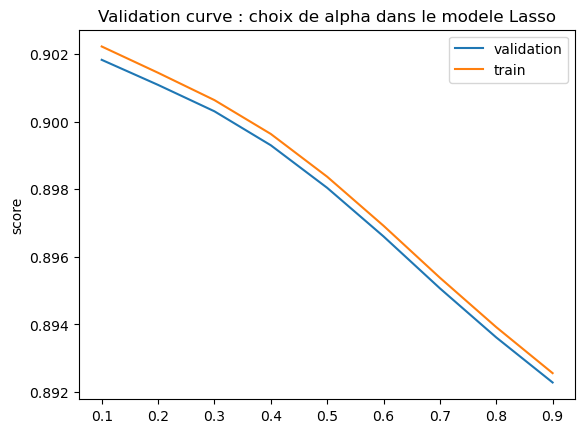

In [ ]:
alpha = np.arange(0.1, 1, 0.1)
train_score_lasso, val_score_lasso = validation_curve(Lasso(), x_train, y_train, param_name='alpha', param_range=alpha, cv=5)
#train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
score_lasso= val_score_lasso.mean(axis=1)

# si bon train_score et mauvais test_score -> overfitting

plt.plot(alpha, val_score_lasso.mean(axis=1), label='validation')
plt.plot(alpha, train_score_lasso.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de alpha dans le modele Lasso')
plt.legend()

In [ ]:
val_score_lasso.mean(axis=1) # pour chaque parametre a calcule le score sur les 5 différents validation set

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
score_lasso # alpha = 0.1 le best parameter

array([0.90183186, 0.90108968, 0.9003082 , 0.89930334, 0.89804334,
       0.89660527, 0.89506897, 0.89361554, 0.8922818 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV(model, param_grid, cv)
#construit grille de modele ac toutes les combinaisons d'hyperparametres de param_grid (bien qd plusieurs parametres a optimiser)
param_grid_lasso={'alpha': np.arange(0.1,1,0.1)}
grid_lasso=GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_lasso.fit(x_train, y_train)
print("best score : ", grid_lasso.best_score_)
print("best parameter : ", grid_lasso.best_params_)

best score :  0.9018318616154722
best parameter :  {'alpha': 0.1}


In [ ]:
model_lasso=grid_lasso.best_estimator_

In [ ]:
coefficients2 = pd.Series(model_lasso.coef_, index=x_train.columns)
variables_retenues2 = coefficients2[coefficients2 != 0]
print(variables_retenues2)

print(x_train.columns)

len(variables_retenues2)
print(model_lasso)

mean_cylindree         -0.508977
mean_co2_theorique     24.798626
mean_ptr                0.633494
mean_charge_utile       1.281826
mean_puis_kw            9.827813
mean_nb_decibels        0.390382
ES                      3.425781
GO                     -1.236079
FE                      0.374195
GH                     -1.340821
GN                     -0.102804
GL                      0.771791
EG                     -0.549467
FH                      0.275489
EN                     -0.055446
TS TERRAINS/CHEMINS     0.831748
BREAK                  -0.377160
MINIBUS                 0.177528
MONOSPACE COMPACT      -0.034875
COMBISPACE              0.899917
COUPE                   0.069183
MONOSPACE               0.002448
CABRIOLET              -0.224601
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
       'GN', 'GL', 'EG', 'FH', 'EN', 'BERLINE', 'TS TERRAINS/CHEMIN

### Learning curve (courbe d'apprentissage) pour lasso
Permet de voir influence de la taille de l'echantillon sur la performance du modele

In [ ]:
from sklearn.model_selection import learning_curve

[ 5088 10177 15265 20354 25443]


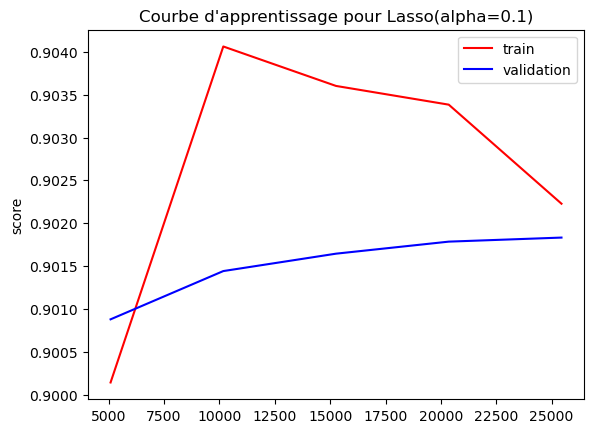

In [ ]:
N, train_score_lasso, val_score_lasso= learning_curve(Lasso(alpha=0.1), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)

plt.plot(N, train_score_lasso.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_lasso.mean(axis=1), c='blue', label='validation')
#plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## A faire : choix du parametre pour KNeighbors + validation curve pour KNeighbors

## validation curve

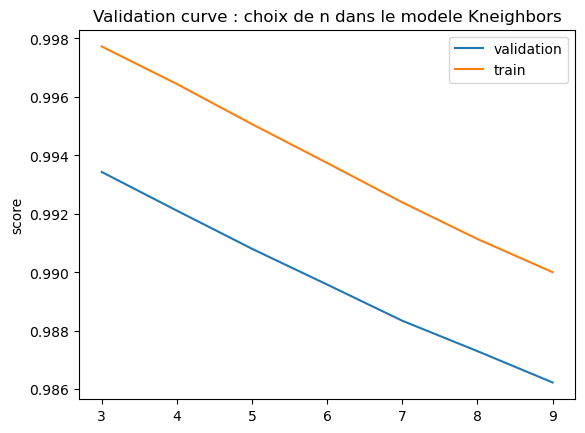

In [ ]:
n = np.arange(3, 10, 1)
train_score_kneighbors, val_score_kneighbors = validation_curve(KNeighborsRegressor(), x_train, y_train, param_name='n_neighbors', param_range=n, cv=5)
# train_score = capacite modele a s'adapter aux donnees
# val_score = evaluation sur le set de validation apres s'etre entraine sur le reste
# si bon train_score et mauvais test_score -> overfitting

plt.plot(n, val_score_kneighbors.mean(axis=1), label='validation')
plt.plot(n, train_score_kneighbors.mean(axis=1), label='train')

plt.ylabel('score')
#plt.xlabel('alpha')
plt.title('Validation curve : choix de n dans le modele Kneighbors')
plt.legend()

## learning curve

[ 5088 10177 15265 20354 25443]
[[0.97845707 0.97728284 0.97728284 0.97728284 0.97728284]
 [0.98878561 0.98846759 0.98891165 0.98891165 0.98891165]
 [0.99197833 0.99172674 0.9919707  0.99243506 0.99243506]
 [0.99359019 0.99351086 0.99380652 0.99375342 0.99401494]
 [0.99502432 0.99495463 0.99513869 0.99509192 0.99513267]]
[[0.96446761 0.96308477 0.95830122 0.95912565 0.96317909]
 [0.98083898 0.98051208 0.97658744 0.97678856 0.98210763]
 [0.98614954 0.98618526 0.98486557 0.98438258 0.98757299]
 [0.99045766 0.98894163 0.9878078  0.9880426  0.9901613 ]
 [0.99260267 0.99137371 0.9893292  0.9890527  0.99167336]]


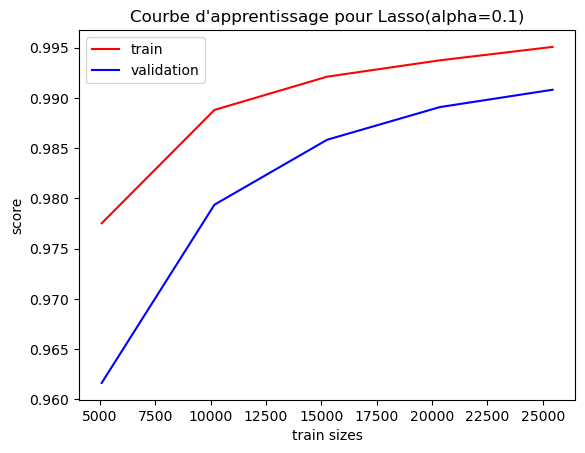

In [ ]:
N, train_score_kneighbors, val_score_kneighbors= learning_curve(KNeighborsRegressor(), x_train, y_train, train_sizes=np.linspace(0.2,1.0,5), cv =5)

print(N)
print(train_score_kneighbors)
print(val_score_kneighbors)

plt.plot(N, train_score_kneighbors.mean(axis=1), c='red', label='train')
plt.plot(N, val_score_kneighbors.mean(axis=1), c='blue', label='validation')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title('Courbe d\'apprentissage pour Lasso(alpha=0.1)')
plt.legend()

## Résumé:
- pour comparer le score (par exemple MSE) de deux modeles sans etre biaisé par le choix de notre test_set : cross validation
- pour choisir parametre qui optimise notre modele (par exemple alpha dans lasso) : validation curve
- pour comparer plusieurs combinaisons de parametres dans un modele : GridSearchCV
- pour savoir quelle importance a la taille de notre echantillon sur nos resultats (si on aurait besoin de plus de données par exemple ou si on voit qu'on a atteint un palier d'apprentissage): learning curve

In [ ]:
data.head()

Type energ marque_corr modele_corr  nb_pl_ass  puis_fisc  \
0  M10NSSVP000X313    ES      NISSAN       MICRA        5.0        5.0   
1  M10VWGVP000N375    GO  VOLKSWAGEN        GOLF        5.0        5.0   
2  M10SKDVP000S107    GO       SKODA       FABIA        5.0        5.0   
3     MJH1302TT635    ES       HONDA        JAZZ        5.0        6.0   
4  M10VWGVP000W578    GO  VOLKSWAGEN        POLO        5.0        4.0   

   min_year_circ  max_year_circ  mean_cylindree  mean_co2_theorique  ...  \
0           2010           2011          1240.0               159.0  ...   
1           2010           2014          1598.0               118.0  ...   
2           2010           2011          1422.0               120.0  ...   
3           2010           2010          1339.0               130.0  ...   
4           2010           2013          1598.0               109.0  ...   

   sd_cylindree  sd_co2_theorique  sd_co2_theorique_corr  sd_co2_reel  \
0           0.0               0.0                    0.0     0.198246   
1           0.0               0.0                    0.0     1.664602   
2           0.0               0.0                    0.0     0.288651   
3           0.0               0.0                    0.0     0.000000   
4           0.0               0.0                    0.0     0.116386   

   sd_nb_decibels  sd_ptr  sd_ptac  sd_charge_utile  sd_puis_kw      N  
0             0.0     0.0      0.0        12.146097         0.0    343  
1             0.0     0.0      0.0         3.398169         0.0   4981  
2             0.0     0.0      0.0         2.203026         0.0   1159  
3             0.0     0.0      0.0         0.000000         0.0     13  
4             0.0     0.0      0.0         1.299188         0.0  15200  

[5 rows x 27 columns]